# O problema

Você vai atuar como Expert em Data Analytics em uma empresa que exporta vinhos do Brasil para o mundo todo.<br>
Você será responsável pelos relatórios iniciais, explicando a quantidade de vinhos exportados e fatores externos que podem vir a surgir e que interferem nas análises:<br>
1- Dados climáticos. <br>
2- Dados demográficos.<br>
3- Dados econômicos.<br>
4- Dados de avaliações de vinhos.<br>
<br>
O Head de Dados pediu para que você construísse uma tabela contendo as seguintes informações:<br>
a.País de origem(Brasil).<br>
b.País de destino.<br>
c.Quantidade em litros de vinho exportado (utilize:1Kg=1L)<br>
d.Valor em US$<br>

Seu objetivo é dizer o montante de vendas de exportação nos últimos 15 anos, separando a análise por país e trazendo quais as prospecções futuras e possíveis ações para uma melhoria nas exportações

# Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import matplotlib.ticker as ticker
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
from numpy.polynomial import Polynomial
from collections import Counter

# Estudo

Este projeto visa apresentar o relatório inicial sobre as exportações de vinhos, com foco na vinicultura do Rio Grande do Sul, estado responsável por 90% da produção nacional. Os dados foram obtidos do site da Empresa Brasileira de Pesquisa Agropecuária (EMBRAPA), uma instituição pública vinculada ao Ministério da Agricultura e Pecuária. Você pode acessar os dados no seguinte link:

[EMBRAPA - Dados da Vitivinicultura](http://vitibrasil.cnpuv.embrapa.br/index.php?opcao=opt_01)

O site disponibiliza dados detalhados sobre exportações de vinho, incluindo informações sobre o país de destino, a quantidade de vinho exportado para cada país (expressa em quilogramas, considerando-se que 1 litro de vinho equivale a 1 quilo), e o valor total pago pelo vinho exportado (em dólares americanos)

Ao importar os dados sobre Vinhos de mesa, percebemos que o conjunto de dados abrange o período de 1970 a 2022. No entanto, para este estudo, foi solicitada uma análise dos últimos 15 anos. Portanto, foram removidas quaisquer informações referentes a anos que não estejam no intervalo de 2008 a 2022. Essa filtragem nos permite concentrar nossa análise nos dados mais relevantes para o período recente.

In [2]:
exportacao_vinhos = pd.read_csv('ExpVinho.csv',sep=';')
exportacao_vinhos

Id                             País  1970  1970.1  1971  1971.1  1972  \
0      1                      Afeganistão     0       0     0       0     0   
1      2                    África do Sul     0       0     0       0     0   
2      3  Alemanha, República Democrática     0       0     0       0  4168   
3      4                           Angola     0       0     0       0     0   
4      5                         Anguilla     0       0     0       0     0   
..   ...                              ...   ...     ...   ...     ...   ...   
123  124                           Tuvalu     0       0     0       0     0   
124  125                          Uruguai     0       0     0       0     0   
125  126                          Vanuatu     0       0     0       0     0   
126  127                        Venezuela     0       0  3200    2000  1350   
127  128                           Vietnã     0       0     0       0     0   

     1972.1   1973  1973.1  ...   2018  2018.1  2019  2019.1  2020  2020.1  \
0         0      0       0  ...      0       0     0       0     0       0   
1         0      0       0  ...      0       0    26      95     4      21   
2      2630  12000    8250  ...  10794   45382  3660   25467  6261   32605   
3         0      0       0  ...    477     709   345    1065     0       0   
4         0      0       0  ...      0       0     0       0     0       0   
..      ...    ...     ...  ...    ...     ...   ...     ...   ...     ...   
123       0      0       0  ...      0       0     0       0     2       4   
124       0      0       0  ...   7711   29617  6180   18497     0       0   
125       0      0       0  ...      0       0     0       0    18      31   
126     750  11700    6458  ...     71     355     0       0  4086    9808   
127       0      0       0  ...      0       0    20      32    86     584   

       2021  2021.1    2022  2022.1  
0        11      46       0       0  
1         0       0       0       0  
2      2698    6741    7630   45367  
3         0       0    4068    4761  
4         0       0       0       0  
..      ...     ...     ...     ...  
123       0       0       0       0  
124  136774  149842  637117  997367  
125       0       0       0       0  
126   26415   35944   23220   32351  
127       0       0     130     277  

[128 rows x 108 columns]

In [3]:
exportacao_vinhos.isna().sum().sum()

0

O dataset não apresenta dados faltantes. Dado que a origem exata dos dados não é conhecida, para este estudo todos os 0's serão tratados como dados oficiais de que não houve exportação de vinhos para o País em questão.

In [4]:
colunas_2008_em_diante = exportacao_vinhos.columns[exportacao_vinhos.columns >= '2008']
exportacao_vinhos = exportacao_vinhos.loc[:,colunas_2008_em_diante]
exportacao_vinhos.head()

Id                             País    2008  2008.1    2009  2009.1   2010  \
0   1                      Afeganistão       0       0       0       0      0   
1   2                    África do Sul       0       0       0       0      0   
2   3  Alemanha, República Democrática  265742  429970  225086  393482  27715   
3   4                           Angola   25721   71083   54786   84235  33557   
4   5                         Anguilla       0       0       0       0      0   

   2010.1   2011  2011.1  ...   2018  2018.1  2019  2019.1  2020  2020.1  \
0       0      0       0  ...      0       0     0       0     0       0   
1       0      0       0  ...      0       0    26      95     4      21   
2  138666  36070  144150  ...  10794   45382  3660   25467  6261   32605   
3  189891  13889   69001  ...    477     709   345    1065     0       0   
4       0      0       0  ...      0       0     0       0     0       0   

   2021  2021.1  2022  2022.1  
0    11      46     0       0  
1     0       0     0       0  
2  2698    6741  7630   45367  
3     0       0  4068    4761  
4     0       0     0       0  

[5 rows x 32 columns]

In [5]:
for col in exportacao_vinhos.columns:
    if col.endswith('.1'):
        novo_nome = col.replace('.1', '')
        exportacao_vinhos.rename(columns={col: f'Valor_{novo_nome}'},inplace=True)

for col in exportacao_vinhos.columns[1:]:
    if col.isdigit():
        novo_nome = f'Exportacao_{col}'
        exportacao_vinhos.rename(columns={col: novo_nome}, inplace=True)

exportacao_vinhos.drop(columns=['Id'],inplace=True)

exportacao_vinhos.head()

País  Exportacao_2008  Valor_2008  \
0                      Afeganistão                0           0   
1                    África do Sul                0           0   
2  Alemanha, República Democrática           265742      429970   
3                           Angola            25721       71083   
4                         Anguilla                0           0   

   Exportacao_2009  Valor_2009  Exportacao_2010  Valor_2010  Exportacao_2011  \
0                0           0                0           0                0   
1                0           0                0           0                0   
2           225086      393482            27715      138666            36070   
3            54786       84235            33557      189891            13889   
4                0           0                0           0                0   

   Valor_2011  Exportacao_2012  ...  Exportacao_2018  Valor_2018  \
0           0                0  ...                0           0   
1           0                0  ...                0           0   
2      144150             8189  ...            10794       45382   
3       69001             2833  ...              477         709   
4           0                0  ...                0           0   

   Exportacao_2019  Valor_2019  Exportacao_2020  Valor_2020  Exportacao_2021  \
0                0           0                0           0               11   
1               26          95                4          21                0   
2             3660       25467             6261       32605             2698   
3              345        1065                0           0                0   
4                0           0                0           0                0   

   Valor_2021  Exportacao_2022  Valor_2022  
0          46                0           0  
1           0                0           0  
2        6741             7630       45367  
3           0             4068        4761  
4           0                0           0  

[5 rows x 31 columns]

In [6]:
colunas_exportacao = [coluna for coluna in exportacao_vinhos.columns if 'Exportacao' in coluna]
soma_exportacao = exportacao_vinhos[colunas_exportacao].sum()
total_mesa = soma_exportacao.sum()
total_mesa

87982432

In [7]:
exportacao_espumante = pd.read_csv('ExpEspumantes.csv',sep=';')
exportacao_espumante.head()

Id                 País  1970  1970.1  1971  1971.1  1972  1972.1  1973  \
0   1             Alemanha     0       0     0       0     0       0     0   
1   2               Angola     0       0     0       0     0       0     0   
2   3    Antigua e Barbuda     0       0     0       0     0       0     0   
3   4  Antilhas Holandesas     0       0     0       0     0       0     0   
4   5            Argentina     0       0     0       0     0       0     0   

   1973.1  ...  2018  2018.1  2019  2019.1  2020  2020.1  2021  2021.1   2022  \
0       0  ...  4092   21373  1003    5466  2388   14767   142     265   1164   
1       0  ...    63     280  1007    3615    24      38     0       0  26383   
2       0  ...     0       0     7      34    32     328    10      82     65   
3       0  ...     0       0     0       0     0       0     0       0      0   
4       0  ...  4342   17243     0       0   315     894     0       0      0   

   2022.1  
0    6560  
1  141588  
2     146  
3       0  
4       0  

[5 rows x 108 columns]

In [8]:
colunas_2008_em_diante = exportacao_espumante.columns[exportacao_espumante.columns >= '2008']
exportacao_espumante = exportacao_espumante.loc[:,colunas_2008_em_diante]
exportacao_espumante.head()

Id                 País  2008  2008.1   2009  2009.1    2010  2010.1  2011  \
0   1             Alemanha  5423   20928   6648   29018    1958    6877  1976   
1   2               Angola  2244   10581  11393   33664  104138  672533   904   
2   3    Antigua e Barbuda     0       0      0       0       0       0     0   
3   4  Antilhas Holandesas     0       0    180    1660       0       0  9144   
4   5            Argentina     0       0      0       0       0       0     0   

   2011.1  ...  2018  2018.1  2019  2019.1  2020  2020.1  2021  2021.1   2022  \
0   12018  ...  4092   21373  1003    5466  2388   14767   142     265   1164   
1   14196  ...    63     280  1007    3615    24      38     0       0  26383   
2       0  ...     0       0     7      34    32     328    10      82     65   
3   65766  ...     0       0     0       0     0       0     0       0      0   
4       0  ...  4342   17243     0       0   315     894     0       0      0   

   2022.1  
0    6560  
1  141588  
2     146  
3       0  
4       0  

[5 rows x 32 columns]

In [9]:
colunas_2008_em_diante = exportacao_espumante.columns[exportacao_espumante.columns >= '2008']
exportacao_espumante = exportacao_espumante.loc[:,colunas_2008_em_diante]

for col in exportacao_espumante.columns:
    if col.endswith('.1'):
        novo_nome = col.replace('.1', '')
        exportacao_espumante.rename(columns={col: f'Valor_{novo_nome}'},inplace=True)

for col in exportacao_espumante.columns[1:]:
    if col.isdigit():
        novo_nome = f'Exportacao_{col}'
        exportacao_espumante.rename(columns={col: novo_nome}, inplace=True)

exportacao_espumante.drop(columns=['Id'],inplace=True)

exportacao_espumante.head()

País  Exportacao_2008  Valor_2008  Exportacao_2009  \
0             Alemanha             5423       20928             6648   
1               Angola             2244       10581            11393   
2    Antigua e Barbuda                0           0                0   
3  Antilhas Holandesas                0           0              180   
4            Argentina                0           0                0   

   Valor_2009  Exportacao_2010  Valor_2010  Exportacao_2011  Valor_2011  \
0       29018             1958        6877             1976       12018   
1       33664           104138      672533              904       14196   
2           0                0           0                0           0   
3        1660                0           0             9144       65766   
4           0                0           0                0           0   

   Exportacao_2012  ...  Exportacao_2018  Valor_2018  Exportacao_2019  \
0              833  ...             4092       21373             1003   
1               73  ...               63         280             1007   
2                0  ...                0           0                7   
3                0  ...                0           0                0   
4                0  ...             4342       17243                0   

   Valor_2019  Exportacao_2020  Valor_2020  Exportacao_2021  Valor_2021  \
0        5466             2388       14767              142         265   
1        3615               24          38                0           0   
2          34               32         328               10          82   
3           0                0           0                0           0   
4           0              315         894                0           0   

   Exportacao_2022  Valor_2022  
0             1164        6560  
1            26383      141588  
2               65         146  
3                0           0  
4                0           0  

[5 rows x 31 columns]

In [10]:
colunas_exportacao = [coluna for coluna in exportacao_espumante.columns if 'Exportacao' in coluna]
soma_exportacao = exportacao_espumante[colunas_exportacao].sum()
total_espumante = soma_exportacao.sum()
total_espumante

6030396

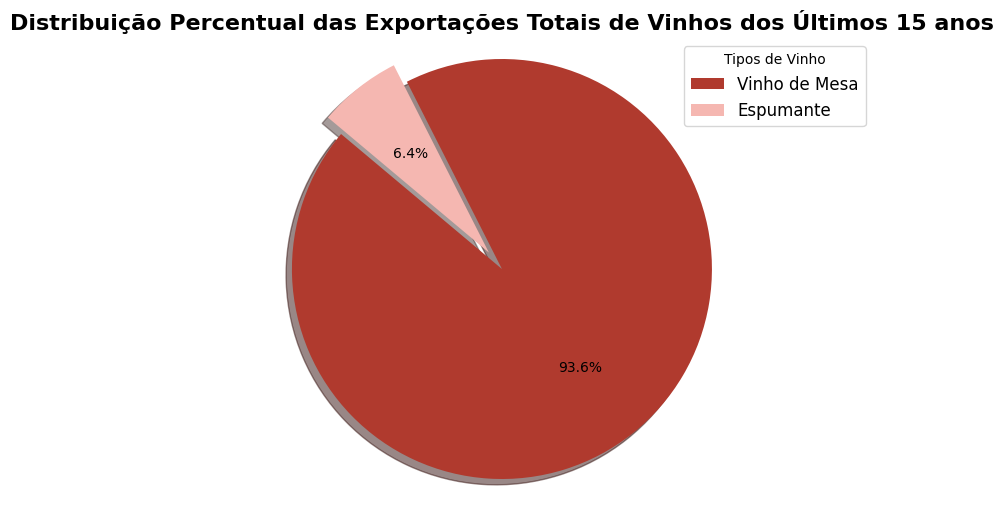

In [11]:
# Calculando as porcentagens
porcentagem_mesa = total_mesa / (total_mesa + total_espumante) * 100
porcentagem_espumante = total_espumante / (total_mesa + total_espumante) * 100

# Labels
labels = ['Vinho de Mesa', 'Espumante']

# Dados
sizes = [porcentagem_mesa, porcentagem_espumante]

# Cores
colors = ['#B03A2E', '#F5B7B1']  # Vinho claro para "Vinho de Mesa" e rosa suave para "Espumante"

# Plot
plt.figure(figsize=(8, 6))
plt.pie(sizes, colors=colors, autopct=lambda p: '{:.1f}%'.format(p), startangle=140, shadow=True, explode=(0.1, 0))

# Ajustes estéticos
plt.title('Distribuição Percentual das Exportações Totais de Vinhos dos Últimos 15 anos', fontsize=16, fontweight='bold')
plt.axis('equal')  # Assegura que o gráfico seja desenhado como um círculo
plt.legend(labels, loc='upper right', fontsize=12, bbox_to_anchor=(1.1, 1), title="Tipos de Vinho")
plt.gca().set_aspect('equal')  # Força uma relação de aspecto igual para que o gráfico de pizza seja circular

# Mostrar o gráfico
plt.show()

Dado que a EMBRAPA trata de forma distinta os dados relacionados à exportação de vinhos de mesa e vinhos espumantes, este estudo concentra-se exclusivamente nos vinhos de mesa. Isso se deve ao fato de que a exportação de vinhos de mesa representa cerca de 94% do total de vinhos exportados. Essa abordagem mantém o foco no principal produto de exportação da vinicultura do Rio Grande do Sul. No entanto, é importante observar que essa escolha não apenas exclui a análise do potencial dos vinhos espumantes, mas também impede a avaliação da exportação conjunta dos dois tipos de vinho.

In [12]:
87982432/6030396

14.589826605085305

---------------------------------------------------------------------------------------

In [13]:
colunas_exportacao = [coluna for coluna in exportacao_vinhos.columns 
                      if 'Exportacao_' in coluna]
soma_exportacoes = exportacao_vinhos[colunas_exportacao].sum(axis=1)

colunas_valor = [coluna for coluna in exportacao_vinhos.columns 
                      if 'Valor_' in coluna]
soma_valor = exportacao_vinhos[colunas_valor].sum(axis=1)

exportacao_vinhos_resumido = pd.DataFrame({'Pais_destino':exportacao_vinhos['País'],
                      'Quantidade':soma_exportacoes,
                      'Valor':soma_valor})
exportacao_vinhos_resumido.head()

Pais_destino  Quantidade    Valor
0                      Afeganistão          11       46
1                    África do Sul          30      116
2  Alemanha, República Democrática      909051  2546394
3                           Angola      168868   576189
4                         Anguilla           0        0

In [14]:
exportacao_vinhos_resumido['Pais_destino']


0                          Afeganistão
1                        África do Sul
2      Alemanha, República Democrática
3                               Angola
4                             Anguilla
                    ...               
123                             Tuvalu
124                            Uruguai
125                            Vanuatu
126                          Venezuela
127                             Vietnã
Name: Pais_destino, Length: 128, dtype: object

Pela quantidade de países presentes no Dataset, é interessante que sejam estudados em grupos. Uma boa forma dessa divisão, é atrelar países aos seus respectivos continentes.

In [15]:
# Dicionário de países e seus continentes correspondentes
paises_continente = {
    'Afeganistão': 'Ásia',
    'África do Sul': 'África',
    'Alemanha, República Democrática': 'Europa',
    'Angola': 'África',
    'Anguilla': 'América do Norte',
    'Antígua e Barbuda': 'América do Norte',
    'Antilhas Holandesas': 'América do Norte',
    'Argentina': 'América do Sul',
    'Aruba': 'América do Norte',
    'Austrália': 'Oceania',
    'Áustria': 'Europa',
    'Bahamas': 'América do Norte',
    'Bangladesh': 'Ásia',
    'Barbados': 'América do Norte',
    'Barein': 'Ásia',
    'Bélgica': 'Europa',
    'Belice': 'América Central',
    'Benin': 'África',
    'Bolívia': 'América do Sul',
    'Bósnia-Herzegovina': 'Europa',
    'Brasil': 'América do Sul',
    'Bulgária': 'Europa',
    'Cabo Verde': 'África',
    'Camarões': 'África',
    'Canadá': 'América do Norte',
    'Catar': 'Ásia',
    'Cayman, Ilhas': 'América do Norte',
    'Chile': 'América do Sul',
    'China': 'Ásia',
    'Chipre': 'Europa',
    'Cingapura': 'Ásia',
    'Cocos (Keeling), Ilhas': 'Oceania',
    'Colômbia': 'América do Sul',
    'Comores': 'África',
    'Congo': 'África',
    'Coreia, Republica Sul': 'Ásia',
    'Costa do Marfim': 'África',
    'Costa Rica': 'América Central',
    'Croácia': 'Europa',
    'Cuba': 'América do Norte',
    'Curaçao': 'América do Norte',
    'Dinamarca': 'Europa',
    'Dominica': 'América do Norte',
    'El Salvador': 'América Central',
    'Emirados Arabes Unidos': 'Ásia',
    'Equador': 'América do Sul',
    'Eslovaca, Republica': 'Europa',
    'Espanha': 'Europa',
    'Estados Unidos': 'América do Norte',
    'Estônia': 'Europa',
    'Filipinas': 'Ásia',
    'Finlândia': 'Europa',
    'França': 'Europa',
    'Gana': 'África',
    'Gibraltar': 'Europa',
    'Granada': 'América do Norte',
    'Grécia': 'Europa',
    'Guatemala': 'América Central',
    'Guiana': 'América do Sul',
    'Guiana Francesa': 'América do Sul',
    'Guine Bissau': 'África',
    'Guine Equatorial': 'África',
    'Haiti': 'América do Norte',
    'Honduras': 'América Central',
    'Hong Kong': 'Ásia',
    'Hungria': 'Europa',
    'Ilha de Man': 'Europa',
    'Ilhas Virgens': 'América do Norte',
    'India': 'Ásia',
    'Indonésia': 'Ásia',
    'Irã': 'Ásia',
    'Iraque': 'Ásia',
    'Irlanda': 'Europa',
    'Itália': 'Europa',
    'Jamaica': 'América do Norte',
    'Japão': 'Ásia',
    'Jordânia': 'Ásia',
    'Letônia': 'Europa',
    'Líbano': 'Ásia',
    'Libéria': 'África',
    'Luxemburgo': 'Europa',
    'Malásia': 'Ásia',
    'Malta': 'Europa',
    'Marshall, Ilhas': 'Oceania',
    'Mauritânia': 'África',
    'México': 'América do Norte',
    'Moçambique': 'África',
    'Montenegro': 'Europa',
    'Namibia': 'África',
    'Nicaragua': 'América Central',
    'Nigéria': 'África',
    'Noruega': 'Europa',
    'Nova Caledônia': 'Oceania',
    'Nova Zelândia': 'Oceania',
    'Omã': 'Ásia',
    'Países Baixos': 'Europa',
    'Panamá': 'América Central',
    'Paraguai': 'América do Sul',
    'Peru': 'América do Sul',
    'Polônia': 'Europa',
    'Porto Rico': 'América do Norte',
    'Portugal': 'Europa',
    'Quênia': 'África',
    'Reino Unido': 'Europa',
    'República Dominicana': 'América do Norte',
    'Rússia': 'Europa',
    'São Tomé e Príncipe': 'África',
    'São Vicente e Granadinas': 'América do Norte',
    'Senegal': 'África',
    'Serra Leoa': 'África',
    'Singapura': 'Ásia',
    'Suazilândia': 'África',
    'Suécia': 'Europa',
    'Suíça': 'Europa',
    'Suriname': 'América do Sul',
    'Tailândia': 'Ásia',
    'Taiwan (FORMOSA)': 'Ásia',
    'Tanzânia': 'África',
    'Tcheca, República': 'Europa',
    'Togo': 'África',
    'Trinidade Tobago': 'América do Norte',
    'Tunísia': 'África',
    'Turquia': 'Ásia',
    'Tuvalu': 'Oceania',
    'Uruguai': 'América do Sul',
    'Vanuatu': 'Oceania',
    'Venezuela': 'América do Sul',
    'Vietnã': 'Ásia'
}

# Função para obter o continente de um país
def get_continent(country):
    return paises_continente.get(country, 'Desconhecido')

# Aplicar a função para criar a coluna de continentes
exportacao_vinhos_resumido['Continente'] = exportacao_vinhos_resumido['Pais_destino'].apply(get_continent)

exportacao_vinhos_resumido.head()


Pais_destino  Quantidade    Valor        Continente
0                      Afeganistão          11       46              Ásia
1                    África do Sul          30      116            África
2  Alemanha, República Democrática      909051  2546394            Europa
3                           Angola      168868   576189            África
4                         Anguilla           0        0  América do Norte

A atribuição da Rússia à Europa pode ser explicada por diferentes fatores, que incluem principalmente critérios geográficos, históricos e culturais:

Localização Geográfica: Uma parte significativa do território russo está localizada no continente europeu, principalmente na porção ocidental do país. Moscou, a capital russa, está localizada na parte europeia do país. Além disso, o rio Ural, muitas vezes considerado a fronteira natural entre Europa e Ásia, passa pela Rússia.

Herança Histórica e Cultural: Ao longo da história, a Rússia teve uma forte influência cultural e política da Europa, especialmente da Europa Oriental. A Rússia foi o centro do Império Russo e depois da União Soviética, que teve interações significativas com outros países europeus.

Identidade Nacional: A Rússia compartilha algumas características culturais e históricas com os países europeus. Muitos aspectos da cultura russa, como arte, literatura, arquitetura e religião, têm raízes europeias.

Afetos Políticos e Econômicos: A Rússia mantém relações políticas e econômicas estreitas com muitos países europeus. Isso inclui acordos comerciais, parcerias estratégicas e colaborações em questões políticas e de segurança.

Por esses motivos, a decisão de incluir a Rússia no continente europeu é comum em muitos contextos, embora haja variações dependendo dos critérios adotados e das perspectivas individuais.

In [16]:
paises_sem_exportacao = exportacao_vinhos_resumido[(exportacao_vinhos_resumido['Quantidade'] == 0) | (exportacao_vinhos_resumido['Pais_destino'] == 'Brasil')]
paises_sem_exportacao.drop(columns=['Quantidade', 'Valor'], inplace=True)
paises_sem_exportacao


C:\Users\Guilherme\AppData\Local\Temp\ipykernel_7228\89601339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paises_sem_exportacao.drop(columns=['Quantidade', 'Valor'], inplace=True)


Pais_destino        Continente
4                Anguilla  América do Norte
20                 Brasil    América do Sul
36        Costa do Marfim            África
67          Ilhas Virgens  América do Norte
71                 Iraque              Ásia
74                Jamaica  América do Norte
78                 Líbano              Ásia
100            Porto Rico  América do Norte
104  República Dominicana  América do Norte
108               Senegal            África
117              Tanzânia            África
121               Tunísia            África

In [17]:
12/128

0.09375

porcentagem que foi retirada<br>


Os países que registraram valor zero na quantidade exportada serão isolados para evitar ruídos e possíveis distorções nos resultados e na interpretação dos dados. Essa abordagem nos permite direcionar nossa análise para os países que de fato estão importando vinho brasileiro, destacando os mercados mais relevantes. É importante observar que a maioria dos países com ausência de importações nos últimos 15 anos está concentrada principalmente na África, Ásia e em nações do Caribe. Essa medida visa aprimorar a qualidade da análise, concentrando-se nos dados mais representativos e relevantes para o contexto da exportação de vinhos brasileiros.

Como os valores que devem ser analisados são referentes a exportação, o Brasil também será isolado da análise

In [18]:
exportacao_vinhos_resumido = exportacao_vinhos_resumido[(exportacao_vinhos_resumido['Pais_destino'] != 'Brasil') & (exportacao_vinhos_resumido['Quantidade'] != 0)]
exportacao_vinhos_resumido.head()

Pais_destino  Quantidade    Valor        Continente
0                      Afeganistão          11       46              Ásia
1                    África do Sul          30      116            África
2  Alemanha, República Democrática      909051  2546394            Europa
3                           Angola      168868   576189            África
5                Antígua e Barbuda        2104     7738  América do Norte

In [19]:
# Lista de países a serem removidos
paises_remover = paises_sem_exportacao['Pais_destino']

# Remover os países do DataFrame exportacao_vinhos
exportacao_vinhos = exportacao_vinhos[~exportacao_vinhos['País'].isin(paises_remover)]

exportacao_vinhos.head()

País  Exportacao_2008  Valor_2008  \
0                      Afeganistão                0           0   
1                    África do Sul                0           0   
2  Alemanha, República Democrática           265742      429970   
3                           Angola            25721       71083   
5                Antígua e Barbuda                0           0   

   Exportacao_2009  Valor_2009  Exportacao_2010  Valor_2010  Exportacao_2011  \
0                0           0                0           0                0   
1                0           0                0           0                0   
2           225086      393482            27715      138666            36070   
3            54786       84235            33557      189891            13889   
5                0           0                0           0                0   

   Valor_2011  Exportacao_2012  ...  Exportacao_2018  Valor_2018  \
0           0                0  ...                0           0   
1           0                0  ...                0           0   
2      144150             8189  ...            10794       45382   
3       69001             2833  ...              477         709   
5           0                0  ...               37         191   

   Exportacao_2019  Valor_2019  Exportacao_2020  Valor_2020  Exportacao_2021  \
0                0           0                0           0               11   
1               26          95                4          21                0   
2             3660       25467             6261       32605             2698   
3              345        1065                0           0                0   
5              219        1549              624        1864              805   

   Valor_2021  Exportacao_2022  Valor_2022  
0          46                0           0  
1           0                0           0  
2        6741             7630       45367  
3           0             4068        4761  
5        2268              419        1866  

[5 rows x 31 columns]

In [20]:
sem_exportacao = exportacao_vinhos[exportacao_vinhos['País'].isin(paises_remover)]

In [21]:
exportacao_vinhos['Continente'] = exportacao_vinhos['País'].apply(get_continent)
exportacao_vinhos.head()

País  Exportacao_2008  Valor_2008  \
0                      Afeganistão                0           0   
1                    África do Sul                0           0   
2  Alemanha, República Democrática           265742      429970   
3                           Angola            25721       71083   
5                Antígua e Barbuda                0           0   

   Exportacao_2009  Valor_2009  Exportacao_2010  Valor_2010  Exportacao_2011  \
0                0           0                0           0                0   
1                0           0                0           0                0   
2           225086      393482            27715      138666            36070   
3            54786       84235            33557      189891            13889   
5                0           0                0           0                0   

   Valor_2011  Exportacao_2012  ...  Valor_2018  Exportacao_2019  Valor_2019  \
0           0                0  ...           0                0           0   
1           0                0  ...           0               26          95   
2      144150             8189  ...       45382             3660       25467   
3       69001             2833  ...         709              345        1065   
5           0                0  ...         191              219        1549   

   Exportacao_2020  Valor_2020  Exportacao_2021  Valor_2021  Exportacao_2022  \
0                0           0               11          46                0   
1                4          21                0           0                0   
2             6261       32605             2698        6741             7630   
3                0           0                0           0             4068   
5              624        1864              805        2268              419   

   Valor_2022        Continente  
0           0              Ásia  
1           0            África  
2       45367            Europa  
3        4761            África  
5        1866  América do Norte  

[5 rows x 32 columns]

In [22]:
exportacao_vinhos_resumido.head()

Pais_destino  Quantidade    Valor        Continente
0                      Afeganistão          11       46              Ásia
1                    África do Sul          30      116            África
2  Alemanha, República Democrática      909051  2546394            Europa
3                           Angola      168868   576189            África
5                Antígua e Barbuda        2104     7738  América do Norte

Por estarmos lidando com Países, uma boa métrica para ser explorada é a relação da exportação com os continentes 

In [23]:
# Agrupar os dados por continente e somar as quantidades
quantidade_por_continente = exportacao_vinhos_resumido.groupby('Continente')['Quantidade'].sum()

# Definir cores para as barras
cores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
ax = quantidade_por_continente.plot(kind='bar', color=cores, edgecolor='k', zorder=3)

# Formatando o eixo y
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Definindo os limites do eixo y e o intervalo do marcador
plt.gca().set_ylim([0, 50000000])
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(5000000))

# Adicionando título e rótulos aos eixos
plt.title('Quantidade em Litros de Vinho Exportados nos últimos 15 anos por continente', fontsize=14)
plt.xlabel('Continente', fontsize=12)
plt.ylabel('Litros de Vinho', fontsize=12)

# Adicionando grade ao eixo y
plt.grid(axis='y', linestyle='--', linewidth=0.5, zorder=0)

# Alterando a cor das bordas dos eixos
for spine in ax.spines.values():
    spine.set_edgecolor('gray')

# Exibindo o gráfico
plt.show()


0: 'África', #8c564b <br>
    1: 'América do Norte',#ff7f0e <br>
    2: 'América do Sul',#2ca02c <br>
    3: 'Ásia', #e377c2 <br>
    4: 'Europa',#d62728 <br>
    5: 'Oceania',#9467bd <br>
    6: 'América Central'#1f77b4 <br>


Os dados mostram que ao longos dos últimos 15 anos, o Continente que mais importou vinho de mesa do Brasil foi a Europa, seguido da América do Sul

Contudo, é interessante adicionar uma terceira variável, a do valor para enchergar o comportamento dos continentes, levando em conta os preços dos vinhos

In [24]:
exportacao_vinhos_resumido

Pais_destino  Quantidade    Valor        Continente
0                        Afeganistão          11       46              Ásia
1                      África do Sul          30      116            África
2    Alemanha, República Democrática      909051  2546394            Europa
3                             Angola      168868   576189            África
5                  Antígua e Barbuda        2104     7738  América do Norte
..                               ...         ...      ...               ...
123                           Tuvalu           2        4           Oceania
124                          Uruguai      792595  1219878    América do Sul
125                          Vanuatu          18       31           Oceania
126                        Venezuela       55515    88828    América do Sul
127                           Vietnã        9799    13013              Ásia

[116 rows x 4 columns]

In [25]:
Quantidade_continente = exportacao_vinhos_resumido.groupby('Continente')['Quantidade'].sum()
Valor_continente = exportacao_vinhos_resumido.groupby('Continente')['Valor'].sum()
Valor_continente
# Criando a curva de Regressão Linear
Quantidade_continente.sort_values(ascending=True,inplace=True)
Valor_continente.sort_values(ascending=True,inplace=True)

x = Valor_continente.tolist()
y = Quantidade_continente.tolist()

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef)
coef

array([ 9.08173571e-01, -2.04568391e+06])

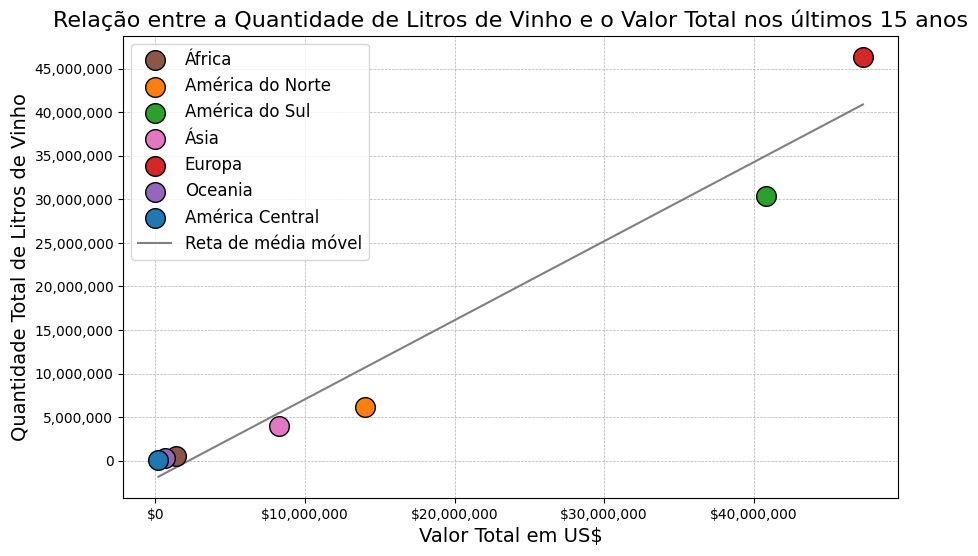

In [26]:
# Dicionário de mapeamento de código de continente para nome do continente
continentes = {
    0: 'África',
    1: 'América do Norte',
    2: 'América do Sul',
    3: 'Ásia',
    4: 'Europa',
    5: 'Oceania',
    6: 'América Central'
}

# Lista de cores para cada continente
cores = ['#8c564b', '#ff7f0e', '#2ca02c', '#e377c2', '#d62728', '#9467bd', '#1f77b4']

# Calculando o total da quantidade e valor para cada continente
total_quantidade = []
total_valor = []

for cont in continentes.values():
    total_quantidade.append(exportacao_vinhos_resumido[exportacao_vinhos_resumido['Continente'] == cont]['Quantidade'].sum())
    total_valor.append(exportacao_vinhos_resumido[exportacao_vinhos_resumido['Continente'] == cont]['Valor'].sum())

# Criando o gráfico de dispersão
plt.figure(figsize=(10, 6))
for i, cont in enumerate(continentes.values()):
    plt.scatter(total_valor[i], total_quantidade[i], c=cores[i], s=200, edgecolor='black', label=cont, zorder=3)

# Adicionando título e rótulos
plt.title('Relação entre a Quantidade de Litros de Vinho e o Valor Total nos últimos 15 anos', fontsize=16)
plt.xlabel('Valor Total em US$', fontsize=14)
plt.ylabel('Quantidade Total de Litros de Vinho', fontsize=14)

# Curva da Regressão linear
plt.plot(x, poly1d_fn(x), label='Reta de média móvel', color='gray')

# Adicionando legenda para o continente
plt.legend(fontsize=12, loc='upper left')

# Formatando os eixos
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.gca().get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: '${:,.0f}'.format(x)))  # Adicionando '$' no rótulo do eixo x
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(5000000))

# Exibindo o gráfico
plt.grid(True, linestyle='--', linewidth=0.5, zorder=0)
plt.show()


o valor pago por 1 litro de vinho é aproximadamente 1.10 dólares.

o porque da regressão e qual o valor da angulação



A reta funciona como uma aproximação do valor pago pelo litro de vinho, levando em conta os valores dos países. Com isso, percebe-se que os continentes Europeu, África e Oceania pagaram menos pelo Litro de vinho, quando comparados com os valores da América do Sul, América do Norte e Ásia. Isso mostra que existem outras variáveis atuando como fatores externos e interferindo na análise, podendo ser, entre elas, a qualidade do vinho Exportado para esses continentes e também a flutuação do dólar decorrente do período em que foram adquiridos

Com isso, é interessante uma análise acompanhando a passagem de tempo ao longo dos 15 anos de exportação

In [27]:
exportacao_vinhos_continente = exportacao_vinhos.drop(columns=['País'])
exportacao_vinhos_continente = exportacao_vinhos_continente.groupby('Continente').sum()
exportacao_vinhos_continente.reset_index(inplace=True)
exportacao_vinhos_continente.head()

Continente  Exportacao_2008  Valor_2008  Exportacao_2009  Valor_2009  \
0   América Central             1378        2662              137         204   
1  América do Norte           482802      908011           400718      750025   
2    América do Sul          2196780     1379703           532857      434554   
3            Europa          7118158     4325676         22698207     6857079   
4           Oceania           218726       99280             1014        9195   

   Exportacao_2010  Valor_2010  Exportacao_2011  Valor_2011  Exportacao_2012  \
0                0           0                0           0               39   
1           244653      507947           352687     1211107           172041   
2           514576      457331           271208      360095           377802   
3           349203     1276120           404276     1414622          5082908   
4             1823       17960             6219       48696            11709   

   ...  Exportacao_2018  Valor_2018  Exportacao_2019  Valor_2019  \
0  ...             1183        3117             9524       37765   
1  ...           285568      737390           328247      820254   
2  ...          3302413     5729344          2440001     3870448   
3  ...           139452      621262           137935      566402   
4  ...             3947       14903             8937       23300   

   Exportacao_2020  Valor_2020  Exportacao_2021  Valor_2021  Exportacao_2022  \
0            10821       28372            46867       77544            12773   
1           751066     1162663           817584     1108604           824883   
2          3338640     3934723          6716840     7433530          5783774   
3            75535      331082           237838      570582           120535   
4             7398       23602            17233       48996             8753   

   Valor_2022  
0       54742  
1     1281636  
2     8269719  
3      480137  
4       39693  

[5 rows x 31 columns]

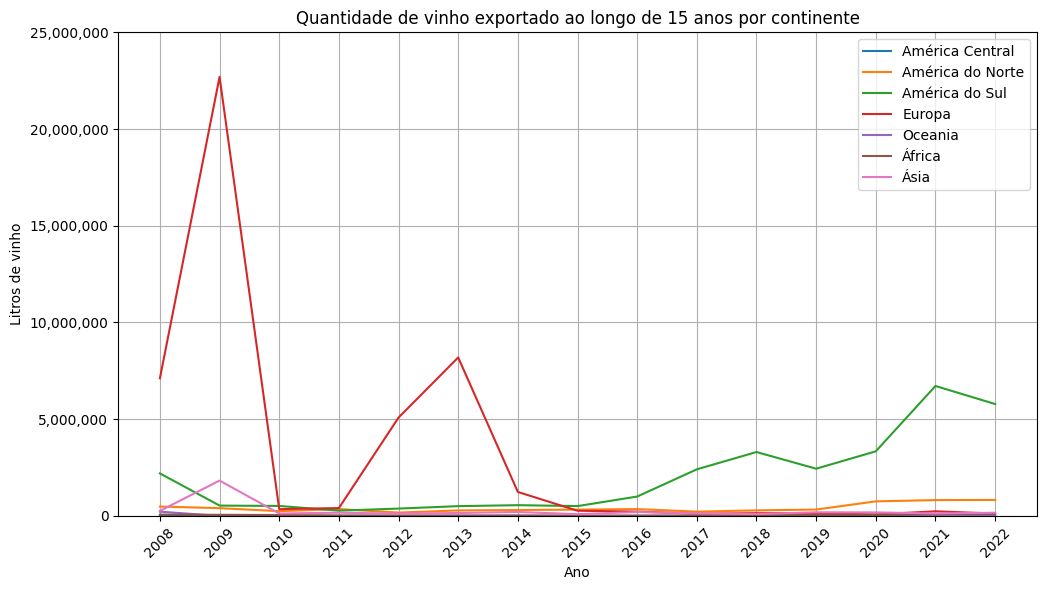

In [28]:
# Dicionário de cores para cada continente
continentes_cores = {
    'África': '#8c564b',
    'América do Norte': '#ff7f0e',
    'América do Sul': '#2ca02c',
    'Ásia': '#e377c2',
    'Europa': '#d62728',
    'Oceania': '#9467bd',
    'América Central': '#1f77b4'
}

# Extrair os dados de exportação por continente
continents = exportacao_vinhos_continente['Continente']
export_values = exportacao_vinhos_continente.iloc[:, 1::2]  # Pegar apenas as colunas de exportação

# Criar o gráfico de linhas
plt.figure(figsize=(10, 6))

# Iterar sobre os continentes
for i in range(len(continents)):
    # Plotar a linha para o continente atual com a cor correspondente
    plt.plot(export_values.columns.map(lambda x: x[-4:]), export_values.iloc[i], label=continents[i], color=continentes_cores[continents[i]])

# Adicionar título e rótulos aos eixos
plt.title('Quantidade de vinho exportado ao longo de 15 anos por continente')
plt.xlabel('Ano')
plt.ylabel('Litros de vinho')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor visualização
plt.grid(True)  # Adicionar grade ao gráfico
plt.legend()  # Adicionar legenda
plt.tight_layout()  # Ajustar layout
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.gca().set_ylim([0, 25000000])
plt.show()


Quando analisado a passagem do tempo, é observável picos em 2009, 2012 e 2013 do Continente europeu, além de uma angulação positiva inicial no ano de 2015 da américa do sul. Porém isso impede uma observação mais detalhada dos outros continentes, por isso é melhor isolalos para melhorar a interpretação da métrica atual

In [29]:
# Dicionário de cores para cada continente
continentes_cores = {
    'África': '#8c564b',
    'América do Norte': '#ff7f0e',
    'Ásia': '#e377c2',
    'Oceania': '#9467bd',
    'América Central': '#1f77b4'
}

# Lista de continentes para remover
continentes_remover = ['Europa', 'América do Sul']

# Filtrar os dados para remover os continentes
exportacao_vinhos_continente_filtrado = exportacao_vinhos_continente[~exportacao_vinhos_continente['Continente'].isin(continentes_remover)]

# Extrair os dados de exportação por continente
continents = exportacao_vinhos_continente_filtrado['Continente']
export_values = exportacao_vinhos_continente_filtrado.iloc[:, 1::2]  # Pegar apenas as colunas de exportação

# Criar o gráfico de linhas
plt.figure(figsize=(10, 6))

# Iterar sobre os continentes
for i in range(len(continents)):
    # Plotar a linha para o continente atual com a cor correspondente
    plt.plot(export_values.columns.map(lambda x: x[-4:]), export_values.iloc[i], label=continents.iloc[i], color=continentes_cores[continents.iloc[i]])

# Adicionar título e rótulos aos eixos
plt.title('Quantidade de vinho exportado ao longo de 15 anos por continente (sem Europa e América do Sul)')
plt.xlabel('Ano')
plt.ylabel('Litros de Vinho')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor visualização
plt.grid(True)  # Adicionar grade ao gráfico
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.gca().set_ylim([0, 2000000])
plt.legend()  # Adicionar legenda
plt.tight_layout()  # Ajustar layout
plt.show()


Assim como a Europa, a Ásia também apresentou um pico de exportação no ano de 2009, além de um aumento considerável nas exportações para américa do norte a partir de 2019. Por outro lado, após 2009 não houve exportação significativa para a Oceania. Em relação a África, as exportações decresceram de 2008 até 2013 e a partir de 2015 voltaram a crescer e mantiveram até 2022

Agora que os blocos continentais foram apresentados, o interessante é avaliar como os países constituintes de cada continente se comportou durante esses 15 anos

Vamos começar pela Europa

In [30]:
# Dicionário de cores para cada continente
continentes_cores = {
    'África': '#8c564b',
    'Oceania': '#9467bd',
    'América Central': '#1f77b4'  
}

# Lista de continentes para manter
continentes_manter = ['África', 'Oceania','América Central']

# Filtrar os dados para manter apenas os continentes desejados
exportacao_vinhos_continente_filtrado = exportacao_vinhos_continente[exportacao_vinhos_continente['Continente'].isin(continentes_manter)]

# Extrair os dados de exportação por continente
continents = exportacao_vinhos_continente_filtrado['Continente']
export_values = exportacao_vinhos_continente_filtrado.iloc[:, 1::2]  # Pegar apenas as colunas de exportação

# Criar o gráfico de linhas
plt.figure(figsize=(10, 6))

# Iterar sobre os continentes
for i in range(len(continents)):
    # Plotar a linha para o continente atual com a cor correspondente
    plt.plot(export_values.columns.map(lambda x: x[-4:]), export_values.iloc[i], label=continents.iloc[i], color=continentes_cores[continents.iloc[i]])

# Adicionar título e rótulos aos eixos
plt.title('Quantidade de vinho exportado ao longo de 15 anos por continente (África, Oceania e América Central)')
plt.xlabel('Ano')
plt.ylabel('Litros de Vinho')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor visualização
plt.grid(True)  # Adicionar grade ao gráfico
plt.legend()  # Adicionar legenda
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.tight_layout()  # Ajustar layout
plt.show()


In [31]:
exportacao_vinhos.head()

País  Exportacao_2008  Valor_2008  \
0                      Afeganistão                0           0   
1                    África do Sul                0           0   
2  Alemanha, República Democrática           265742      429970   
3                           Angola            25721       71083   
5                Antígua e Barbuda                0           0   

   Exportacao_2009  Valor_2009  Exportacao_2010  Valor_2010  Exportacao_2011  \
0                0           0                0           0                0   
1                0           0                0           0                0   
2           225086      393482            27715      138666            36070   
3            54786       84235            33557      189891            13889   
5                0           0                0           0                0   

   Valor_2011  Exportacao_2012  ...  Valor_2018  Exportacao_2019  Valor_2019  \
0           0                0  ...           0                0           0   
1           0                0  ...           0               26          95   
2      144150             8189  ...       45382             3660       25467   
3       69001             2833  ...         709              345        1065   
5           0                0  ...         191              219        1549   

   Exportacao_2020  Valor_2020  Exportacao_2021  Valor_2021  Exportacao_2022  \
0                0           0               11          46                0   
1                4          21                0           0                0   
2             6261       32605             2698        6741             7630   
3                0           0                0           0             4068   
5              624        1864              805        2268              419   

   Valor_2022        Continente  
0           0              Ásia  
1           0            África  
2       45367            Europa  
3        4761            África  
5        1866  América do Norte  

[5 rows x 32 columns]

In [32]:
exportacao_vinhos_resumido.head()

Pais_destino  Quantidade    Valor        Continente
0                      Afeganistão          11       46              Ásia
1                    África do Sul          30      116            África
2  Alemanha, República Democrática      909051  2546394            Europa
3                           Angola      168868   576189            África
5                Antígua e Barbuda        2104     7738  América do Norte

In [33]:
europa_vinhos_resumido = exportacao_vinhos_resumido[exportacao_vinhos_resumido['Continente'] == 'Europa']
europa_vinhos_resumido.head()

Pais_destino  Quantidade    Valor Continente
2   Alemanha, República Democrática      909051  2546394     Europa
10                          Áustria         681     5432     Europa
15                          Bélgica      402667  1395226     Europa
19               Bósnia-Herzegovina          45       52     Europa
21                         Bulgária         122     1610     Europa

In [34]:
europa_vinhos = exportacao_vinhos[exportacao_vinhos['Continente'] == 'Europa']
europa_vinhos.head()

País  Exportacao_2008  Valor_2008  \
2   Alemanha, República Democrática           265742      429970   
10                          Áustria                0           0   
15                          Bélgica             3523       12969   
19               Bósnia-Herzegovina                0           0   
21                         Bulgária                0           0   

    Exportacao_2009  Valor_2009  Exportacao_2010  Valor_2010  Exportacao_2011  \
2            225086      393482            27715      138666            36070   
10                0           0                0           0                0   
15           125962       58764            42532      185411            11802   
19                0           0                0           0                0   
21                0           0                0           0                0   

    Valor_2011  Exportacao_2012  ...  Valor_2018  Exportacao_2019  Valor_2019  \
2       144150             8189  ...       45382             3660       25467   
10           0                0  ...           0                0           0   
15       62339            16132  ...       52799             2498       12548   
19           0                0  ...           0                0           0   
21           0                0  ...           0                0           0   

    Exportacao_2020  Valor_2020  Exportacao_2021  Valor_2021  Exportacao_2022  \
2              6261       32605             2698        6741             7630   
10                0           0                0           0                6   
15             3166       20460              483        3749              828   
19               45          52                0           0                0   
21                0           0                0           0                5   

    Valor_2022  Continente  
2        45367      Europa  
10         212      Europa  
15        6145      Europa  
19           0      Europa  
21          31      Europa  

[5 rows x 32 columns]

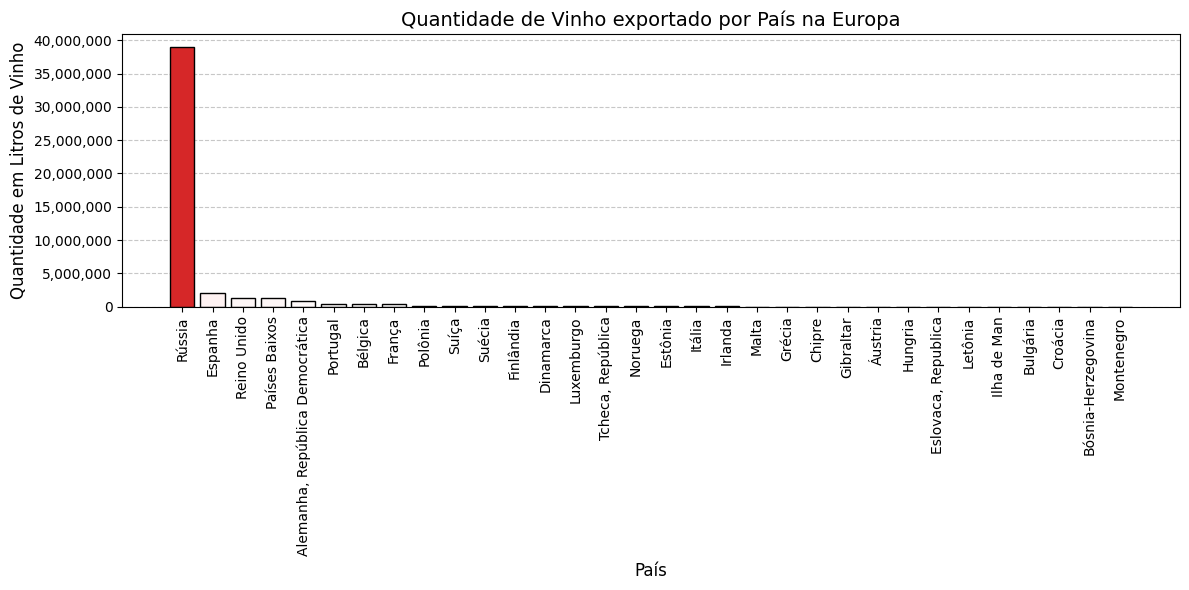

In [35]:
# Ordenar os dados por quantidade em ordem decrescente
europa_vinhos_resumido_sorted = europa_vinhos_resumido.sort_values(by='Quantidade', ascending=False)

# Extrair os dados ordenados
paises = europa_vinhos_resumido_sorted['Pais_destino']
quantidade = europa_vinhos_resumido_sorted['Quantidade']

# Definir a cor principal
cor_principal = '#d62728'

# Calcular o máximo e o mínimo da quantidade para normalização
max_quantidade = quantidade.max()
min_quantidade = quantidade.min()

# Normalizar a quantidade entre 0 e 1
normalized_quantidade = (quantidade - min_quantidade) / (max_quantidade - min_quantidade)

# Criar cores com base na quantidade normalizada e na cor principal
cores = [cor_principal if value == 1 else (1 - value, 0, 0, value) for value in normalized_quantidade]

# Criar o gráfico de barras com as cores calculadas
plt.figure(figsize=(12, 6))
bars = plt.bar(paises, quantidade, color=cores, edgecolor='black', zorder=2)

# Adicionar título e rótulos aos eixos
plt.title('Quantidade de Vinho exportado por País na Europa', fontsize=14)
plt.xlabel('País', fontsize=12)
plt.ylabel('Quantidade em Litros de Vinho', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# Formatando os rótulos do eixo y
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Exibir o grid atrás das barras
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)

# Exibir o gráfico
plt.tight_layout()
plt.show()


Dentro do bloco da Europa, A Rússia apresenta números elevados que o denominam como um possível outlier, então, é necessário sua análise isolada do resto do bloco, para identificar como a exportação para o país se comporta ao longo do tempo.

In [36]:
# Filtrar os dados excluindo a Rússia
europa_vinhos_sem_russia = europa_vinhos_resumido[europa_vinhos_resumido['Pais_destino'] != 'Rússia']

# Ordenar os dados por quantidade em ordem decrescente
europa_vinhos_sem_russia = europa_vinhos_sem_russia.sort_values(by='Quantidade', ascending=False)

# Extrair os dados ordenados
paises = europa_vinhos_sem_russia['Pais_destino']
quantidade = europa_vinhos_sem_russia['Quantidade']

# Definir a cor principal
cor_principal = '#d62728'

# Calcular o máximo e o mínimo da quantidade para normalização
max_quantidade = quantidade.max()
min_quantidade = quantidade.min()

# Normalizar a quantidade entre 0 e 1
normalized_quantidade = (quantidade - min_quantidade) / (max_quantidade - min_quantidade)

# Criar um mapa de cores linear com base na cor principal
cmap = LinearSegmentedColormap.from_list("custom", ['white', cor_principal])

# Criar o gráfico de barras com o gradiente de cores
plt.figure(figsize=(12, 6))
bars = plt.bar(paises, quantidade, color=cmap(normalized_quantidade), edgecolor='black', zorder=3)

# Adicionar título e rótulos aos eixos
plt.title('Quantidade de Vinho exportado por País na Europa sem Rússia', fontsize=14)
plt.xlabel('País', fontsize=12)
plt.ylabel('Quantidade em Litros de Vinho', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# Formatar os rótulos do eixo y
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Exibir o grid atrás das barras
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)

# Exibir o gráfico
plt.tight_layout()
plt.show()


Mesmo com o isolamento da Rússia do gráfico, ainda há países apresentando uma difícil interpretação. Para isso serão usadas repartições, para que seus números sejam melhor destacados

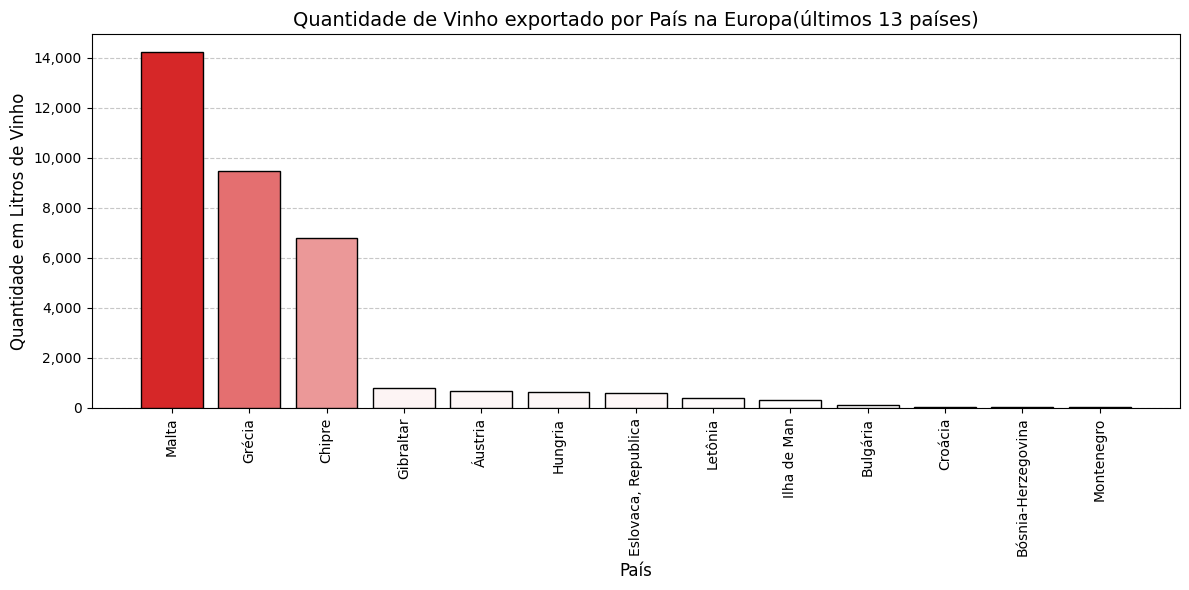

In [37]:
# Selecionar os 17 últimos países
ultimos_paises = europa_vinhos_sem_russia.tail(13)

# Extrair os dados
paises = ultimos_paises['Pais_destino']
quantidade = ultimos_paises['Quantidade']
# Definir a cor principal
cor_principal = '#d62728'

# Calcular o máximo e o mínimo da quantidade para normalização
max_quantidade = quantidade.max()
min_quantidade = quantidade.min()

# Normalizar a quantidade entre 0 e 1
normalized_quantidade = (quantidade - min_quantidade) / (max_quantidade - min_quantidade)

# Criar um mapa de cores linear com base na cor principal
cmap = LinearSegmentedColormap.from_list("custom", ['white', cor_principal])

# Criar o gráfico de barras com o gradiente de cores
plt.figure(figsize=(12, 6))
bars = plt.bar(paises, quantidade, color=cmap(normalized_quantidade), edgecolor='black', zorder=3)

# Adicionar título e rótulos aos eixos
plt.title('Quantidade de Vinho exportado por País na Europa(últimos 13 países)', fontsize=14)
plt.xlabel('País', fontsize=12)
plt.ylabel('Quantidade em Litros de Vinho', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# Formatar os rótulos do eixo y
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Exibir o grid atrás das barras
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)

# Exibir o gráfico
plt.tight_layout()
plt.show()

Mesmo com essa nova repartição, é difícil avaliar a exportação para os 10 países com menos valor. É interessante identificar em que momentos nos 15 anos de avaliação do dataset que ocorreram essas compras pontuais para relacionar a eventos que possam ter levado a exportação.

Já que foram os 10 últimos países que apresentaram valores ínfimos, inferiores a 5000L, para os gráficos de passagem de tempo, vamos dividir os países em grupos de 10, mantendo a Rússia e a Espanha como um grupos únicos por apresentarem valores mais acentuados que os demais, para uma melhor legibilidade, evitando países com curvas mais acentuadas dentro do mesmo grupo.

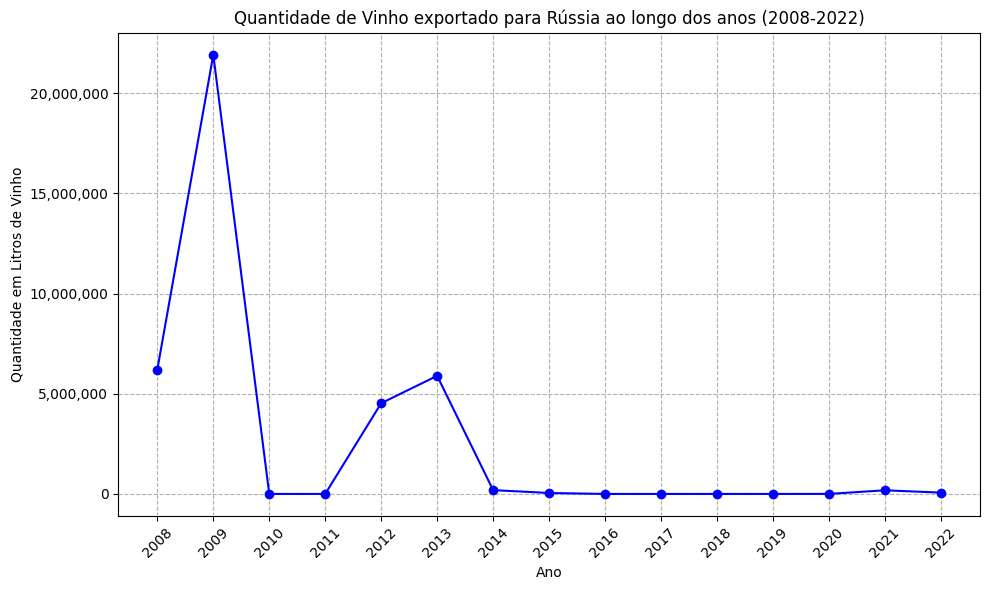

In [38]:
# Selecionar apenas os dados da Rússia
russia_data = europa_vinhos[europa_vinhos['País'] == 'Rússia']

# Obter os anos
anos = [coluna.split('_')[1] for coluna in russia_data.columns if coluna.startswith('Exportacao_')]

# Obter os valores de exportação para a Rússia
exportacao_russia = [russia_data[f'Exportacao_{ano}'].values[0] for ano in anos]

# Criar o gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(anos, exportacao_russia, marker='o', color='blue', linestyle='-')

# Adicionar rótulos e título
plt.xlabel('Ano')
plt.ylabel('Quantidade em Litros de Vinho')
plt.title('Quantidade de Vinho exportado para Rússia ao longo dos anos (2008-2022)')
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Exibir o gráfico
plt.grid(True, linestyle= '--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

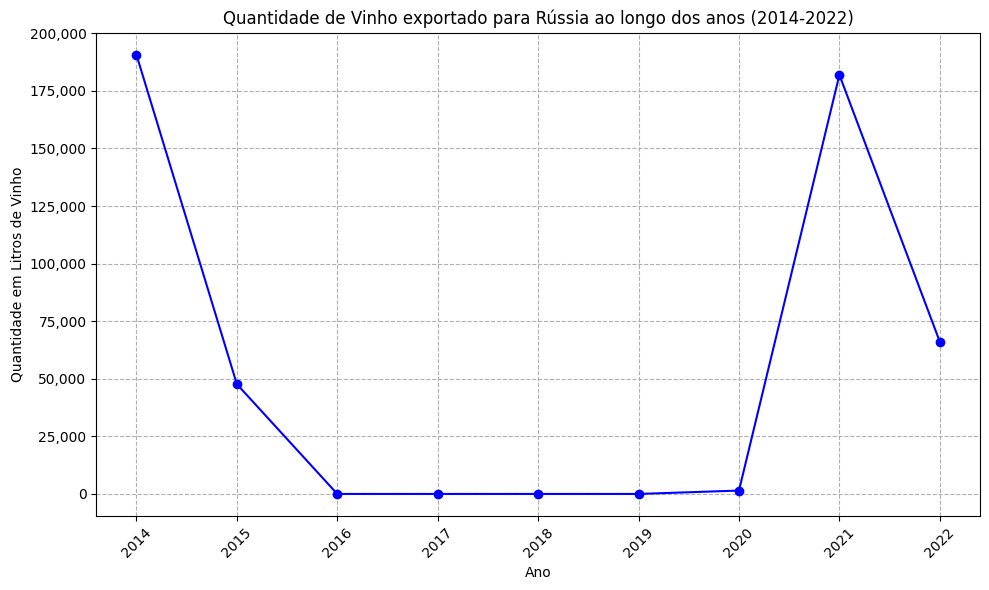

In [39]:
# Selecionar apenas os dados da Rússia
russia_data = europa_vinhos[europa_vinhos['País'] == 'Rússia']

# Obter os anos
anos = [coluna.split('_')[1] for coluna in russia_data.columns if coluna.startswith('Exportacao_')]

# Filtrar os anos para 2014 em diante
anos_filtrados = [ano for ano in anos if int(ano) >= 2014]

# Obter os valores de exportação para a Rússia a partir de 2014
exportacao_russia = [russia_data[f'Exportacao_{ano}'].values[0] for ano in anos if int(ano) >= 2014]

# Criar o gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(anos_filtrados, exportacao_russia, marker='o', color='blue', linestyle='-')

# Adicionar rótulos e título
plt.xlabel('Ano')
plt.ylabel('Quantidade em Litros de Vinho')
plt.title('Quantidade de Vinho exportado para Rússia ao longo dos anos (2014-2022)')
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Ajustar intervalos dos eixos
plt.xticks(rotation=45)
plt.grid(True, linestyle='--')

# Exibir o gráfico
plt.tight_layout()
plt.show()

O Gráfico apresenta picos extremos em 2009 e 2012-2013, o que provocou o País a, não só, ser considerado um outlier dentro do bloco da Europa, mas também teve grandes participações para os números da Europa serem os maiores dentro da análise.

Ainda que houve exportação para o país em alguns dos anos posteriores a 2013, o maior valor(2014) não chega a 1% do ano de 2009

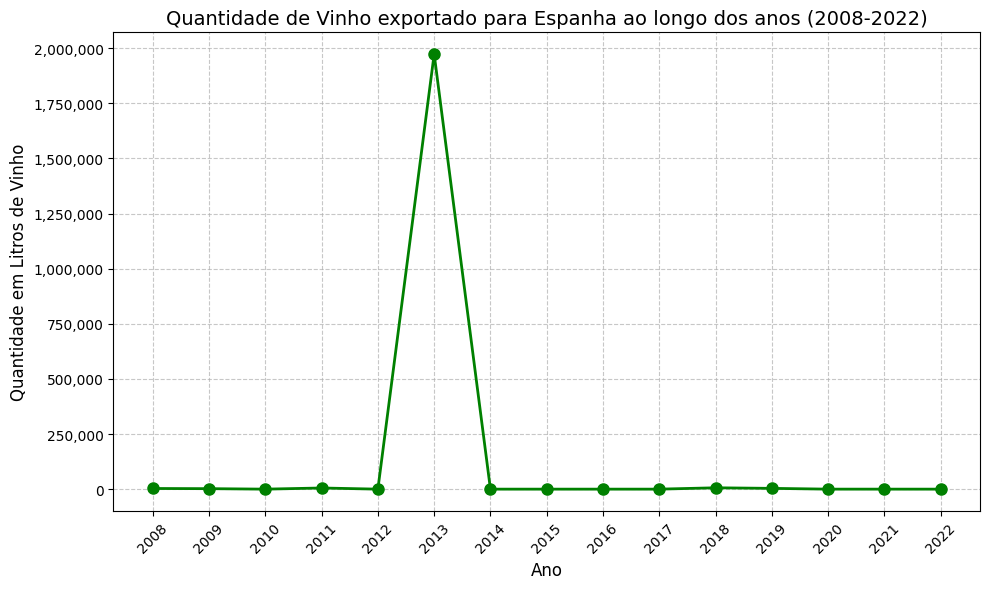

In [40]:
# Selecionar apenas os dados da Espanha
espanha_data = europa_vinhos[europa_vinhos['País'] == 'Espanha']

# Obter os anos
anos = [coluna.split('_')[1] for coluna in espanha_data.columns if coluna.startswith('Exportacao_')]

# Obter os valores de exportação para a Espanha
exportacao_espanha = [espanha_data[f'Exportacao_{ano}'].values[0] for ano in anos]

# Criar o gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(anos, exportacao_espanha, marker='o', color='green', linestyle='-', linewidth=2, markersize=8, label='Exportação de Vinhos')

# Adicionar rótulos e título
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Quantidade em Litros de Vinho', fontsize=12)
plt.title('Quantidade de Vinho exportado para Espanha ao longo dos anos (2008-2022)', fontsize=14)
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Estilizar e formatar a grade
plt.grid(True, linestyle='--', alpha=0.7)

# Rotacionar rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45, fontsize=10)

# Ajustar layout
plt.tight_layout()

# Exibir o gráfico
plt.show()


a Espanha apresenta comportamento semelhante a Rússia, com um pico de exportação em 2013, e mesmo que apresente valores de exportação em outros anos, o maior valor(2018) não chega a 1% do valor de 2013

In [41]:
# Selecionar apenas os dados da Espanha
espanha_data = europa_vinhos[europa_vinhos['País'] == 'Espanha']

# Obter os anos e exportações
anos = [coluna.split('_')[1] for coluna in espanha_data.columns if coluna.startswith('Exportacao_')]
exportacao_espanha = [espanha_data[f'Exportacao_{ano}'].values[0] for ano in anos]

# Dividir os dados em dois conjuntos (2008-2012 e 2014-2022)
anos_1 = anos[:5]
exportacao_espanha_1 = exportacao_espanha[:5]

anos_2 = anos[6:]  # Corrigido para corresponder ao mesmo número de anos
exportacao_espanha_2 = exportacao_espanha[6:]  # Corrigido para corresponder ao mesmo número de exportações

# Criar os subplots com eixos y compartilhados
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Título principal
fig.suptitle('Quantidade de Vinho exportado para Espanha ao longo dos anos', fontsize=16)

# Primeiro gráfico (2008-2012)
axs[0].plot(anos_1, exportacao_espanha_1, marker='o', color='green', linestyle='-', linewidth=2, markersize=8)
axs[0].set_title('2008-2012', fontsize=14)
axs[0].set_xlabel('Ano', fontsize=12)
axs[0].set_ylabel('Quantidade em Litros de Vinho', fontsize=12)
axs[0].grid(True, linestyle='--', alpha=0.7)
axs[0].tick_params(axis='both', which='major', labelsize=10)

# Segundo gráfico (2014-2022)
axs[1].plot(anos_2, exportacao_espanha_2, marker='o', color='green', linestyle='-', linewidth=2, markersize=8)
axs[1].set_title('2014-2022', fontsize=14)
axs[1].set_xlabel('Ano', fontsize=12)
axs[1].set_ylabel('Quantidade em Litros de Vinho', fontsize=12)
axs[1].grid(True, linestyle='--', alpha=0.7)
axs[1].tick_params(axis='both', which='major', labelsize=10)

# Ajustar o layout
plt.tight_layout()

# Exibir os gráficos
plt.show()


C:\Users\Guilherme\AppData\Local\Temp\ipykernel_7228\1205551132.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_paises['Total_Exportacao'] = df_paises.filter(like='Exportacao_').sum(axis=1)


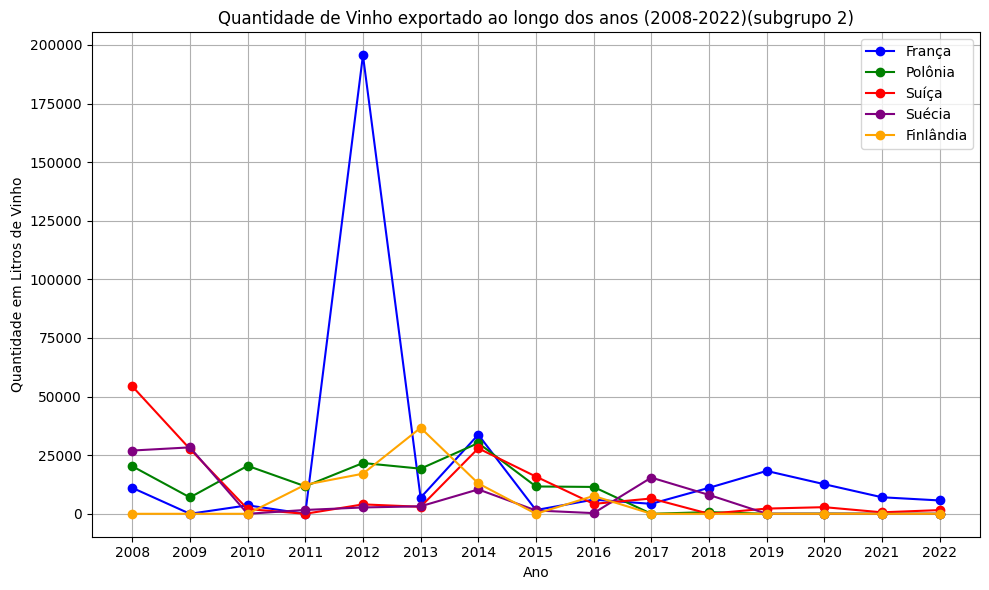

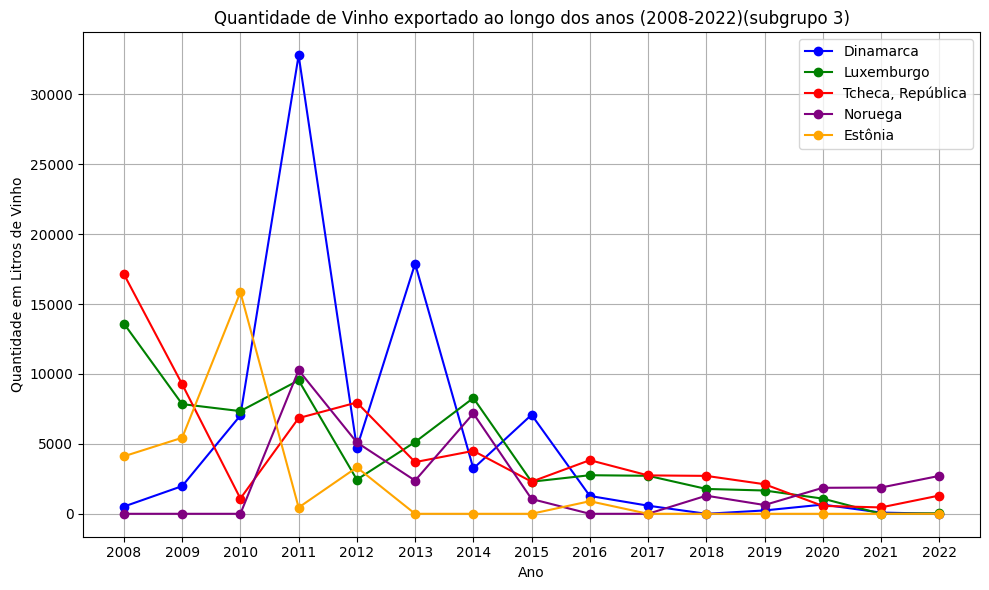

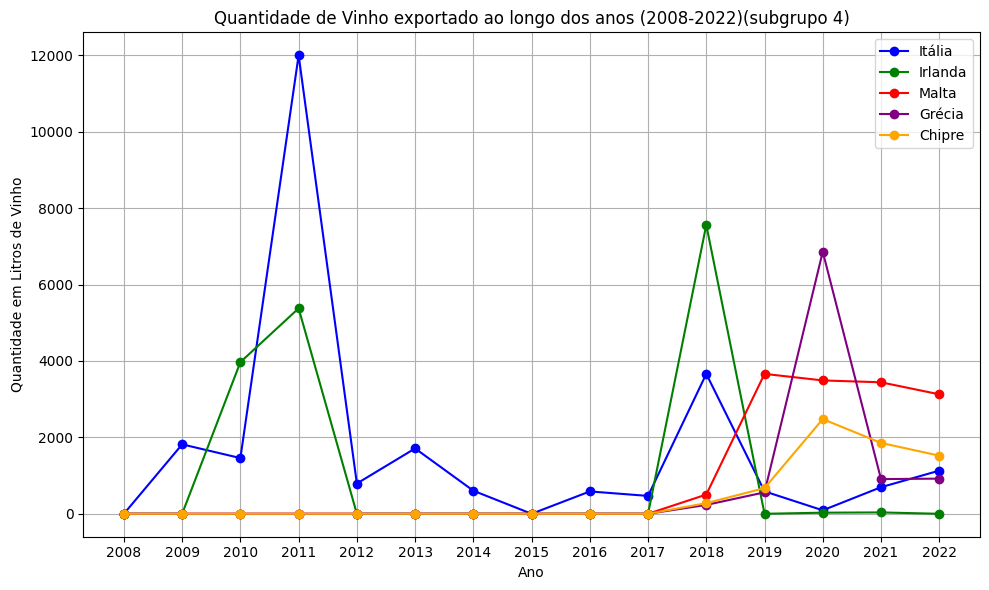

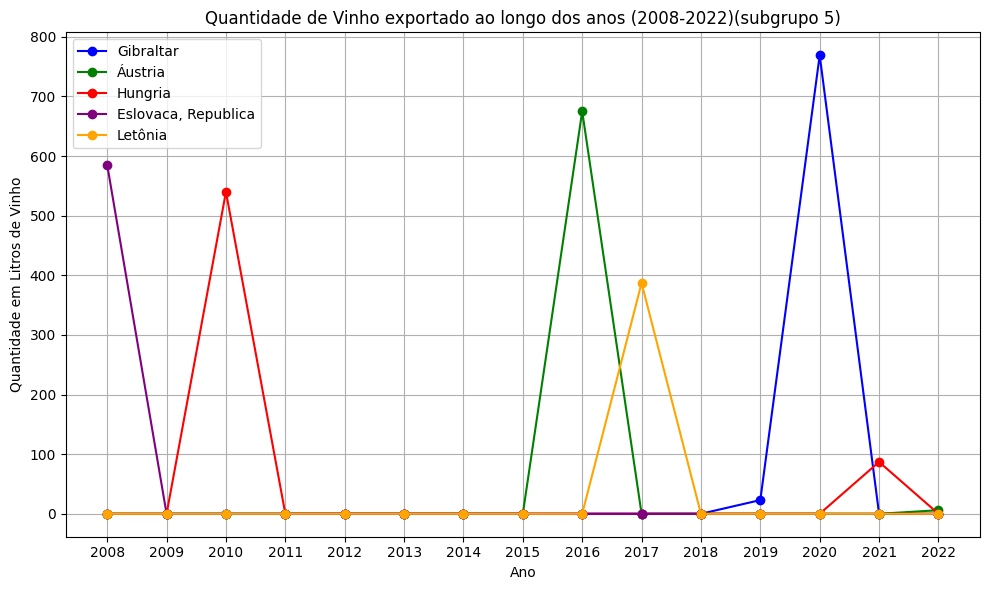

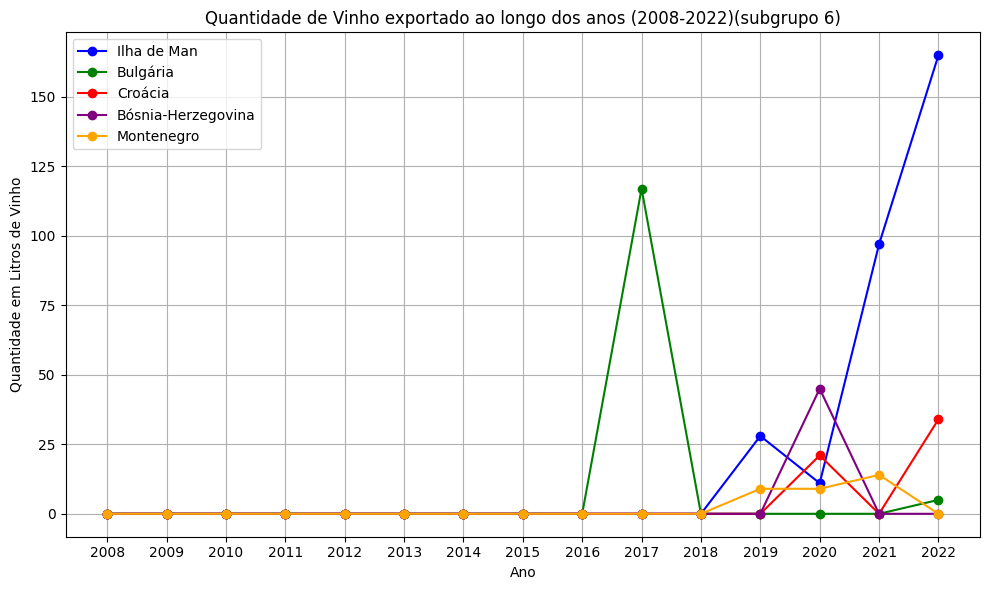

In [42]:
# Excluir Rússia e Espanha do dataframe
df_paises = europa_vinhos[(europa_vinhos['País'] != 'Rússia') & (europa_vinhos['País'] != 'Espanha')]

# Calcular a exportação total de cada país e ordenar em ordem decrescente
df_paises['Total_Exportacao'] = df_paises.filter(like='Exportacao_').sum(axis=1)
df_paises = df_paises.sort_values(by='Total_Exportacao', ascending=False)

# Dividir os países em grupos de 5
grupos_paises = [df_paises[i:i+5] for i in range(0, len(df_paises), 5)]

# Cores para os gráficos
cores = ['blue', 'green', 'red', 'purple', 'orange']

# Plotar gráficos de linhas para cada grupo de países
for i, grupo in enumerate(grupos_paises):
    fig, ax = plt.subplots(figsize=(10, 6))
    for j, (index, row) in enumerate(grupo.iterrows()):
        # Obter os anos e exportações
        anos = [coluna.split('_')[1] for coluna in grupo.columns if coluna.startswith('Exportacao_')]
        exportacao = [row[f'Exportacao_{ano}'] for ano in anos]
        
        # Plotar linha para o país
        ax.plot(anos, exportacao, marker='o', label=row['País'], color=cores[j])
    
    # Adicionar título e rótulos dos eixos
    ax.set_title(f'Quantidade de Vinho exportado ao longo dos anos (2008-2022)(subgrupo {i+1})')
    ax.set_xlabel('Ano')
    ax.set_ylabel('Quantidade em Litros de Vinho')
    
    # Adicionar legenda e grade
    ax.legend()
    ax.grid(True)
    
    # Exibir o gráfico
    plt.tight_layout()
    plt.show()


entender os picos, lembrar da palavra domesticada<br>
aconselhar estudar os picos nos anos e nos páíses<br>
quais anos outliers nos países picos<br>


Por mais que os gráficos apresentem certos ruídos é possível identificar que o grupo dos países de maior exportação (Grupo 1) apresentam uma angulação decrescente na curva após o ano de 2014. Também é visível que os países de menor valor (Grupo 5 e 6), apresentam valores pontuais de exportação, com excessão da Ilha de Man que apresenta valores crescentes nos últimos 2 anos

América do Sul

In [43]:
amesul_resumido = exportacao_vinhos_resumido[(exportacao_vinhos_resumido['Continente'] == 'América do Sul')]

amesul_resumido

Pais_destino  Quantidade     Valor      Continente
7          Argentina       51012    221684  América do Sul
18           Bolívia      204421    290118  América do Sul
27             Chile       23205     70572  América do Sul
32          Colômbia       43886     88017  América do Sul
45           Equador        3917      4037  América do Sul
58            Guiana        6633     19890  América do Sul
59   Guiana Francesa         112        50  América do Sul
97          Paraguai    29214770  38719031  América do Sul
98              Peru       24668     53789  América do Sul
114         Suriname       27101     46390  América do Sul
124          Uruguai      792595   1219878  América do Sul
126        Venezuela       55515     88828  América do Sul

In [44]:
amesul = exportacao_vinhos[(exportacao_vinhos['Continente'] == 'América do Sul')]
amesul

País  Exportacao_2008  Valor_2008  Exportacao_2009  \
7          Argentina                0           0              162   
18           Bolívia             3979        3990            40463   
27             Chile                0           0             1475   
32          Colômbia                0           0                0   
45           Equador                0           0                0   
58            Guiana                0           0                0   
59   Guiana Francesa                0           0                0   
97          Paraguai          2191901     1374088           486927   
98              Peru                0           0                0   
114         Suriname              900        1625             3830   
124          Uruguai                0           0                0   
126        Venezuela                0           0                0   

     Valor_2009  Exportacao_2010  Valor_2010  Exportacao_2011  Valor_2011  \
7          4523                0           0            13253       55460   
18        20729               54         282            12775       20215   
27         4297                0           0                0           0   
32            0                0           0                0           0   
45            0                0           0                0           0   
58            0              783        3654                0           0   
59            0                0           0                0           0   
97       392087           510989      449197           240168      276281   
98            0                0           0                0           0   
114       12918             1836        1269             3774        3735   
124           0              914        2929             1238        4404   
126           0                0           0                0           0   

     Exportacao_2012  ...  Valor_2018  Exportacao_2019  Valor_2019  \
7                  0  ...       59150                0           0   
18             11868  ...       57424                0           0   
27              8550  ...       42832                0           0   
32                 0  ...       26273              897        1999   
45                 0  ...           0                2           3   
58                 0  ...           0              424        1311   
59                 0  ...           0                0           0   
97            354824  ...     5494321          2419537     3826587   
98                 0  ...       19372             9755       17310   
114              396  ...           0             3206        4741   
124             1135  ...       29617             6180       18497   
126             1029  ...         355                0           0   

     Exportacao_2020  Valor_2020  Exportacao_2021  Valor_2021  \
7               1015        4176                6          13   
18              9900       16025             5850        8360   
27                11          13               26           6   
32             15660       23780            12160       21867   
45              3780        3824                0           0   
58               990        2577             2372        6525   
59                 0           0               90          32   
97           3299013     3869243          6522527     7192362   
98                 0           0             9720       17107   
114             4185        5277              900        1472   
124                0           0           136774      149842   
126             4086        9808            26415       35944   

     Exportacao_2022  Valor_2022      Continente  
7                480        3232  América do Sul  
18             32530       49011  América do Sul  
27              2094        7986  América do Sul  
32              8217       14068  América do Sul  
45               135         210  América do Sul  
58              2064        5823  Améric

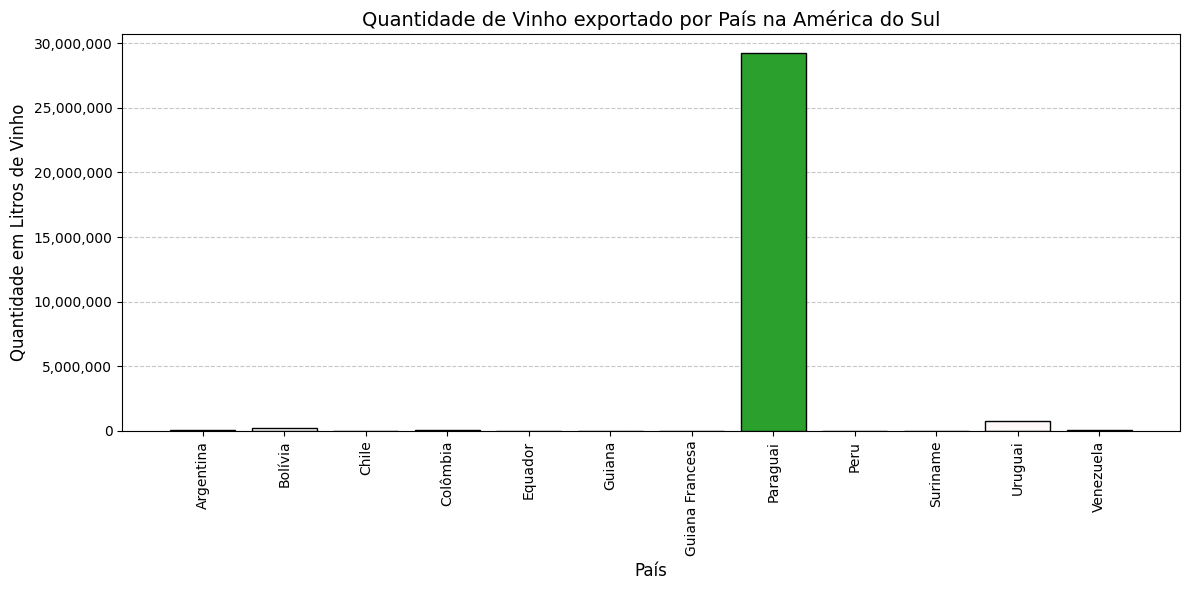

In [45]:
# Extrair os dados
paises = amesul_resumido['Pais_destino']
quantidade = amesul_resumido['Quantidade']

# Definir a cor principal
cor_principal = '#2ca02c'

# Calcular o máximo e o mínimo da quantidade para normalização
max_quantidade = quantidade.max()
min_quantidade = quantidade.min()

# Normalizar a quantidade entre 0 e 1
normalized_quantidade = (quantidade - min_quantidade) / (max_quantidade - min_quantidade)

# Criar cores com base na quantidade normalizada e na cor principal
cores = [cor_principal if value == 1 else (1 - value, 0, 0, value) for value in normalized_quantidade]

# Criar o gráfico de barras com as cores calculadas
plt.figure(figsize=(12, 6))
bars = plt.bar(paises, quantidade, color=cores, edgecolor='black', zorder=3)

# Adicionar título e rótulos aos eixos
plt.title('Quantidade de Vinho exportado por País na América do Sul', fontsize=14)
plt.xlabel('País', fontsize=12)
plt.ylabel('Quantidade em Litros de Vinho', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# Formatando os rótulos do eixo y
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Exibir o grid atrás das barras
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)

# Exibir o gráfico
plt.tight_layout()
plt.show()


O Paraguai se destaca como um possível outlier na América do Sul, neste caso faremos o mesmo tratamento feito na Europa, o país será isoládo e tratado de maneira individual

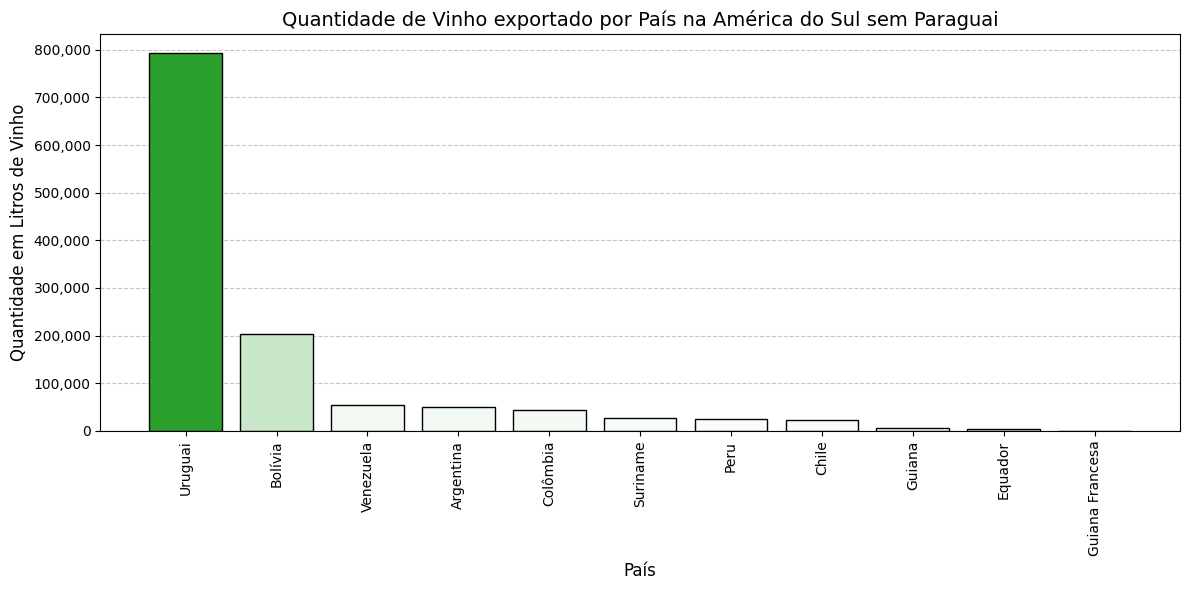

In [46]:
# Filtrar os dados excluindo o Paraguai
amesul_sem_paraguai = amesul_resumido[amesul_resumido['Pais_destino'] != 'Paraguai']

# Ordenar os dados por quantidade em ordem decrescente
amesul_sem_paraguai = amesul_sem_paraguai.sort_values(by='Quantidade', ascending=False)

# Extrair os dados
paises = amesul_sem_paraguai['Pais_destino']
quantidade = amesul_sem_paraguai['Quantidade']

# Definir a cor principal
cor_principal = '#2ca02c'

# Calcular o máximo e o mínimo da quantidade para normalização
max_quantidade = quantidade.max()
min_quantidade = quantidade.min()

# Normalizar a quantidade entre 0 e 1
normalized_quantidade = (max_quantidade - quantidade) / (max_quantidade - min_quantidade)  # Invertido

# Criar um mapa de cores linear com base na cor principal
cmap = LinearSegmentedColormap.from_list("custom", [cor_principal, 'white'])

# Criar o gráfico de barras com o gradiente de cores
plt.figure(figsize=(12, 6))
bars = plt.bar(paises, quantidade, color=cmap(normalized_quantidade), edgecolor='black', zorder=2)

# Adicionar título e rótulos aos eixos
plt.title('Quantidade de Vinho exportado por País na América do Sul sem Paraguai', fontsize=14)
plt.xlabel('País', fontsize=12)
plt.ylabel('Quantidade em Litros de Vinho', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# Formatar os rótulos do eixo y
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Exibir o grid atrás das barras
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)

# Exibir o gráfico
plt.tight_layout()
plt.show()


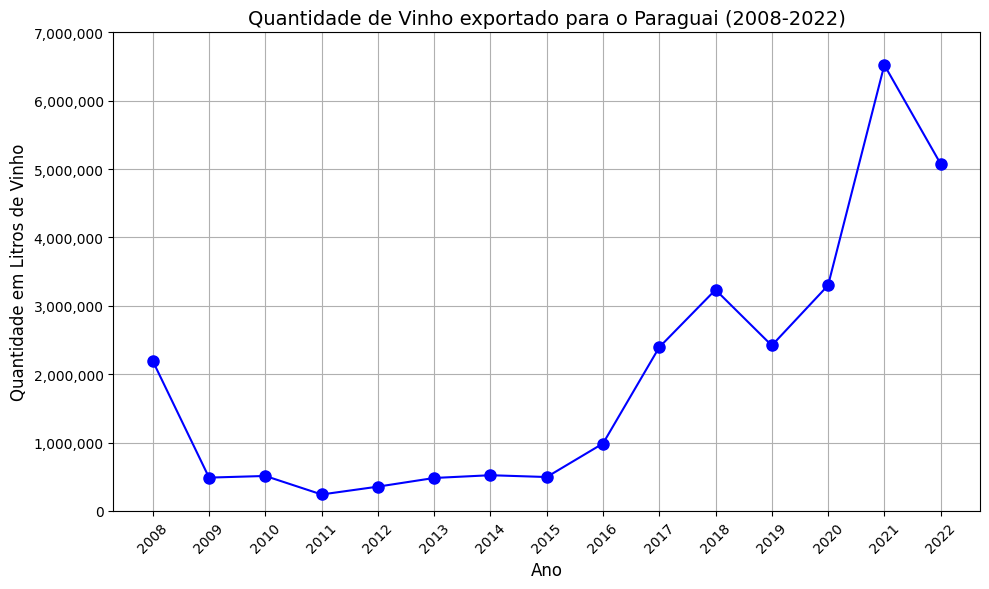

In [47]:
# Selecionar apenas os dados do Paraguai
paraguai_data = amesul[amesul['País'] == 'Paraguai']

# Obter os anos e exportações
anos = [coluna.split('_')[1] for coluna in paraguai_data.columns if coluna.startswith('Exportacao_')]
exportacao_paraguai = [paraguai_data[f'Exportacao_{ano}'].values[0] for ano in anos]

# Criar o gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(anos, exportacao_paraguai, marker='o', color='blue', linestyle='-', markersize=8)

# Adicionar título e rótulos
plt.title('Quantidade de Vinho exportado para o Paraguai (2008-2022)', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Quantidade em Litros de Vinho', fontsize=12)

# Definir limite superior para o eixo y
plt.ylim(0, 7000000)

# Formatar rótulos do eixo y
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Adicionar grid para x e y
plt.grid(True)

# Ajustar rotação dos rótulos do eixo x
plt.xticks(rotation=45)

# Ajustar layout
plt.tight_layout()

# Exibir o gráfico
plt.show()


Pelos gráficos podemos observar que o Paraguai manteve a exportação de vinhos nos últimos 15 anos, com números crescentes de 2015 até 2018, com um decrescimento em 2019 e depois mais crescimento até 2021

analisando sua primeira derivada, é possível observar que o intervalo 2019-2022 foram os anos de maior crescimento e decrescimento das exportações

In [48]:
paraguai_data

País  Exportacao_2008  Valor_2008  Exportacao_2009  Valor_2009  \
97  Paraguai          2191901     1374088           486927      392087   

    Exportacao_2010  Valor_2010  Exportacao_2011  Valor_2011  Exportacao_2012  \
97           510989      449197           240168      276281           354824   

    ...  Valor_2018  Exportacao_2019  Valor_2019  Exportacao_2020  Valor_2020  \
97  ...     5494321          2419537     3826587          3299013     3869243   

    Exportacao_2021  Valor_2021  Exportacao_2022  Valor_2022      Continente  
97          6522527     7192362          5076670     7156293  América do Sul  

[1 rows x 32 columns]

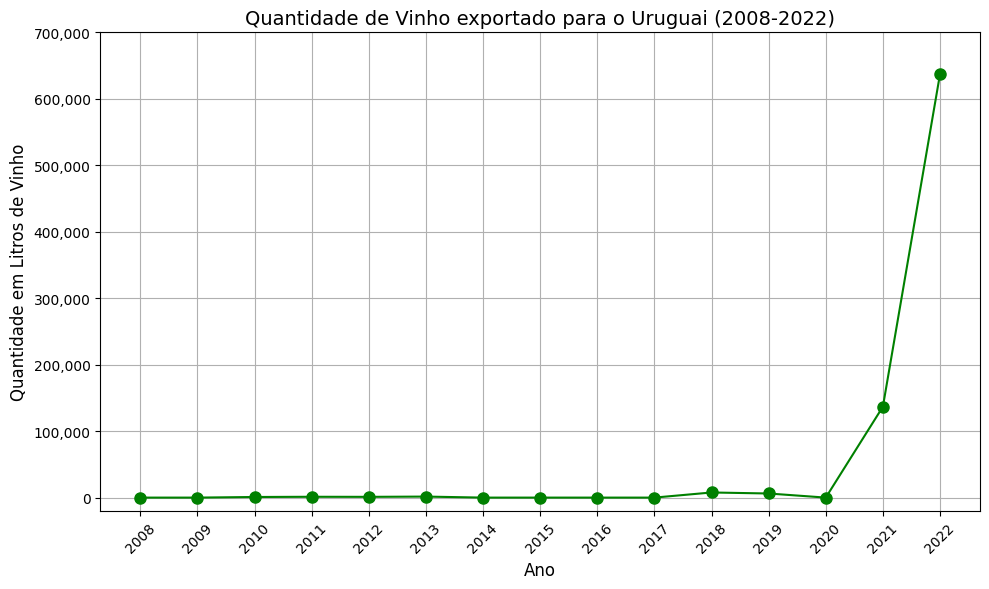

In [49]:
# Selecionar apenas os dados do Uruguai
uruguai_data = amesul[amesul['País'] == 'Uruguai']

# Obter os anos e exportações
anos = [coluna.split('_')[1] for coluna in uruguai_data.columns if coluna.startswith('Exportacao_')]
exportacao_uruguai = [uruguai_data[f'Exportacao_{ano}'].values[0] for ano in anos]

# Criar o gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(anos, exportacao_uruguai, marker='o', color='green', linestyle='-', markersize=8)

# Adicionar título e rótulos
plt.title('Quantidade de Vinho exportado para o Uruguai (2008-2022)', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Quantidade em Litros de Vinho', fontsize=12)

# Definir limite para o eixo y
plt.ylim(-20000, 700000)

# Formatar rótulos do eixo y
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Adicionar grid para x e y
plt.grid(True)

# Ajustar rotação dos rótulos do eixo x
plt.xticks(rotation=45)

# Ajustar layout
plt.tight_layout()

# Exibir o gráfico
plt.show()



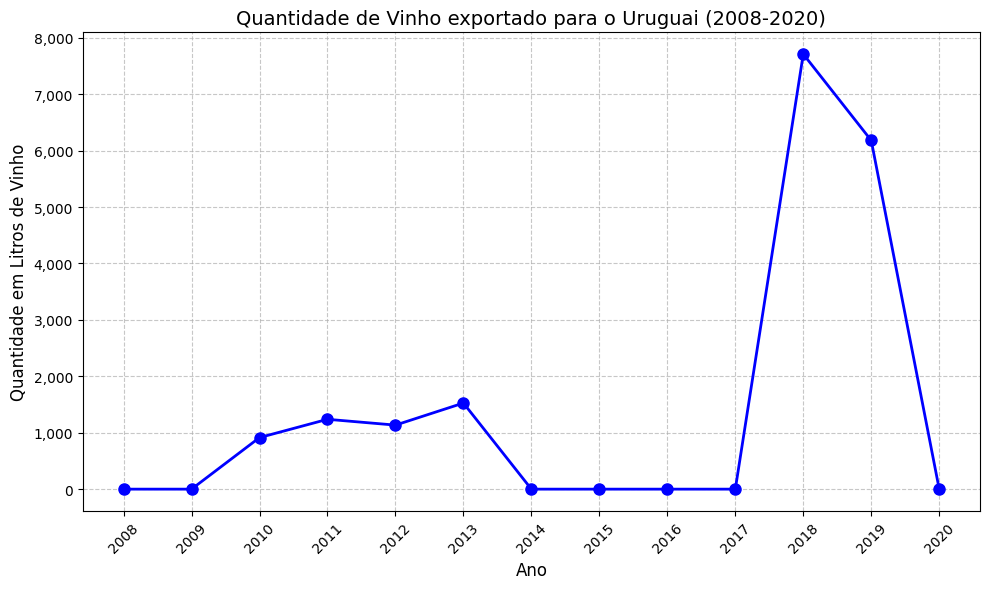

In [50]:
# Selecionar apenas os dados do Uruguai
uruguai_data = amesul[amesul['País'] == 'Uruguai']

# Obter os anos até 2020
anos = [coluna.split('_')[1] for coluna in uruguai_data.columns if coluna.startswith('Exportacao_') and int(coluna.split('_')[1]) <= 2020]

# Obter os valores de exportação para o Uruguai até 2020
exportacao_uruguai = [uruguai_data[f'Exportacao_{ano}'].values[0] for ano in anos]

# Criar o gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(anos, exportacao_uruguai, marker='o', color='blue', linestyle='-', linewidth=2, markersize=8)

# Adicionar rótulos e título
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Quantidade em Litros de Vinho', fontsize=12)
plt.title('Quantidade de Vinho exportado para o Uruguai (2008-2020)', fontsize=14)
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Exibir o grid
plt.grid(True, linestyle='--', alpha=0.7)

# Ajustar rotação dos rótulos do eixo x
plt.xticks(rotation=45, fontsize=10)

# Ajustar layout
plt.tight_layout()

# Exibir o gráfico
plt.show()


Podemos observar que houveram exportações para o Uruguai nos períodos 2010-2013 e 2018-2019, contudo a partir de 2021 houve um crescimento acentuado no volume exportado.

C:\Users\Guilherme\AppData\Local\Temp\ipykernel_7228\498742383.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_paises['Total_Exportacao'] = df_paises.filter(like='Exportacao_').sum(axis=1)


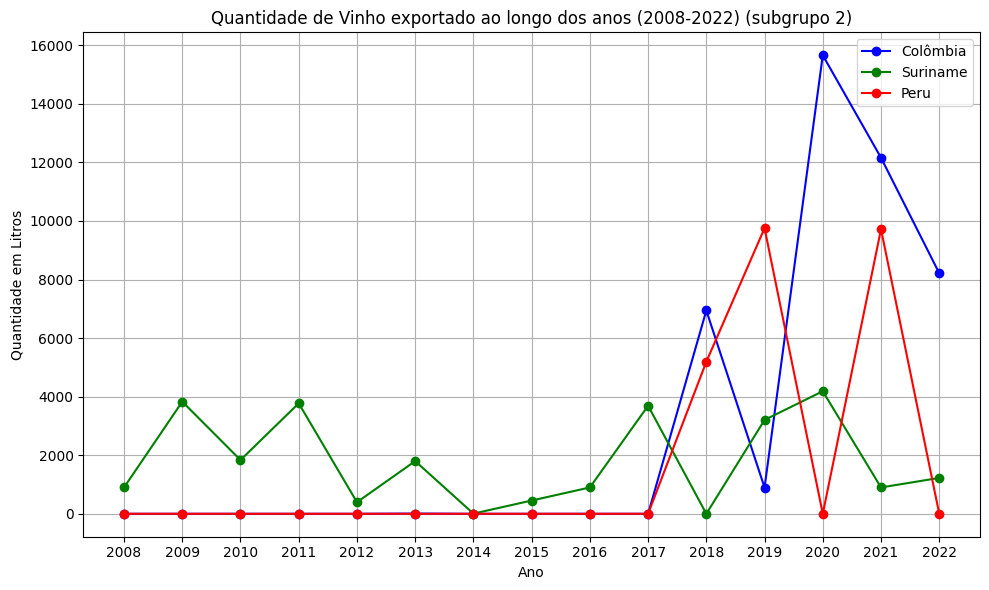

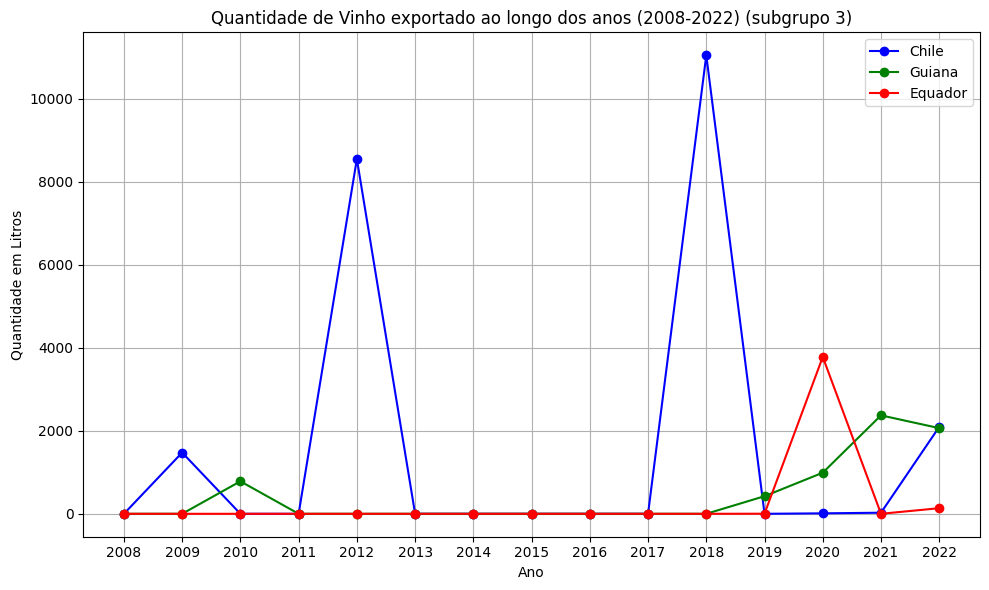

In [51]:
# Excluir Paraguai e Uruguai do dataframe
df_paises = amesul[(amesul['País'] != 'Paraguai') & (amesul['País'] != 'Uruguai')]

# Calcular a exportação total de cada país e ordenar em ordem decrescente
df_paises['Total_Exportacao'] = df_paises.filter(like='Exportacao_').sum(axis=1)
df_paises = df_paises.sort_values(by='Total_Exportacao', ascending=False)

# Dividir os países em grupos de 3
grupos_paises = [df_paises[i:i+3] for i in range(0, len(df_paises), 3)]

# Cores para os gráficos
cores = ['blue', 'green', 'red']

# Plotar gráficos de linhas para cada grupo de países
for i, grupo in enumerate(grupos_paises):
    fig, ax = plt.subplots(figsize=(10, 6))
    for j, (index, row) in enumerate(grupo.iterrows()):
        # Obter os anos e exportações
        anos = [coluna.split('_')[1] for coluna in grupo.columns if coluna.startswith('Exportacao_')]
        exportacao = [row[f'Exportacao_{ano}'] for ano in anos]
        
        # Plotar linha para o país
        ax.plot(anos, exportacao, marker='o', label=row['País'], color=cores[j])
    
    # Adicionar título e rótulos dos eixos
    ax.set_title(f'Quantidade de Vinho exportado ao longo dos anos (2008-2022) (subgrupo {i+1})')
    ax.set_xlabel('Ano')
    ax.set_ylabel('Quantidade em Litros')
    
    # Adicionar legenda e grade
    ax.legend()
    ax.grid(True)
    
    # Exibir o gráfico
    plt.tight_layout()
    plt.show()


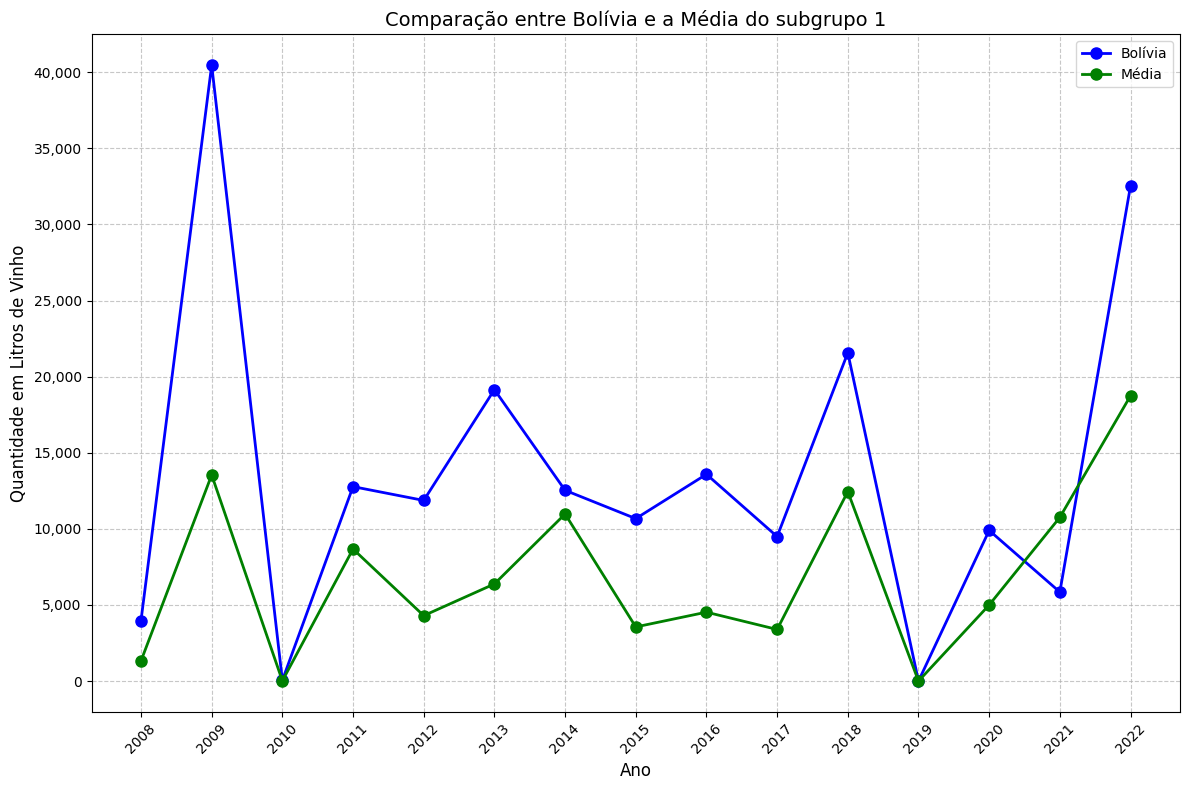

In [52]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

# Supondo que 'amesul' é o DataFrame que contém os dados de exportação para os países da América do Sul

# Função para obter os dados de exportação de um país
def get_exportacao_pais(pais, data):
    pais_data = data[data['País'] == pais]
    anos = [coluna.split('_')[1] for coluna in pais_data.columns if coluna.startswith('Exportacao_') and int(coluna.split('_')[1]) <= 2022]
    exportacao_pais = [pais_data[f'Exportacao_{ano}'].values[0] for ano in anos]
    return anos, exportacao_pais

# Obter dados para Bolívia, Venezuela, Argentina
anos_bolivia, exportacao_bolivia = get_exportacao_pais('Bolívia', amesul)
anos_venezuela, exportacao_venezuela = get_exportacao_pais('Venezuela', amesul)
anos_argentina, exportacao_argentina = get_exportacao_pais('Argentina', amesul)

# Calcular a média das exportações
exportacoes = [exportacao_bolivia, exportacao_venezuela, exportacao_argentina]
media_exportacao = [sum(x)/len(x) for x in zip(*exportacoes)]

# Criar o gráfico de linhas
plt.figure(figsize=(12, 8))
plt.plot(anos_bolivia, exportacao_bolivia, marker='o', color='blue', linestyle='-', linewidth=2, markersize=8, label='Bolívia')
plt.plot(anos_bolivia, media_exportacao, marker='o', color='green', linestyle='-', linewidth=2, markersize=8, label='Média')

# Adicionar rótulos e título
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Quantidade em Litros de Vinho', fontsize=12)
plt.title('Comparação entre Bolívia e a Média do subgrupo 1', fontsize=14)
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Exibir o grid
plt.grid(True, linestyle='--', alpha=0.7)

# Ajustar rotação dos rótulos do eixo x
plt.xticks(rotation=45, fontsize=10)

# Adicionar legenda
plt.legend()

# Ajustar layout
plt.tight_layout()

# Exibir o gráfico
plt.show()



AMÉRICA DO NORTE

In [53]:
amenor_resumido = exportacao_vinhos_resumido[(exportacao_vinhos_resumido['Continente'] == 'América do Norte')]

amenor_resumido

Pais_destino  Quantidade    Valor        Continente
5           Antígua e Barbuda        2104     7738  América do Norte
6         Antilhas Holandesas       97002   142915  América do Norte
8                       Aruba        1350     2435  América do Norte
11                    Bahamas       14101    76628  América do Norte
13                   Barbados         615     2552  América do Norte
24                     Canadá      195491  1097417  América do Norte
26              Cayman, Ilhas         425     1962  América do Norte
39                       Cuba      271044   304612  América do Norte
40                    Curaçao      191119   320683  América do Norte
42                   Dominica        1945     2857  América do Norte
48             Estados Unidos     3563355  9684567  América do Norte
55                    Granada        5610     7914  América do Norte
62                      Haiti     1791603  2327208  América do Norte
85                     México        6326    43837  América do Norte
107  São Vicente e Granadinas          28       99  América do Norte
120          Trinidade Tobago         891     4320  América do Norte

In [54]:
amenor = exportacao_vinhos[(exportacao_vinhos['Continente'] == 'América do Norte')]
amenor.head()

País  Exportacao_2008  Valor_2008  Exportacao_2009  \
5     Antígua e Barbuda                0           0                0   
6   Antilhas Holandesas            17938       22908             8235   
8                 Aruba                0           0                0   
11              Bahamas                0           0                0   
13             Barbados                0           0                0   

    Valor_2009  Exportacao_2010  Valor_2010  Exportacao_2011  Valor_2011  \
5            0                0           0                0           0   
6        10651             9810       12808             7335       10188   
8            0                0           0              900        1680   
11           0             3175       12759             4529       28810   
13           0                0           0                0           0   

    Exportacao_2012  ...  Valor_2018  Exportacao_2019  Valor_2019  \
5                 0  ...         191              219        1549   
6              9247  ...           0                0           0   
8                 0  ...           0                0           0   
11             1374  ...         634              791        3124   
13                0  ...           0               36         394   

    Exportacao_2020  Valor_2020  Exportacao_2021  Valor_2021  Exportacao_2022  \
5               624        1864              805        2268              419   
6                 0           0                0           0                0   
8                 0           0                0           0                0   
11             1212        3703             1083        4567             1215   
13              143         169              216         844              220   

    Valor_2022        Continente  
5         1866  América do Norte  
6            0  América do Norte  
8            0  América do Norte  
11        5799  América do Norte  
13        1145  América do Norte  

[5 rows x 32 columns]

In [55]:
# Ordenar os dados por quantidade em ordem decrescente
amenor_plot = amenor_resumido.sort_values(by='Quantidade', ascending=False)

# Extrair os dados
paises = amenor_plot['Pais_destino']
quantidade = amenor_plot['Quantidade']

# Definir a cor principal
cor_principal = '#ff7f0e'

# Calcular o máximo e o mínimo da quantidade para normalização
max_quantidade = quantidade.max()
min_quantidade = quantidade.min()

# Normalizar a quantidade entre 0 e 1
normalized_quantidade = (quantidade - min_quantidade) / (max_quantidade - min_quantidade)

# Criar um mapa de cores linear com base na cor principal (invertendo a ordem das cores)
cmap = LinearSegmentedColormap.from_list("custom", ['white', cor_principal])

# Criar o gráfico de barras com o gradiente de cores
plt.figure(figsize=(12, 6))
bars = plt.bar(paises, quantidade, color=cmap(normalized_quantidade), edgecolor='black', zorder=2)

# Adicionar título e rótulos aos eixos
plt.title('Quantidade de Vinho exportado por País na América do Norte', fontsize=14)
plt.xlabel('País', fontsize=12)
plt.ylabel('Quantidade em Litros de Vinho', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# Formatar os rótulos do eixo y
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Exibir o grid atrás das barras
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)

# Exibir o gráfico
plt.tight_layout()
plt.show()


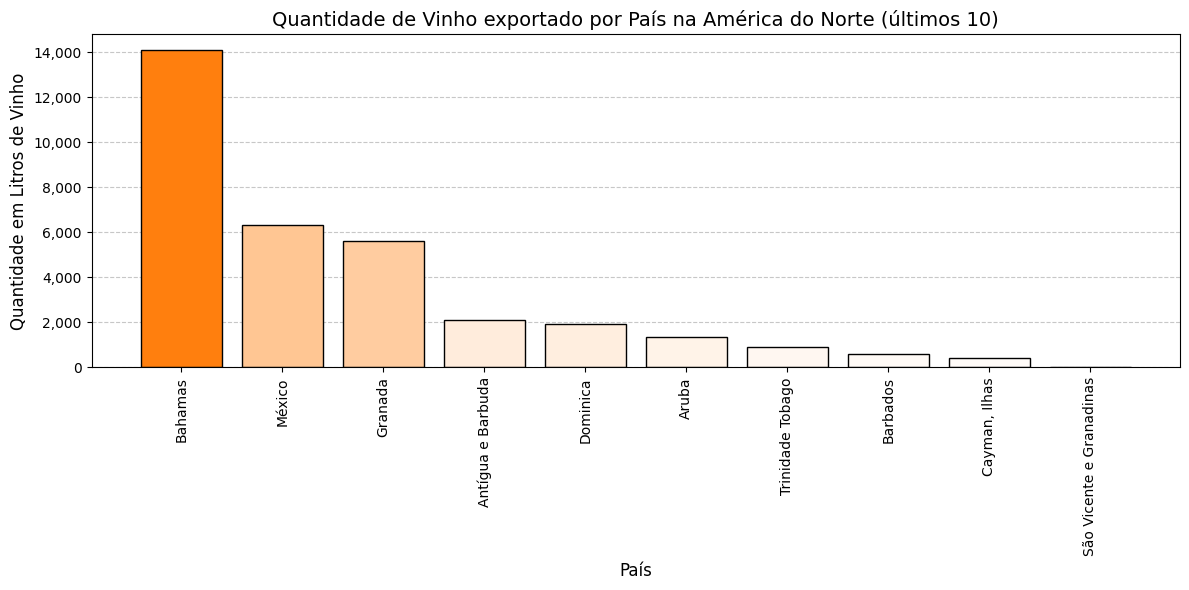

In [56]:
# Selecionar os 17 últimos países
ultimos_paises = amenor_plot.tail(10)

# Extrair os dados
paises = ultimos_paises['Pais_destino']
quantidade = ultimos_paises['Quantidade']

# Definir a cor principal
cor_principal = '#ff7f0e'

# Calcular o máximo e o mínimo da quantidade para normalização
max_quantidade = quantidade.max()
min_quantidade = quantidade.min()

# Normalizar a quantidade entre 0 e 1
normalized_quantidade = (quantidade - min_quantidade) / (max_quantidade - min_quantidade)

# Criar um mapa de cores linear com base na cor principal (invertendo a ordem das cores)
cmap = LinearSegmentedColormap.from_list("custom", ['white', cor_principal])

# Criar o gráfico de barras com o gradiente de cores
plt.figure(figsize=(12, 6))
bars = plt.bar(paises, quantidade, color=cmap(normalized_quantidade), edgecolor='black', zorder=2)

# Adicionar título e rótulos aos eixos
plt.title('Quantidade de Vinho exportado por País na América do Norte (últimos 10)', fontsize=14)
plt.xlabel('País', fontsize=12)
plt.ylabel('Quantidade em Litros de Vinho', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# Formatar os rótulos do eixo y
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Exibir o grid atrás das barras
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)

# Exibir o gráfico
plt.tight_layout()
plt.show()

Analisando o bloco da América do Norte, é observável que mesmo que os Estados Unidos e Haiti tenham um volume de exportação nos últimos 15 anos bem maior que o restante dos países, não houve diferenças tão grandes como no caso da Rússia na Europa e Paraguai na América do Sul. Ainda assim, não é possível identificar o volume de exportação para os países com exportação menor que Antilhas Holandesas.

Mesmo assim, ao avaliar a exportação ao longo dos 15 anos, Estados Unidos e Haiti serão isolados como um grupo para facilitar o comportamento dos países com menores valores

In [57]:
amenor_plot['Pais_destino']

48               Estados Unidos
62                        Haiti
39                         Cuba
24                       Canadá
40                      Curaçao
6           Antilhas Holandesas
11                      Bahamas
85                       México
55                      Granada
5             Antígua e Barbuda
42                     Dominica
8                         Aruba
120            Trinidade Tobago
13                     Barbados
26                Cayman, Ilhas
107    São Vicente e Granadinas
Name: Pais_destino, dtype: object

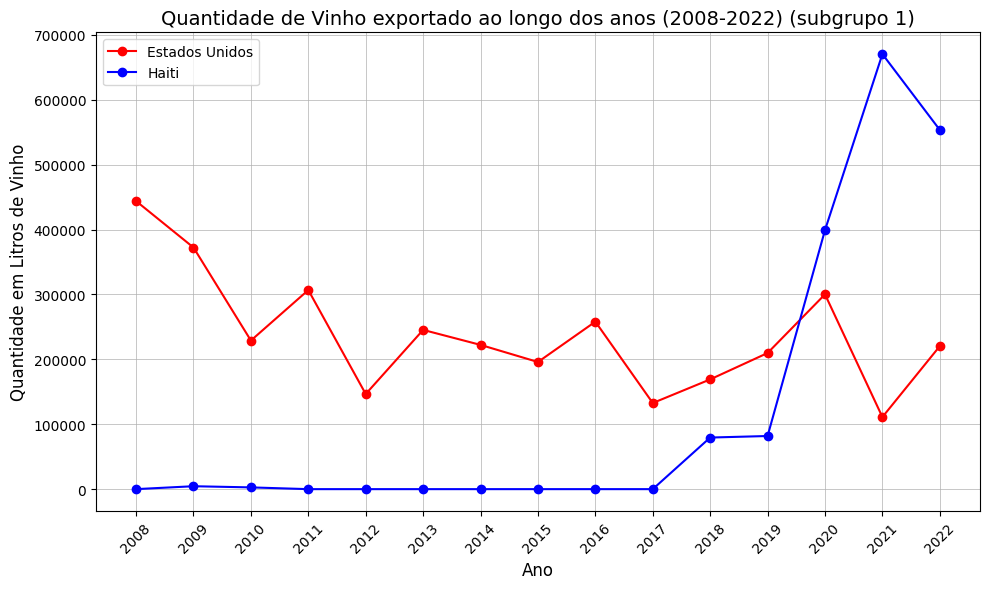

In [58]:
# Selecionar apenas os dados dos Estados Unidos e Haiti
us_haiti = amenor[(amenor['País'] == 'Estados Unidos') | (amenor['País'] == 'Haiti')]

# Plotar gráfico de linhas para os Estados Unidos e Haiti
fig, ax = plt.subplots(figsize=(10, 6))

# Cores distintas para cada país (vermelho para Estados Unidos, azul para Haiti)
cores = {'Estados Unidos': 'red', 'Haiti': 'blue'}

for index, row in us_haiti.iterrows():
    # Obter os anos e exportações
    anos = [coluna.split('_')[1] for coluna in us_haiti.columns if coluna.startswith('Exportacao_')]
    exportacao = [row[f'Exportacao_{ano}'] for ano in anos]
    
    # Plotar linha para o país com a cor correspondente
    ax.plot(anos, exportacao, marker='o', label=row['País'], color=cores[row['País']])

# Adicionar título e rótulos dos eixos
ax.set_title('Quantidade de Vinho exportado ao longo dos anos (2008-2022) (subgrupo 1)', fontsize=14)
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Quantidade em Litros de Vinho', fontsize=12)

# Ajustar a formatação dos eixos
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Ajustar a legenda
ax.legend(fontsize=10)

# Aumentar a espessura das linhas de grade
ax.grid(True, linewidth=0.5)

# Exibir o gráfico
plt.tight_layout()
plt.show()


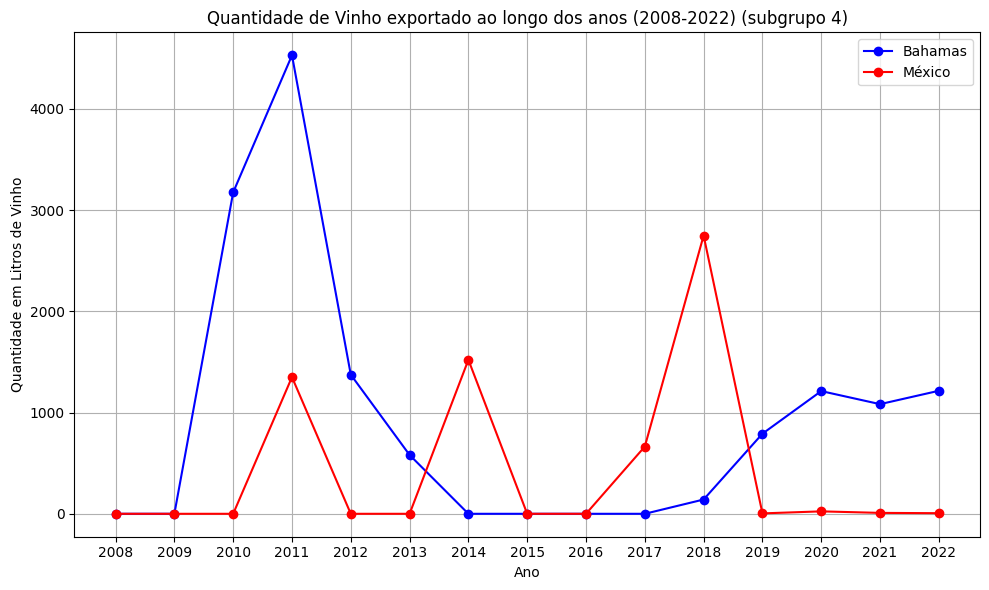

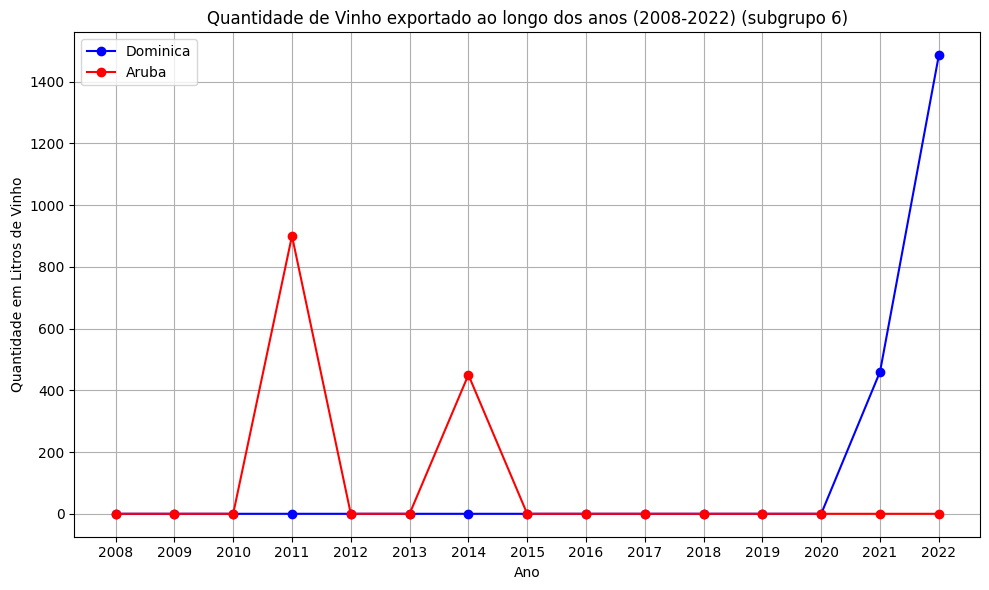

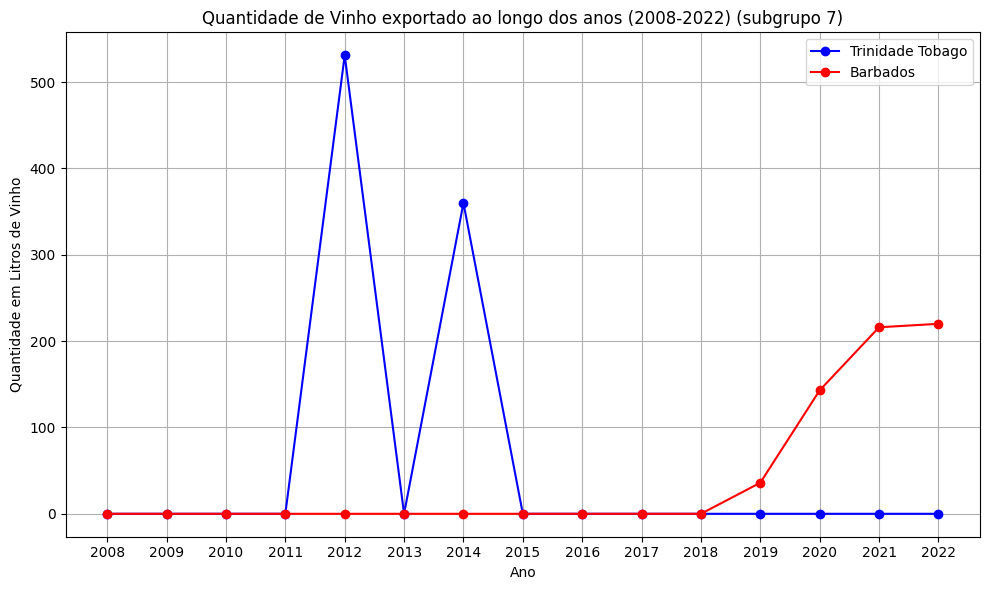

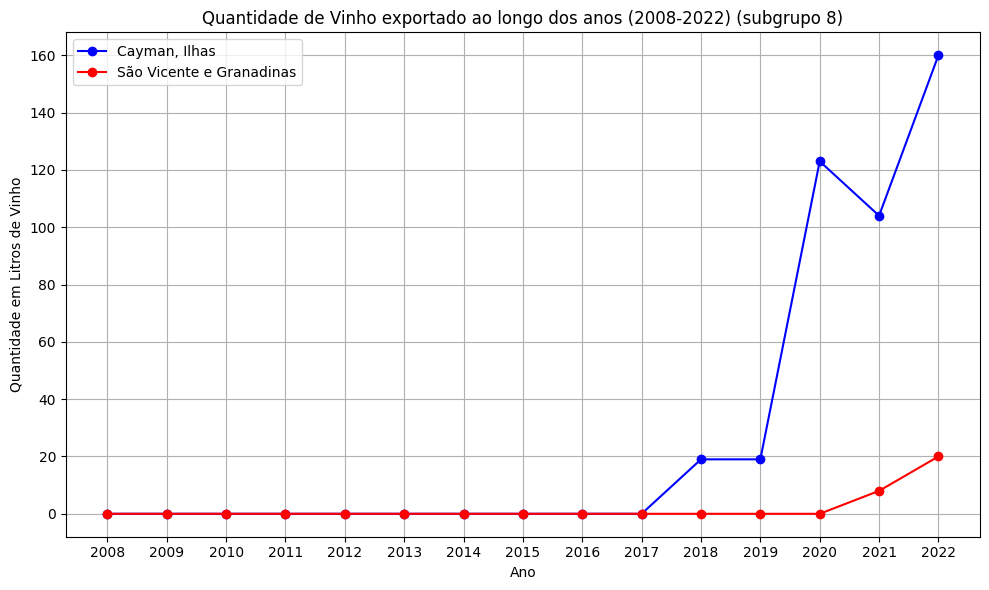

In [59]:
# Definir a ordem dos países
paises_ordem_especificada = [
    'Estados Unidos', 'Haiti', 'Cuba', 'Canadá', 'Curaçao', 'Antilhas Holandesas', 
    'Bahamas', 'México', 'Granada', 'Antígua e Barbuda', 'Dominica', 'Aruba', 
    'Trinidade Tobago', 'Barbados', 'Cayman, Ilhas', 'São Vicente e Granadinas'
]

# Filtrar os dados para incluir apenas os países na ordem especificada
amenor_ordem_especificada = amenor[amenor['País'].isin(paises_ordem_especificada)]

# Reordenar os dados de acordo com a ordem especificada
amenor_ordem_especificada['País'] = pd.Categorical(amenor_ordem_especificada['País'], categories=paises_ordem_especificada, ordered=True)
amenor_ordem_especificada = amenor_ordem_especificada.sort_values('País')

# Excluir os dados dos Estados Unidos e Haiti do DataFrame original
amenor_sem_us_haiti = amenor_ordem_especificada[~amenor_ordem_especificada['País'].isin(['Estados Unidos', 'Haiti'])]

# Dividir os países restantes em grupos de 2
grupos_paises = [amenor_sem_us_haiti[i:i+2] for i in range(0, len(amenor_sem_us_haiti), 2)]

# Cores azul e vermelho
cores = ['blue', 'red']

# Plotar gráficos de linhas para cada grupo de países
for i, grupo in enumerate(grupos_paises):
    fig, ax = plt.subplots(figsize=(10, 6))
    for j, (index, row) in enumerate(grupo.iterrows()):
        # Obter os anos e exportações
        anos = [coluna.split('_')[1] for coluna in grupo.columns if coluna.startswith('Exportacao_')]
        exportacao = [row[f'Exportacao_{ano}'] for ano in anos]
        
        # Plotar linha para o país
        ax.plot(anos, exportacao, marker='o', label=row['País'], color=cores[j])
    
    # Adicionar título e rótulos dos eixos
    ax.set_title(f'Quantidade de Vinho exportado ao longo dos anos (2008-2022) (subgrupo {i+2})')
    ax.set_xlabel('Ano')
    ax.set_ylabel('Quantidade em Litros de Vinho')
    
    # Adicionar legenda e grade
    ax.legend()
    ax.grid(True)
    
    # Exibir o gráfico
    plt.tight_layout()
    plt.show()



In [60]:
asinha_resumido = exportacao_vinhos_resumido[(exportacao_vinhos_resumido['Continente'] == 'Ásia')]
asinha_resumido

Pais_destino  Quantidade    Valor Continente
0               Afeganistão          11       46       Ásia
12               Bangladesh          12      133       Ásia
14                   Barein        1771     5855       Ásia
25                    Catar       13339    81608       Ásia
28                    China     2509458  4746525       Ásia
30                Cingapura       27567    90610       Ásia
35    Coreia, Republica Sul        3965    15479       Ásia
44   Emirados Arabes Unidos       17312   144843       Ásia
50                Filipinas       14222    31397       Ásia
64                Hong Kong      149132   453894       Ásia
68                    India         318     1390       Ásia
69                Indonésia           5        6       Ásia
70                      Irã         184      412       Ásia
75                    Japão     1181692  2377716       Ásia
76                 Jordânia          12       52       Ásia
81                  Malásia          63      143       Ásia
94                      Omã         194      670       Ásia
110               Singapura        8826    29780       Ásia
115               Tailândia        2436     6872       Ásia
116        Taiwan (FORMOSA)       76106   277050       Ásia
122                 Turquia        1236     1740       Ásia
127                  Vietnã        9799    13013       Ásia

In [61]:
asinha = exportacao_vinhos[(exportacao_vinhos['Continente'] == 'Ásia')]
asinha.head()

País  Exportacao_2008  Valor_2008  Exportacao_2009  Valor_2009  \
0   Afeganistão                0           0                0           0   
12   Bangladesh                0           0                0           0   
14       Barein                0           0                0           0   
25        Catar                0           0                0           0   
28        China             8689       25926          1553416      482400   

    Exportacao_2010  Valor_2010  Exportacao_2011  Valor_2011  Exportacao_2012  \
0                 0           0                0           0                0   
12                0           0                0           0                0   
14                0           0                0           0                0   
25                0           0                0           0                0   
28              795        2358            54156      334867            87905   

    ...  Valor_2018  Exportacao_2019  Valor_2019  Exportacao_2020  Valor_2020  \
0   ...           0                0           0                0           0   
12  ...           0                0           0                3          29   
14  ...           0              482        2144                8          28   
25  ...           0                0           0                0           0   
28  ...      126336           129852      376828           122253      363000   

    Exportacao_2021  Valor_2021  Exportacao_2022  Valor_2022  Continente  
0                11          46                0           0        Ásia  
12                2          20                7          84        Ásia  
14              302         894              979        2789        Ásia  
25                1           2                0           0        Ásia  
28            61884      264116           105395      404647        Ásia  

[5 rows x 32 columns]

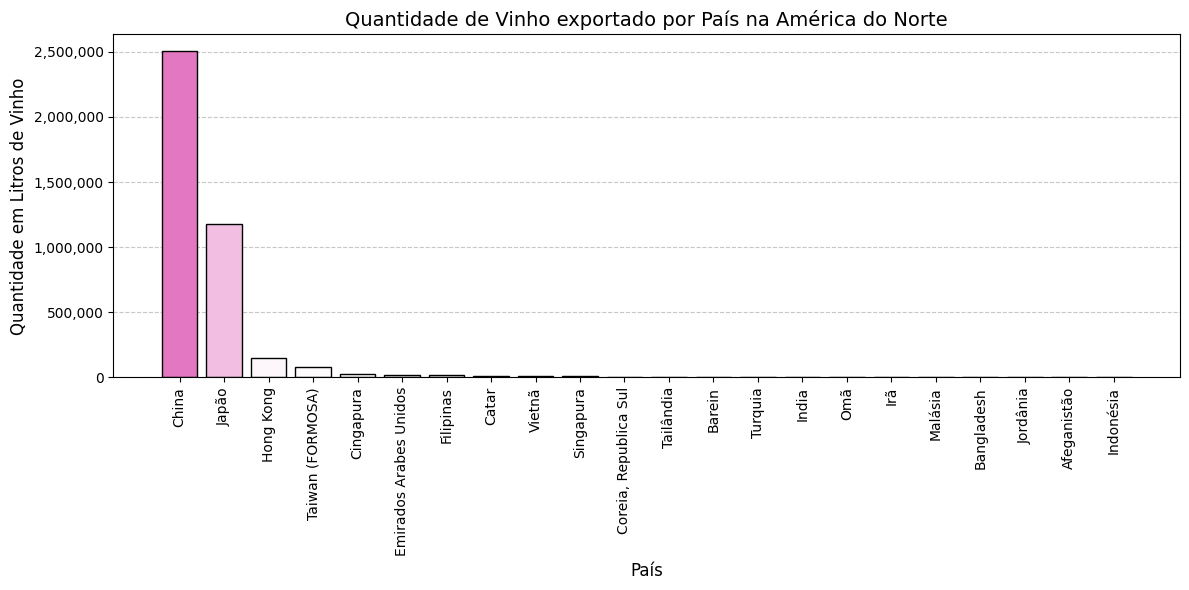

In [62]:
# Ordenar os dados por quantidade em ordem decrescente
asinha_plot = asinha_resumido.sort_values(by='Quantidade', ascending=False)

# Extrair os dados
paises = asinha_plot['Pais_destino']
quantidade = asinha_plot['Quantidade']

# Definir a cor principal
cor_principal = '#e377c2'

# Calcular o máximo e o mínimo da quantidade para normalização
max_quantidade = quantidade.max()
min_quantidade = quantidade.min()

# Normalizar a quantidade entre 0 e 1
normalized_quantidade = (quantidade - min_quantidade) / (max_quantidade - min_quantidade)

# Criar um mapa de cores linear com base na cor principal (invertendo a ordem das cores)
cmap = LinearSegmentedColormap.from_list("custom", ['white', cor_principal])

# Criar o gráfico de barras com o gradiente de cores
plt.figure(figsize=(12, 6))
bars = plt.bar(paises, quantidade, color=cmap(normalized_quantidade), edgecolor='black', zorder=2)

# Adicionar título e rótulos aos eixos
plt.title('Quantidade de Vinho exportado por País na América do Norte', fontsize=14)
plt.xlabel('País', fontsize=12)
plt.ylabel('Quantidade em Litros de Vinho', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# Formatar os rótulos do eixo y
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Exibir o grid atrás das barras
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)

# Exibir o gráfico
plt.tight_layout()
plt.show()


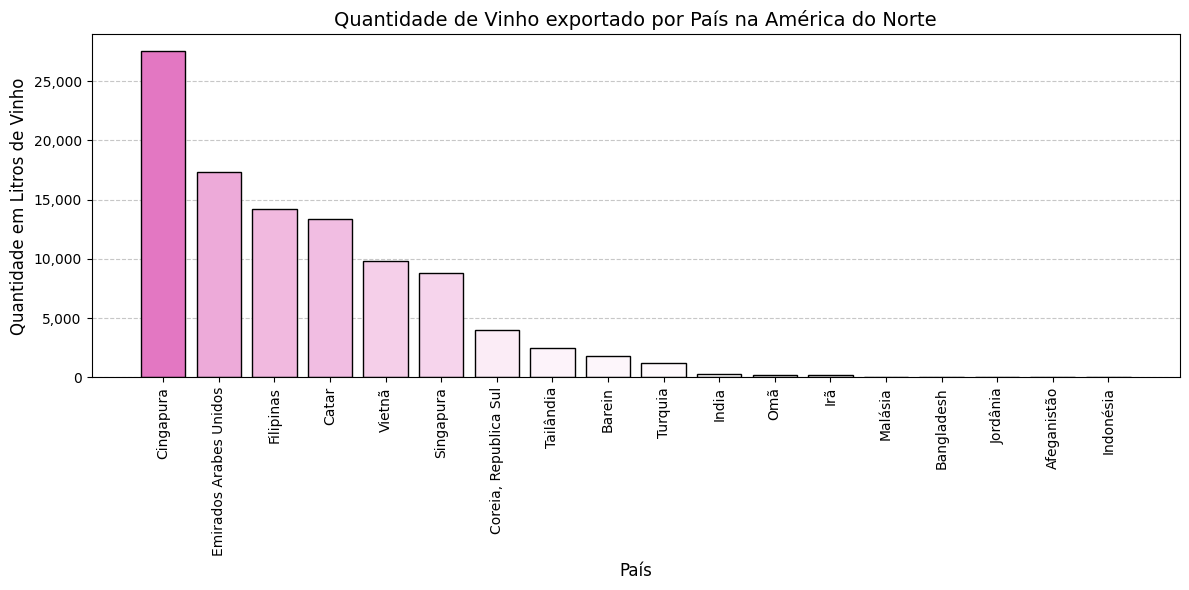

In [63]:
# Remover os quatro primeiros países do DataFrame
asinha_plot = asinha_plot.iloc[4:]

# Extrair os dados atualizados
paises = asinha_plot['Pais_destino']
quantidade = asinha_plot['Quantidade']

# Definir a cor principal
cor_principal = '#e377c2'

# Calcular o máximo e o mínimo da quantidade para normalização
max_quantidade = quantidade.max()
min_quantidade = quantidade.min()

# Normalizar a quantidade entre 0 e 1
normalized_quantidade = (quantidade - min_quantidade) / (max_quantidade - min_quantidade)

# Criar um mapa de cores linear com base na cor principal (invertendo a ordem das cores)
cmap = LinearSegmentedColormap.from_list("custom", ['white', cor_principal])

# Criar o gráfico de barras com o gradiente de cores
plt.figure(figsize=(12, 6))
bars = plt.bar(paises, quantidade, color=cmap(normalized_quantidade), edgecolor='black', zorder=2)

# Adicionar título e rótulos aos eixos
plt.title('Quantidade de Vinho exportado por País na América do Norte', fontsize=14)
plt.xlabel('País', fontsize=12)
plt.ylabel('Quantidade em Litros de Vinho', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# Formatar os rótulos do eixo y
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Exibir o grid atrás das barras
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)

# Exibir o gráfico
plt.tight_layout()
plt.show()


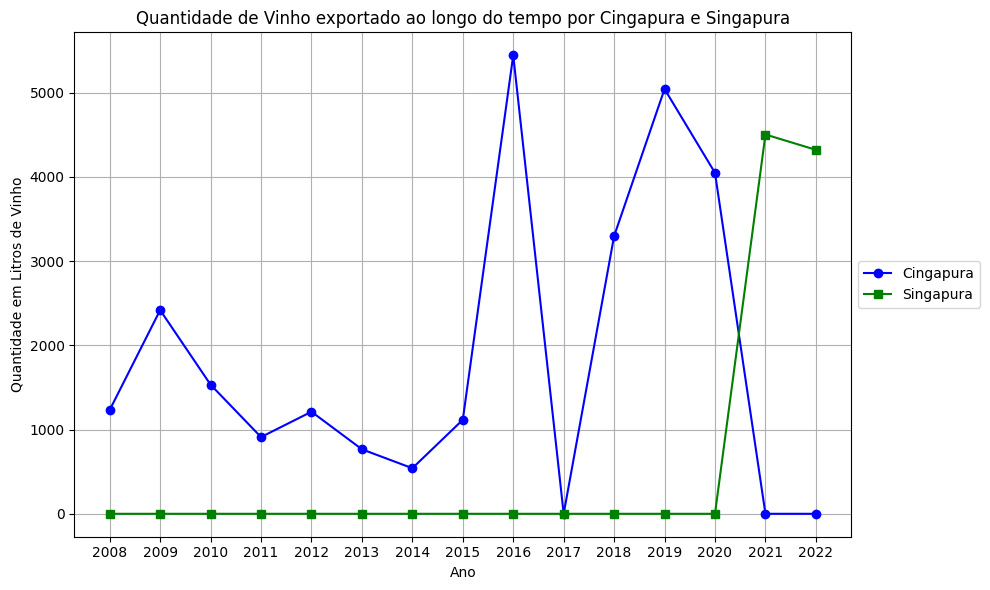

In [64]:
# Selecionar apenas os dados de Cingapura e Singapura
cinga_singa = asinha[(asinha['País'] == 'Cingapura') | (asinha['País'] == 'Singapura')]

# Definir cores e marcadores para cada país
cores = {'Cingapura': 'blue', 'Singapura': 'green'}
marcadores = {'Cingapura': 'o', 'Singapura': 's'}

# Plotar gráfico de linhas para os países
fig, ax = plt.subplots(figsize=(10, 6))
for index, row in cinga_singa.iterrows():
    # Obter os anos e exportações
    anos = [coluna.split('_')[1] for coluna in cinga_singa.columns if coluna.startswith('Exportacao_')]
    exportacao = [row[f'Exportacao_{ano}'] for ano in anos]
    
    # Plotar linha para o país
    ax.plot(anos, exportacao, marker=marcadores[row['País']], label=row['País'], color=cores[row['País']])

# Adicionar título e rótulos dos eixos
ax.set_title('Quantidade de Vinho exportado ao longo do tempo por Cingapura e Singapura')
ax.set_xlabel('Ano')
ax.set_ylabel('Quantidade em Litros de Vinho')

# Adicionar legenda fora do gráfico
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adicionar grade de fundo
ax.grid(True)

# Exibir o gráfico
plt.tight_layout()
plt.show()


In [65]:
cinga_singa

País  Exportacao_2008  Valor_2008  Exportacao_2009  Valor_2009  \
30   Cingapura             1233        4699             2419        6110   
110  Singapura                0           0                0           0   

     Exportacao_2010  Valor_2010  Exportacao_2011  Valor_2011  \
30              1533        5504              911        3317   
110                0           0                0           0   

     Exportacao_2012  ...  Valor_2018  Exportacao_2019  Valor_2019  \
30              1212  ...       11616             5044       19099   
110                0  ...           0                0           0   

     Exportacao_2020  Valor_2020  Exportacao_2021  Valor_2021  \
30              4049        9316                0           0   
110                0           0             4504       14346   

     Exportacao_2022  Valor_2022  Continente  
30                 0           0        Ásia  
110             4322       15434        Ásia  

[2 rows x 32 columns]

In [66]:
# Somar os valores da linha de Cingapura à linha de Singapura
asinha.loc[110] += asinha.loc[30]

# Excluir a linha de Cingapura
asinha.drop(index=30, inplace=True)

# Substituir SingapuraCingapura por Singapura na coluna País
asinha['País'] = asinha['País'].replace('SingapuraCingapura', 'Singapura')

# Substituir SingapuraCingapura por Singapura na coluna País
asinha['Continente'] = asinha['Continente'].replace('ÁsiaÁsia', 'Ásia')

C:\Users\Guilherme\AppData\Local\Temp\ipykernel_7228\4127555687.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asinha.drop(index=30, inplace=True)
C:\Users\Guilherme\AppData\Local\Temp\ipykernel_7228\4127555687.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asinha['País'] = asinha['País'].replace('SingapuraCingapura', 'Singapura')
C:\Users\Guilherme\AppData\Local\Temp\ipykernel_7228\4127555687.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [67]:
# Selecionar apenas os dados da China e Japão
chipao = asinha[(asinha['País'] == 'China') | (asinha['País'] == 'Japão')]

# Definir cores para cada país
cores = {'China': 'blue', 'Japão': 'green'}

# Plotar gráfico de linhas para os países
fig, ax = plt.subplots(figsize=(10, 6))
for index, row in chipao.iterrows():
    # Obter os anos e exportações
    anos = [coluna.split('_')[1] for coluna in chipao.columns if coluna.startswith('Exportacao_')]
    exportacao = [row[f'Exportacao_{ano}'] for ano in anos]
    
    # Plotar linha para o país com marcador redondo
    ax.plot(anos, exportacao, label=row['País'], color=cores[row['País']], marker='o')

# Adicionar título e rótulos dos eixos
ax.set_title(f'Quantidade de Vinho exportado ao longo dos anos (2008-2022) (subgrupo 1)')
ax.set_xlabel('Ano')
ax.set_ylabel('Quantidade em Litros de Vinho')

# Adicionar legenda fora do gráfico
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adicionar grade de fundo
ax.grid(True)

# Formatando os rótulos do eixo y
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Exibir o gráfico
plt.tight_layout()
plt.show()


C:\Users\Guilherme\AppData\Local\Temp\ipykernel_7228\485926974.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_paises['Total_Exportacao'] = df_paises.filter(like='Exportacao_').sum(axis=1)


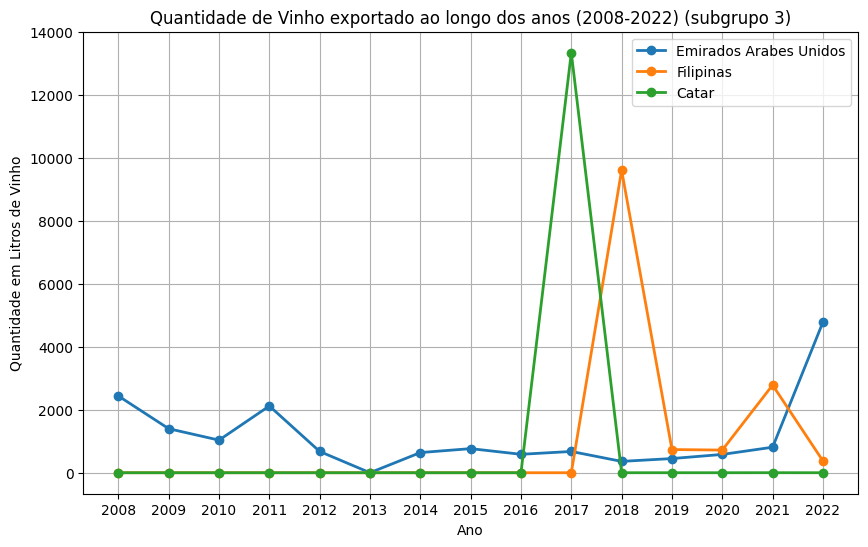

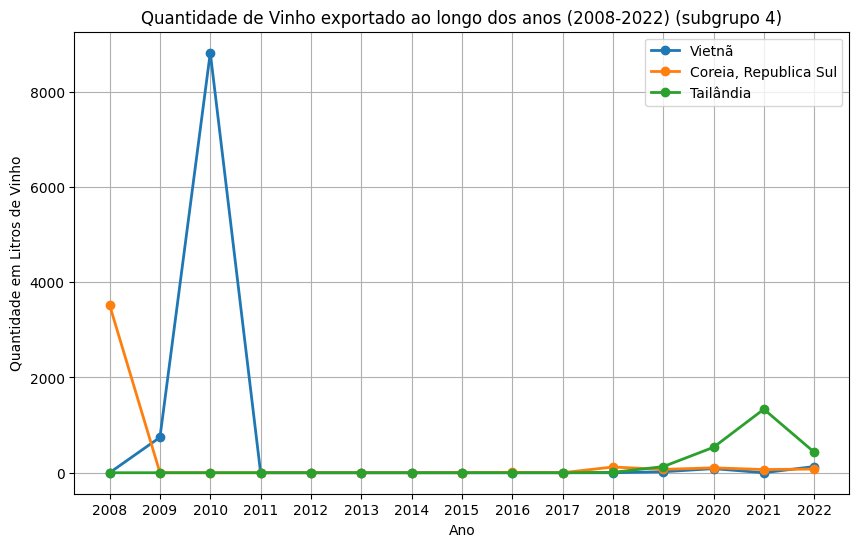

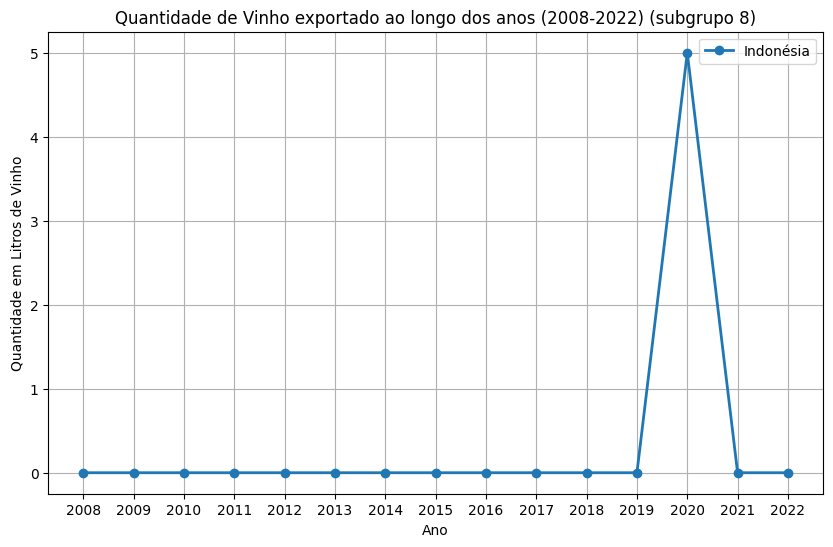

In [68]:
# Excluir Rússia e Espanha do dataframe
df_paises = asinha[(asinha['País'] != 'China') & (asinha['País'] != 'Japão')]

# Calcular a exportação total de cada país e ordenar em ordem decrescente
df_paises['Total_Exportacao'] = df_paises.filter(like='Exportacao_').sum(axis=1)
df_paises = df_paises.sort_values(by='Total_Exportacao', ascending=False)

# Dividir os países em grupos de 3
grupos_paises = [df_paises[i:i+3] for i in range(0, len(df_paises), 3)]

# Cores para cada país
cores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Plotar gráficos de linhas para cada grupo de países
for i, grupo in enumerate(grupos_paises):
    fig, ax = plt.subplots(figsize=(10, 6))
    for j, (_, row) in enumerate(grupo.iterrows()):
        # Obter os anos e exportações
        anos = [coluna.split('_')[1] for coluna in grupo.columns if coluna.startswith('Exportacao_')]
        exportacao = [row[f'Exportacao_{ano}'] for ano in anos]
        
        # Plotar linha para o país com cor específica
        ax.plot(anos, exportacao, marker='o', label=row['País'], color=cores[j], linewidth=2)

    # Adicionar título e rótulos dos eixos
    ax.set_title(f'Quantidade de Vinho exportado ao longo dos anos (2008-2022) (subgrupo {i+2})')
    ax.set_xlabel('Ano')
    ax.set_ylabel('Quantidade em Litros de Vinho')
    ax.grid(True)
    ax.legend()

    # Exibir o gráfico
    plt.show()

In [69]:
fifi_resumido = exportacao_vinhos_resumido[(exportacao_vinhos_resumido['Continente'] == 'África')]
fifi_resumido

Pais_destino  Quantidade   Valor Continente
1          África do Sul          30     116     África
3                 Angola      168868  576189     África
17                 Benin       15399   37765     África
22            Cabo Verde       12625   50363     África
23              Camarões        1749    7654     África
33               Comores           9      25     África
34                 Congo         360     570     África
53                  Gana      102178  139681     África
60          Guine Bissau          48      90     África
61      Guine Equatorial       20684   81903     África
79               Libéria       26953   98667     África
84            Mauritânia           9      85     África
86            Moçambique         383    1927     África
88               Namibia         340     722     África
90               Nigéria      161641  258460     África
102               Quênia        8311   33767     África
106  São Tomé e Príncipe        2184    2357     África
109           Serra Leoa       23884   41904     África
111          Suazilândia          10      24     África
119                 Togo       24367   35420     África

In [70]:
fifi = exportacao_vinhos[(exportacao_vinhos['Continente'] == 'África')]
fifi.head()

País  Exportacao_2008  Valor_2008  Exportacao_2009  Valor_2009  \
1   África do Sul                0           0                0           0   
3          Angola            25721       71083            54786       84235   
17          Benin            10350       17423                0           0   
22     Cabo Verde                0           0                0           0   
23       Camarões                0           0                0           0   

    Exportacao_2010  Valor_2010  Exportacao_2011  Valor_2011  Exportacao_2012  \
1                 0           0                0           0                0   
3             33557      189891            13889       69001             2833   
17                0           0                0           0                0   
22            11991       49366              600         825                0   
23                0           0                0           0                0   

    ...  Valor_2018  Exportacao_2019  Valor_2019  Exportacao_2020  Valor_2020  \
1   ...           0               26          95                4          21   
3   ...         709              345        1065                0           0   
17  ...           0                9           9                0           0   
22  ...          48                0           0                0           0   
23  ...           0                0           0                0         178   

    Exportacao_2021  Valor_2021  Exportacao_2022  Valor_2022  Continente  
1                 0           0                0           0      África  
3                 0           0             4068        4761      África  
17                0           0                0           0      África  
22               16         124                0           0      África  
23                0           0                0           0      África  

[5 rows x 32 columns]

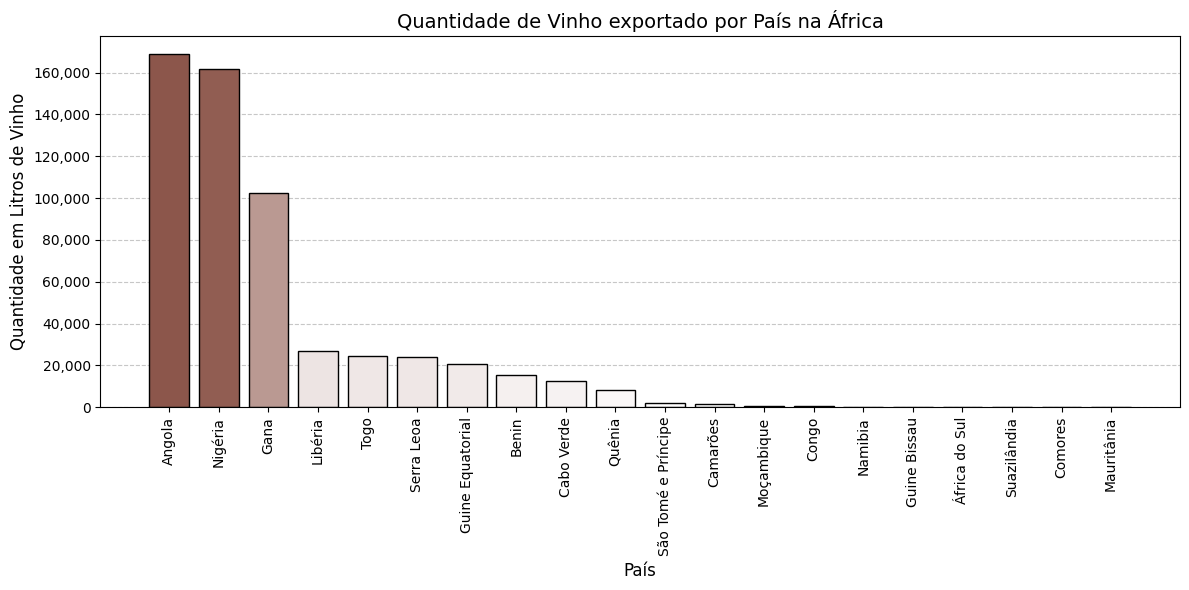

In [71]:
# Ordenar os dados por quantidade em ordem decrescente
fifi_plot = fifi_resumido.sort_values(by='Quantidade', ascending=False)

# Extrair os dados
paises = fifi_plot['Pais_destino']
quantidade = fifi_plot['Quantidade']

# Definir a cor principal
cor_principal = '#8c564b'

# Calcular o máximo e o mínimo da quantidade para normalização
max_quantidade = quantidade.max()
min_quantidade = quantidade.min()

# Normalizar a quantidade entre 0 e 1
normalized_quantidade = (quantidade - min_quantidade) / (max_quantidade - min_quantidade)

# Criar um mapa de cores linear com base na cor principal (invertendo a ordem das cores)
cmap = LinearSegmentedColormap.from_list("custom", ['white', cor_principal])

# Criar o gráfico de barras com o gradiente de cores
plt.figure(figsize=(12, 6))
bars = plt.bar(paises, quantidade, color=cmap(normalized_quantidade), edgecolor='black', zorder=2)

# Adicionar título e rótulos aos eixos
plt.title('Quantidade de Vinho exportado por País na África', fontsize=14)
plt.xlabel('País', fontsize=12)
plt.ylabel('Quantidade em Litros de Vinho', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# Formatar os rótulos do eixo y
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Exibir o grid atrás das barras
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)

# Exibir o gráfico
plt.tight_layout()
plt.show()


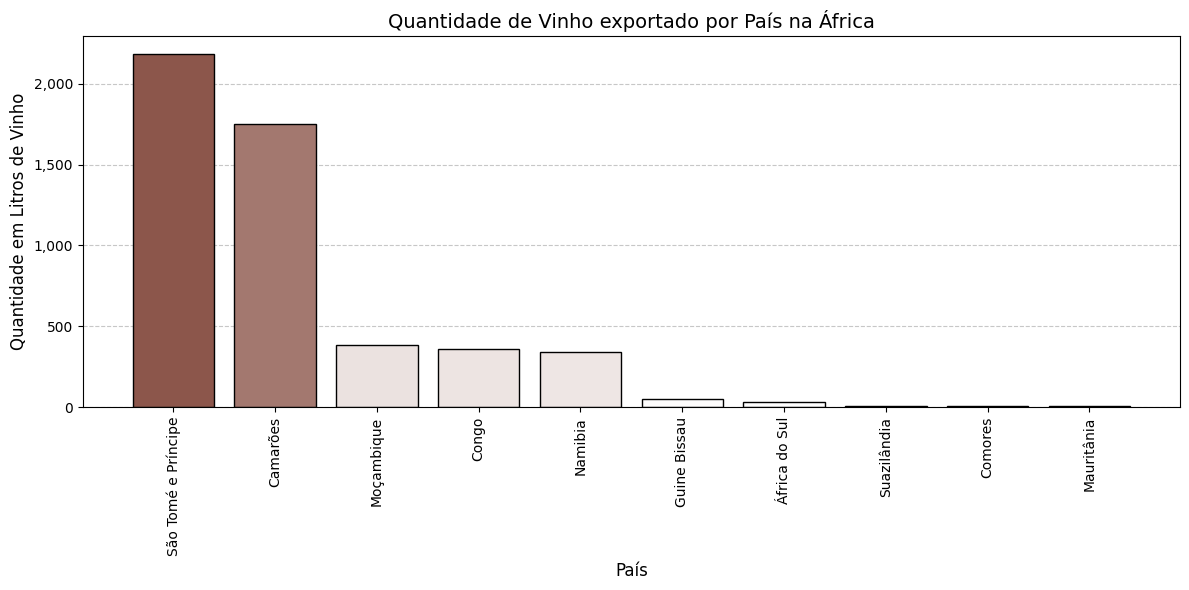

In [72]:
# Selecionar os 17 últimos países
ultimos_paises = fifi_plot.tail(10)

# Extrair os dados
paises = ultimos_paises['Pais_destino']
quantidade = ultimos_paises['Quantidade']

# Definir a cor principal
cor_principal = '#8c564b'

# Calcular o máximo e o mínimo da quantidade para normalização
max_quantidade = quantidade.max()
min_quantidade = quantidade.min()

# Normalizar a quantidade entre 0 e 1
normalized_quantidade = (quantidade - min_quantidade) / (max_quantidade - min_quantidade)

# Criar um mapa de cores linear com base na cor principal (invertendo a ordem das cores)
cmap = LinearSegmentedColormap.from_list("custom", ['white', cor_principal])

# Criar o gráfico de barras com o gradiente de cores
plt.figure(figsize=(12, 6))
bars = plt.bar(paises, quantidade, color=cmap(normalized_quantidade), edgecolor='black', zorder=2)

# Adicionar título e rótulos aos eixos
plt.title('Quantidade de Vinho exportado por País na África', fontsize=14)
plt.xlabel('País', fontsize=12)
plt.ylabel('Quantidade em Litros de Vinho', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# Formatar os rótulos do eixo y
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Exibir o grid atrás das barras
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)

# Exibir o gráfico
plt.tight_layout()
plt.show()


In [73]:
# Selecionar apenas os dados dos Estados Unidos, Haiti, Angola, Nigéria e Gana
AngoNiNa = fifi[(fifi['País'] == 'Angola') | (fifi['País'] == 'Nigéria') | (fifi['País'] == 'Gana')]

# Cores para cada país
cores = {'Estados Unidos': '#1f77b4', 'Haiti': '#ff7f0e', 'Angola': '#2ca02c', 'Nigéria': '#d62728', 'Gana': '#9467bd'}

# Plotar gráfico de linhas para os países selecionados
fig, ax = plt.subplots(figsize=(10, 6))
for index, row in AngoNiNa.iterrows():
    # Obter os anos e exportações
    anos = [coluna.split('_')[1] for coluna in AngoNiNa.columns if coluna.startswith('Exportacao_')]
    exportacao = [row[f'Exportacao_{ano}'] for ano in anos]
    
    # Plotar linha para o país com cor específica
    ax.plot(anos, exportacao, marker='o', label=row['País'], color=cores[row['País']], linewidth=2)

# Adicionar título e rótulos dos eixos
ax.set_title('Quantidade de Vinho exportado ao longo dos anos', fontsize=14)
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Quantidade em Litros de Vinho', fontsize=12)

# Adicionar legenda e grade
ax.legend()
ax.grid(True)

# Formatar os rótulos do eixo y
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Exibir o gráfico
plt.tight_layout()
plt.show()


C:\Users\Guilherme\AppData\Local\Temp\ipykernel_7228\2835374617.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_paises['Total_Exportacao'] = df_paises.filter(like='Exportacao_').sum(axis=1)


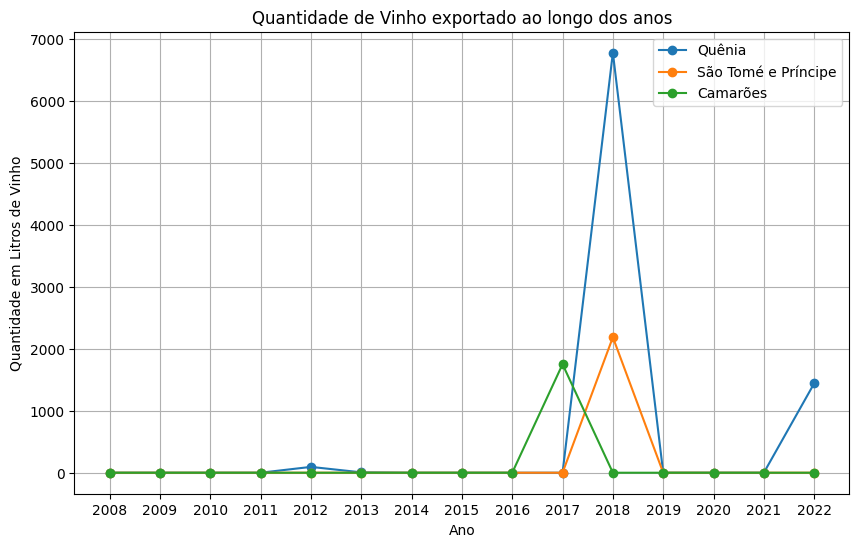

In [74]:
# Excluir Rússia e Espanha do dataframe
df_paises = fifi[(fifi['País'] != 'Angola') & (fifi['País'] != 'Gana') & (fifi['País'] != 'Nigéria')]

# Calcular a exportação total de cada país e ordenar em ordem decrescente
df_paises['Total_Exportacao'] = df_paises.filter(like='Exportacao_').sum(axis=1)
df_paises = df_paises.sort_values(by='Total_Exportacao', ascending=False)

# Dividir os países em grupos de 3
grupos_paises = [df_paises[i:i+3] for i in range(0, len(df_paises), 3)]

# Plotar gráficos de linhas para cada grupo de países
for i, grupo in enumerate(grupos_paises):
    fig, ax = plt.subplots(figsize=(10, 6))
    for index, row in grupo.iterrows():
        # Obter os anos e exportações
        anos = [coluna.split('_')[1] for coluna in grupo.columns if coluna.startswith('Exportacao_')]
        exportacao = [row[f'Exportacao_{ano}'] for ano in anos]
        
        # Plotar linha para o país
        ax.plot(anos, exportacao, marker='o', label=row['País'])
    
    # Adicionar título e rótulos dos eixos
    ax.set_title(f'Quantidade de Vinho exportado ao longo dos anos')
    ax.set_xlabel('Ano')
    ax.set_ylabel('Quantidade em Litros de Vinho')
    
    # Adicionar legenda e grade
    ax.legend()
    ax.grid(True)
    
    # Exibir o gráfico
    plt.show()



In [75]:
oceano_resumido = exportacao_vinhos_resumido[(exportacao_vinhos_resumido['Continente'] == 'Oceania')]
oceano_resumido

Pais_destino  Quantidade   Valor Continente
9                 Austrália      274654  469248    Oceania
31   Cocos (Keeling), Ilhas          26      60    Oceania
83          Marshall, Ilhas       30353   87600    Oceania
92           Nova Caledônia        7227   11924    Oceania
93            Nova Zelândia       14030   75209    Oceania
123                  Tuvalu           2       4    Oceania
125                 Vanuatu          18      31    Oceania

In [76]:
oceano = exportacao_vinhos[(exportacao_vinhos['Continente'] == 'Oceania')]
oceano

País  Exportacao_2008  Valor_2008  Exportacao_2009  \
9                 Austrália           218726       99280             1014   
31   Cocos (Keeling), Ilhas                0           0                0   
83          Marshall, Ilhas                0           0                0   
92           Nova Caledônia                0           0                0   
93            Nova Zelândia                0           0                0   
123                  Tuvalu                0           0                0   
125                 Vanuatu                0           0                0   

     Valor_2009  Exportacao_2010  Valor_2010  Exportacao_2011  Valor_2011  \
9          9195             1823       17960             3632       40704   
31            0                0           0                0           0   
83            0                0           0                0           0   
92            0                0           0                0           0   
93            0                0           0             2587        7992   
123           0                0           0                0           0   
125           0                0           0                0           0   

     Exportacao_2012  ...  Valor_2018  Exportacao_2019  Valor_2019  \
9               9345  ...        6902             1161        4682   
31                 0  ...           0                0           0   
83                 0  ...        2436             7276       15786   
92                 0  ...           0                0           0   
93              2364  ...        5565              500        2832   
123                0  ...           0                0           0   
125                0  ...           0                0           0   

     Exportacao_2020  Valor_2020  Exportacao_2021  Valor_2021  \
9               1013        3413              705        4034   
31                 0           0                0           0   
83              6270       19639             8644       22561   
92                 0           0             7227       11924   
93                95         515              657       10477   
123                2           4                0           0   
125               18          31                0           0   

     Exportacao_2022  Valor_2022  Continente  
9               1424       12299     Oceania  
31                26          60     Oceania  
83              7240       27178     Oceania  
92                 0           0     Oceania  
93                63         156     Oceania  
123                0           0     Oceania  
125                0           0     Oceania  

[7 rows x 32 columns]

In [77]:
# Ordenar os dados por quantidade em ordem decrescente
oceano_plot = oceano_resumido.sort_values(by='Quantidade', ascending=False)

# Extrair os dados
paises = oceano_plot['Pais_destino']
quantidade = oceano_plot['Quantidade']

# Definir a cor principal
cor_principal = '#9467bd'

# Calcular o máximo e o mínimo da quantidade para normalização
max_quantidade = quantidade.max()
min_quantidade = quantidade.min()

# Normalizar a quantidade entre 0 e 1
normalized_quantidade = (quantidade - min_quantidade) / (max_quantidade - min_quantidade)

# Criar um mapa de cores linear com base na cor principal (invertendo a ordem das cores)
cmap = LinearSegmentedColormap.from_list("custom", ['white', cor_principal])

# Criar o gráfico de barras com o gradiente de cores
plt.figure(figsize=(12, 6))
bars = plt.bar(paises, quantidade, color=cmap(normalized_quantidade), edgecolor='black', zorder=2)

# Adicionar título e rótulos aos eixos
plt.title('Quantidade de Vinho exportado por País na Oceania', fontsize=14)
plt.xlabel('País', fontsize=12)
plt.ylabel('Quantidade em Litros de Vinho', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# Formatar os rótulos do eixo y
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Exibir o grid atrás das barras
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)

# Exibir o gráfico
plt.tight_layout()
plt.show()


In [78]:
# Selecionar apenas os dados da Austrália
australia_data = oceano[oceano['País'] == 'Austrália']

# Obter os anos
anos = [coluna.split('_')[1] for coluna in australia_data.columns if coluna.startswith('Exportacao_')]

# Obter os valores de exportação para a Austrália
exportacao_australia = [australia_data[f'Exportacao_{ano}'].values[0] for ano in anos]

# Criar o gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(anos, exportacao_australia, marker='o', color='blue', linestyle='-')

# Adicionar rótulos e título
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Quantidade em Litros de Vinho', fontsize=12)
plt.title('Quantidade de Vinho Exportado para Austrália ao Longo dos Anos', fontsize=14)
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Exibir o grid e rotacionar os rótulos do eixo x
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Ajustar o layout para evitar cortar os rótulos
plt.tight_layout()

# Exibir o gráfico
plt.show()


C:\Users\Guilherme\AppData\Local\Temp\ipykernel_7228\3265012828.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_paises['Total_Exportacao'] = df_paises.filter(like='Exportacao_').sum(axis=1)


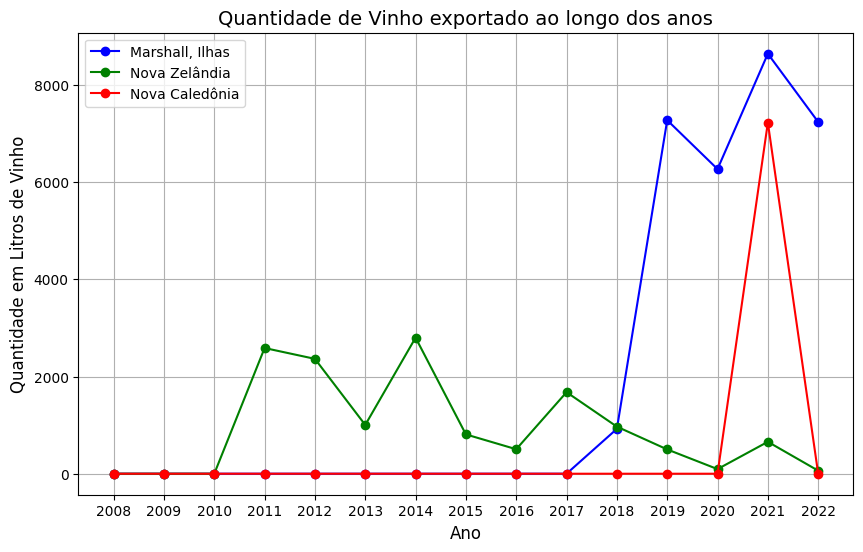

In [79]:
# Excluir Austrália do dataframe
df_paises = oceano[(oceano['País'] != 'Austrália')]

# Calcular a exportação total de cada país e ordenar em ordem decrescente
df_paises['Total_Exportacao'] = df_paises.filter(like='Exportacao_').sum(axis=1)
df_paises = df_paises.sort_values(by='Total_Exportacao', ascending=False)

# Dividir os países em grupos de 3
grupos_paises = [df_paises[i:i+3] for i in range(0, len(df_paises), 3)]

# Cores para os países
cores = ['blue', 'green', 'red']

# Plotar gráficos de linhas para cada grupo de países
for i, grupo in enumerate(grupos_paises):
    fig, ax = plt.subplots(figsize=(10, 6))
    for j, (index, row) in enumerate(grupo.iterrows()):
        # Obter os anos e exportações
        anos = [coluna.split('_')[1] for coluna in grupo.columns if coluna.startswith('Exportacao_')]
        exportacao = [row[f'Exportacao_{ano}'] for ano in anos]
        
        # Plotar linha para o país
        ax.plot(anos, exportacao, marker='o', label=row['País'], color=cores[j])
    
    # Adicionar título e rótulos dos eixos
    ax.set_title(f'Quantidade de Vinho exportado ao longo dos anos', fontsize=14)
    ax.set_xlabel('Ano', fontsize=12)
    ax.set_ylabel('Quantidade em Litros de Vinho', fontsize=12)
    
    # Adicionar legenda e grade
    ax.legend()
    ax.grid(True)
    
    # Exibir o gráfico
    plt.show()


In [80]:
amece_resumido = exportacao_vinhos_resumido[(exportacao_vinhos_resumido['Continente'] == 'América Central')]
amece_resumido

Pais_destino  Quantidade   Valor       Continente
16       Belice           9      29  América Central
37   Costa Rica          55     200  América Central
43  El Salvador          55     100  América Central
57    Guatemala       20247   43189  América Central
63     Honduras         176     610  América Central
89    Nicaragua          24      24  América Central
96       Panamá       62156  162516  América Central

In [81]:
amece = exportacao_vinhos[(exportacao_vinhos['Continente'] == 'América Central')]
amece

País  Exportacao_2008  Valor_2008  Exportacao_2009  Valor_2009  \
16       Belice                0           0                0           0   
37   Costa Rica               55         200                0           0   
43  El Salvador                0           0               55         100   
57    Guatemala                0           0               20          20   
63     Honduras              162         580               14          30   
89    Nicaragua                0           0               24          24   
96       Panamá             1161        1882               24          30   

    Exportacao_2010  Valor_2010  Exportacao_2011  Valor_2011  Exportacao_2012  \
16                0           0                0           0                0   
37                0           0                0           0                0   
43                0           0                0           0                0   
57                0           0                0           0                0   
63                0           0                0           0                0   
89                0           0                0           0                0   
96                0           0                0           0               39   

    ...  Valor_2018  Exportacao_2019  Valor_2019  Exportacao_2020  Valor_2020  \
16  ...           0                9          29                0           0   
37  ...           0                0           0                0           0   
43  ...           0                0           0                0           0   
57  ...           0             1597        8719                0           0   
63  ...           0                0           0                0           0   
89  ...           0                0           0                0           0   
96  ...        3117             7918       29017            10821       28372   

    Exportacao_2021  Valor_2021  Exportacao_2022  Valor_2022       Continente  
16                0           0                0           0  América Central  
37                0           0                0           0  América Central  
43                0           0                0           0  América Central  
57            17347       29100             1283        5350  América Central  
63                0           0                0           0  América Central  
89                0           0                0           0  América Central  
96            29520       48444            11490       49392  América Central  

[7 rows x 32 columns]

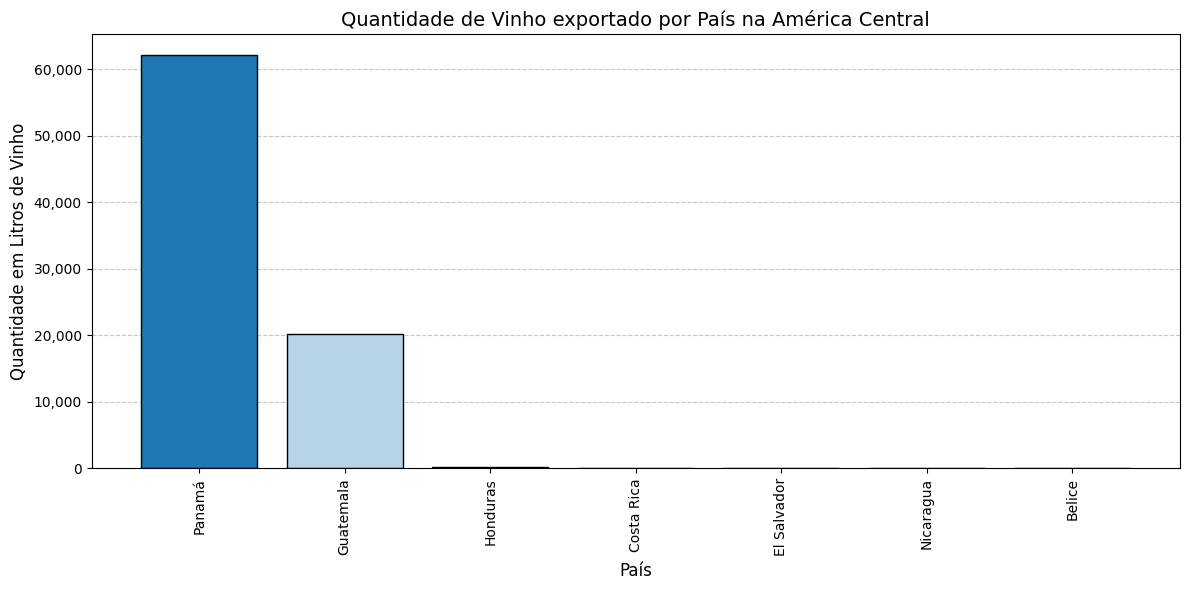

In [82]:
# Ordenar os dados por quantidade em ordem decrescente
amece_plot = amece_resumido.sort_values(by='Quantidade', ascending=False)

# Extrair os dados
paises = amece_plot['Pais_destino']
quantidade = amece_plot['Quantidade']

# Definir a cor principal
cor_principal = '#1f77b4'

# Calcular o máximo e o mínimo da quantidade para normalização
max_quantidade = quantidade.max()
min_quantidade = quantidade.min()

# Normalizar a quantidade entre 0 e 1
normalized_quantidade = (quantidade - min_quantidade) / (max_quantidade - min_quantidade)

# Criar um mapa de cores linear com base na cor principal (invertendo a ordem das cores)
cmap = LinearSegmentedColormap.from_list("custom", ['white', cor_principal])

# Criar o gráfico de barras com o gradiente de cores
plt.figure(figsize=(12, 6))
bars = plt.bar(paises, quantidade, color=cmap(normalized_quantidade), edgecolor='black', zorder=2)

# Adicionar título e rótulos aos eixos
plt.title('Quantidade de Vinho exportado por País na América Central', fontsize=14)
plt.xlabel('País', fontsize=12)
plt.ylabel('Quantidade em Litros de Vinho', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# Formatar os rótulos do eixo y
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Exibir o grid atrás das barras
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)

# Exibir o gráfico
plt.tight_layout()
plt.show()


In [83]:
# Selecionar os 17 últimos países
ultimos_paises = amece_plot.tail(5)

# Extrair os dados
paises = ultimos_paises['Pais_destino']
quantidade = ultimos_paises['Quantidade']

# Definir a cor principal
cor_principal = '#1f77b4'

# Calcular o máximo e o mínimo da quantidade para normalização
max_quantidade = quantidade.max()
min_quantidade = quantidade.min()

# Normalizar a quantidade entre 0 e 1
normalized_quantidade = (quantidade - min_quantidade) / (max_quantidade - min_quantidade)

# Criar um mapa de cores linear com base na cor principal (invertendo a ordem das cores)
cmap = LinearSegmentedColormap.from_list("custom", ['white', cor_principal])

# Criar o gráfico de barras com o gradiente de cores
plt.figure(figsize=(12, 6))
bars = plt.bar(paises, quantidade, color=cmap(normalized_quantidade), edgecolor='black', zorder=2)

# Adicionar título e rótulos aos eixos
plt.title('Quantidade de Vinho exportado por País na América Central', fontsize=14)
plt.xlabel('País', fontsize=12)
plt.ylabel('Quantidade em Litros de Vinho', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# Formatar os rótulos do eixo y
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Exibir o grid atrás das barras
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)

# Exibir o gráfico
plt.tight_layout()
plt.show()

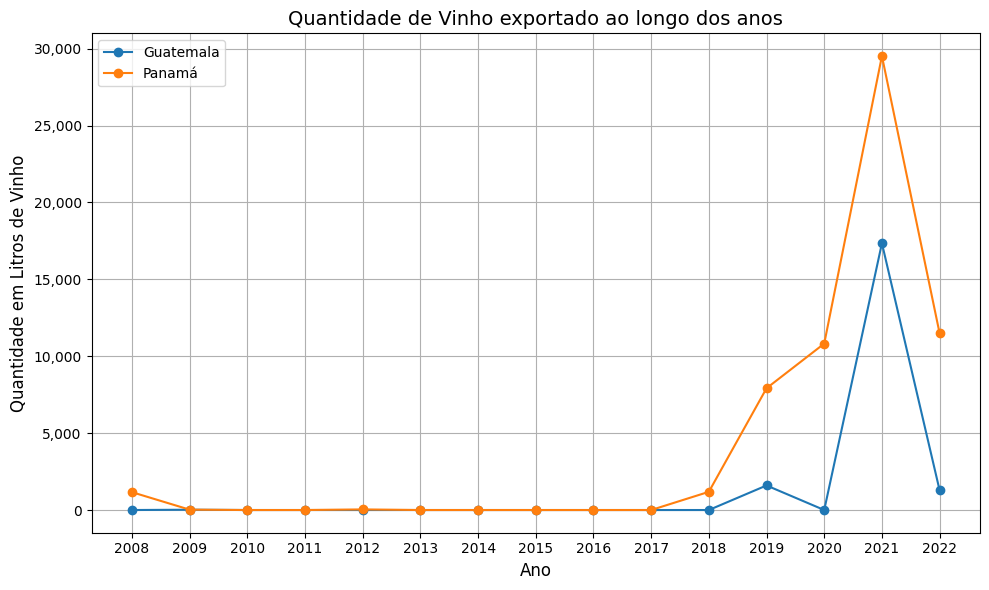

In [84]:
# Selecionar apenas os dados do Panamá e Guatemala
hoco_data = amece[(amece['País'] == 'Panamá') | (amece['País'] == 'Guatemala')]

# Plotar gráfico de linhas para o Panamá e Guatemala
fig, ax = plt.subplots(figsize=(10, 6))
for index, row in hoco_data.iterrows():
    # Obter os anos e exportações
    anos = [coluna.split('_')[1] for coluna in hoco_data.columns if coluna.startswith('Exportacao_')]
    exportacao = [row[f'Exportacao_{ano}'] for ano in anos]
    
    # Plotar linha para o país
    ax.plot(anos, exportacao, marker='o', label=row['País'])

# Adicionar título e rótulos dos eixos
ax.set_title('Quantidade de Vinho exportado ao longo dos anos', fontsize=14)
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Quantidade em Litros de Vinho', fontsize=12)

# Adicionar legenda e grade
ax.legend()
ax.grid(True)

# Formatando os rótulos do eixo y
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Exibir o gráfico
plt.tight_layout()
plt.show()


C:\Users\Guilherme\AppData\Local\Temp\ipykernel_7228\624109864.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_paises['Total_Exportacao'] = df_paises.filter(like='Exportacao_').sum(axis=1)


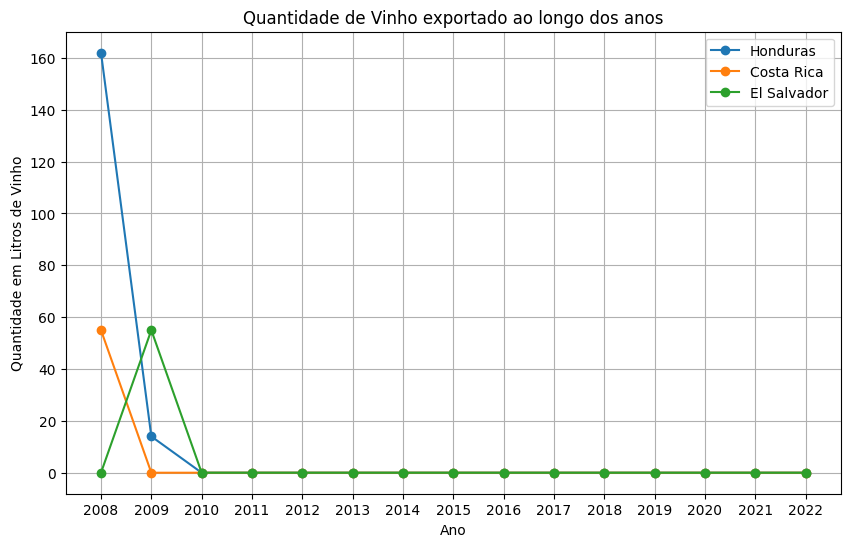

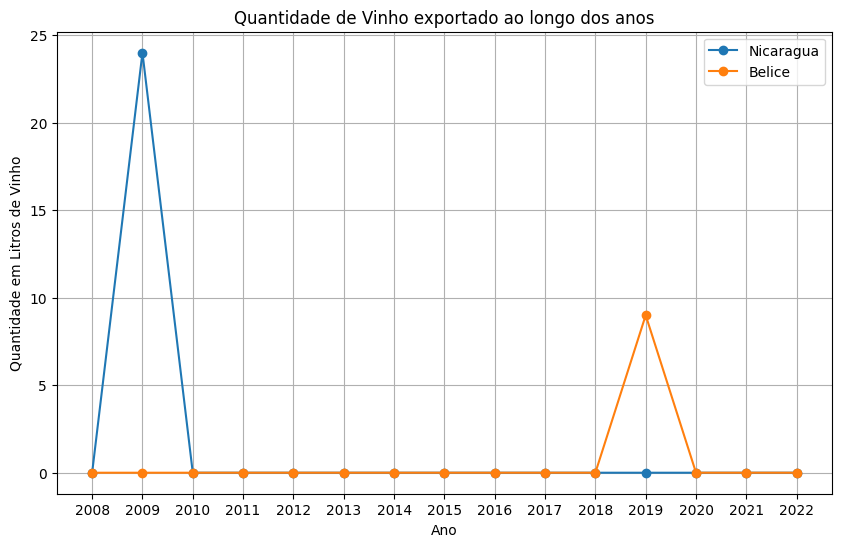

In [85]:
# Excluir Rússia e Espanha do dataframe
df_paises = amece[(amece['País'] != 'Guatemala') & (amece['País'] != 'Panamá')]

# Calcular a exportação total de cada país e ordenar em ordem decrescente
df_paises['Total_Exportacao'] = df_paises.filter(like='Exportacao_').sum(axis=1)
df_paises = df_paises.sort_values(by='Total_Exportacao', ascending=False)

# Dividir os países em grupos de 5
grupos_paises = [df_paises[i:i+3] for i in range(0, len(df_paises), 3)]

# Plotar gráficos de linhas para cada grupo de países
for i, grupo in enumerate(grupos_paises):
    fig, ax = plt.subplots(figsize=(10, 6))
    for index, row in grupo.iterrows():
        # Obter os anos e exportações
        anos = [coluna.split('_')[1] for coluna in grupo.columns if coluna.startswith('Exportacao_')]
        exportacao = [row[f'Exportacao_{ano}'] for ano in anos]
        
        # Plotar linha para o país
        ax.plot(anos, exportacao, marker='o', label=row['País'])
    
    # Adicionar título e rótulos dos eixos
    ax.set_title(f'Quantidade de Vinho exportado ao longo dos anos')
    ax.set_xlabel('Ano')
    ax.set_ylabel('Quantidade em Litros de Vinho')
    
    # Adicionar legenda e grade
    ax.legend()
    ax.grid(True)
    
    # Exibir o gráfico
    plt.show()

variável angular do total do banco de dados e analisar com casos específicos dos países OU comportamento dos próprios continentes<br>

In [86]:
exportacao_vinhos.head()

País  Exportacao_2008  Valor_2008  \
0                      Afeganistão                0           0   
1                    África do Sul                0           0   
2  Alemanha, República Democrática           265742      429970   
3                           Angola            25721       71083   
5                Antígua e Barbuda                0           0   

   Exportacao_2009  Valor_2009  Exportacao_2010  Valor_2010  Exportacao_2011  \
0                0           0                0           0                0   
1                0           0                0           0                0   
2           225086      393482            27715      138666            36070   
3            54786       84235            33557      189891            13889   
5                0           0                0           0                0   

   Valor_2011  Exportacao_2012  ...  Valor_2018  Exportacao_2019  Valor_2019  \
0           0                0  ...           0                0           0   
1           0                0  ...           0               26          95   
2      144150             8189  ...       45382             3660       25467   
3       69001             2833  ...         709              345        1065   
5           0                0  ...         191              219        1549   

   Exportacao_2020  Valor_2020  Exportacao_2021  Valor_2021  Exportacao_2022  \
0                0           0               11          46                0   
1                4          21                0           0                0   
2             6261       32605             2698        6741             7630   
3                0           0                0           0             4068   
5              624        1864              805        2268              419   

   Valor_2022        Continente  
0           0              Ásia  
1           0            África  
2       45367            Europa  
3        4761            África  
5        1866  América do Norte  

[5 rows x 32 columns]

In [87]:
exportacao_2008 = exportacao_vinhos[['País', 'Exportacao_2008']]
exportacao_2008.sort_values(by='Exportacao_2008', ascending=False,inplace=True)
exportacao_2008


C:\Users\Guilherme\AppData\Local\Temp\ipykernel_7228\1518331379.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exportacao_2008.sort_values(by='Exportacao_2008', ascending=False,inplace=True)


País  Exportacao_2008
105                           Rússia          6207658
97                          Paraguai          2191901
48                    Estados Unidos           443895
95                     Países Baixos           340412
2    Alemanha, República Democrática           265742
..                               ...              ...
45                           Equador                0
43                       El Salvador                0
42                          Dominica                0
40                           Curaçao                0
127                           Vietnã                0

[116 rows x 2 columns]

In [88]:
exportacao_2008['Exportacao_2008'].sum()

10346323

In [89]:
# Selecionar os cinco primeiros países
dez_primeiros = exportacao_2008.head(7)

# Somar os valores da coluna 'Exportacao_2008' dos cinco primeiros países
soma_dez_primeiros = dez_primeiros['Exportacao_2008'].sum()
soma_dez_primeiros

9900627

In [90]:
soma_dez_primeiros/exportacao_2008['Exportacao_2008'].sum()

0.9569222805048712

In [91]:
top_paises = dez_primeiros['País'].tolist()

In [92]:
exportacao_2009 = exportacao_vinhos[['País', 'Exportacao_2009']]
exportacao_2009.sort_values(by='Exportacao_2009', ascending=False,inplace=True)
exportacao_2009

C:\Users\Guilherme\AppData\Local\Temp\ipykernel_7228\2006817877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exportacao_2009.sort_values(by='Exportacao_2009', ascending=False,inplace=True)


País  Exportacao_2009
105                           Rússia         21912914
28                             China          1553416
97                          Paraguai           486927
48                    Estados Unidos           372319
2    Alemanha, República Democrática           225086
..                               ...              ...
23                          Camarões                0
25                             Catar                0
1                      África do Sul                0
60                      Guine Bissau                0
0                        Afeganistão                0

[116 rows x 2 columns]

In [93]:
exportacao_2009['Exportacao_2009'].sum()

25514198

In [94]:
# Selecionar os cinco primeiros países
dez_primeiros = exportacao_2009.head(4)

# Somar os valores da coluna 'Exportacao_2008' dos cinco primeiros países
soma_dez_primeiros = dez_primeiros['Exportacao_2009'].sum()
soma_dez_primeiros

24325576

In [95]:
soma_dez_primeiros/exportacao_2009['Exportacao_2009'].sum()

0.9534133112865237

In [96]:
top_paises.extend(dez_primeiros['País'].tolist())
top_paises

['Rússia',
 'Paraguai',
 'Estados Unidos',
 'Países Baixos',
 'Alemanha, República Democrática',
 'Japão',
 'Austrália',
 'Rússia',
 'China',
 'Paraguai',
 'Estados Unidos']

In [97]:
exportacao_2010 = exportacao_vinhos[['País', 'Exportacao_2010']]
exportacao_2010.sort_values(by='Exportacao_2010', ascending=False,inplace=True)
exportacao_2010

C:\Users\Guilherme\AppData\Local\Temp\ipykernel_7228\2171560484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exportacao_2010.sort_values(by='Exportacao_2010', ascending=False,inplace=True)


País  Exportacao_2010
97          Paraguai           510989
48    Estados Unidos           228968
103      Reino Unido           123624
75             Japão           112178
95     Países Baixos            87368
..               ...              ...
1      África do Sul                0
60      Guine Bissau                0
59   Guiana Francesa                0
26     Cayman, Ilhas                0
0        Afeganistão                0

[116 rows x 2 columns]

In [98]:
exportacao_2010['Exportacao_2010'].sum()

1280574

In [99]:
# Selecionar os cinco primeiros países
dez_primeiros = exportacao_2010.head(12)

# Somar os valores da coluna 'Exportacao_2008' dos cinco primeiros países
soma_dez_primeiros = dez_primeiros['Exportacao_2010'].sum()
soma_dez_primeiros

1225044

In [100]:
soma_dez_primeiros/exportacao_2010['Exportacao_2010'].sum()

0.9566366332597726

In [101]:
top_paises.extend(dez_primeiros['País'].tolist())

In [102]:
exportacao_2011 = exportacao_vinhos[['País', 'Exportacao_2011']]
exportacao_2011.sort_values(by='Exportacao_2011', ascending=False,inplace=True)
exportacao_2011

C:\Users\Guilherme\AppData\Local\Temp\ipykernel_7228\1908526467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exportacao_2011.sort_values(by='Exportacao_2011', ascending=False,inplace=True)


País  Exportacao_2011
48        Estados Unidos           306787
97              Paraguai           240168
95         Países Baixos           125414
103          Reino Unido           122629
75                 Japão           100835
..                   ...              ...
52                França                0
50             Filipinas                0
46   Eslovaca, Republica                0
45               Equador                0
127               Vietnã                0

[116 rows x 2 columns]

In [103]:
exportacao_2011['Exportacao_2011'].sum()

1214834

In [104]:
# Selecionar os cinco primeiros países
dez_primeiros = exportacao_2011.head(18)

# Somar os valores da coluna 'Exportacao_2008' dos cinco primeiros países
soma_dez_primeiros = dez_primeiros['Exportacao_2011'].sum()
soma_dez_primeiros

1155431

In [105]:
soma_dez_primeiros/exportacao_2011['Exportacao_2011'].sum()

0.9511019612556119

In [106]:
top_paises.extend(dez_primeiros['País'].tolist())

In [107]:
exportacao_2012 = exportacao_vinhos[['País', 'Exportacao_2012']]
exportacao_2012.sort_values(by='Exportacao_2012', ascending=False,inplace=True)
exportacao_2012

C:\Users\Guilherme\AppData\Local\Temp\ipykernel_7228\1343010240.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exportacao_2012.sort_values(by='Exportacao_2012', ascending=False,inplace=True)


País  Exportacao_2012
105               Rússia          4528176
97              Paraguai           354824
52                França           195604
48        Estados Unidos           146585
95         Países Baixos           134879
..                   ...              ...
46   Eslovaca, Republica                0
45               Equador                0
43           El Salvador                0
42              Dominica                0
127               Vietnã                0

[116 rows x 2 columns]

In [108]:
# Selecionar os cinco primeiros países
dez_primeiros = exportacao_2012.head(7)

# Somar os valores da coluna 'Exportacao_2008' dos cinco primeiros países
soma_dez_primeiros = dez_primeiros['Exportacao_2012'].sum()
soma_dez_primeiros

5530910

In [109]:
soma_dez_primeiros/exportacao_2012['Exportacao_2012'].sum()

0.9576709810755178

In [110]:
top_paises.extend(dez_primeiros['País'].tolist())

In [111]:
exportacao_2013 = exportacao_vinhos[['País', 'Exportacao_2013']]
exportacao_2013.sort_values(by='Exportacao_2013', ascending=False,inplace=True)
exportacao_2013

C:\Users\Guilherme\AppData\Local\Temp\ipykernel_7228\190426229.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exportacao_2013.sort_values(by='Exportacao_2013', ascending=False,inplace=True)


País  Exportacao_2013
105                  Rússia          5893291
47                  Espanha          1972980
97                 Paraguai           481564
48           Estados Unidos           245368
75                    Japão            91988
..                      ...              ...
45                  Equador                0
44   Emirados Arabes Unidos                0
43              El Salvador                0
42                 Dominica                0
127                  Vietnã                0

[116 rows x 2 columns]

In [112]:
# Selecionar os cinco primeiros países
dez_primeiros = exportacao_2013.head(5)

# Somar os valores da coluna 'Exportacao_2008' dos cinco primeiros países
soma_dez_primeiros = dez_primeiros['Exportacao_2013'].sum()
soma_dez_primeiros

8685191

In [113]:
soma_dez_primeiros/exportacao_2013['Exportacao_2013'].sum()

0.9492988295299003

In [114]:
top_paises.extend(dez_primeiros['País'].tolist())

In [115]:
exportacao_2014 = exportacao_vinhos[['País', 'Exportacao_2014']]
exportacao_2014.sort_values(by='Exportacao_2014', ascending=False,inplace=True)
exportacao_2014

C:\Users\Guilherme\AppData\Local\Temp\ipykernel_7228\760510575.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exportacao_2014.sort_values(by='Exportacao_2014', ascending=False,inplace=True)


País  Exportacao_2014
97                          Paraguai           521847
103                      Reino Unido           305807
48                    Estados Unidos           222267
2    Alemanha, República Democrática           213348
105                           Rússia           190656
..                               ...              ...
47                           Espanha                0
46               Eslovaca, Republica                0
45                           Equador                0
43                       El Salvador                0
127                           Vietnã                0

[116 rows x 2 columns]

In [116]:
# Selecionar os cinco primeiros países
dez_primeiros = exportacao_2014.head(17)

# Somar os valores da coluna 'Exportacao_2008' dos cinco primeiros países
soma_dez_primeiros = dez_primeiros['Exportacao_2014'].sum()
soma_dez_primeiros

2216885

In [117]:
soma_dez_primeiros/exportacao_2014['Exportacao_2014'].sum()

0.953897305068052

In [118]:
top_paises.extend(dez_primeiros['País'].tolist())

In [119]:
exportacao_2015 = exportacao_vinhos[['País', 'Exportacao_2015']]
exportacao_2015.sort_values(by='Exportacao_2015', ascending=False,inplace=True)
exportacao_2015

C:\Users\Guilherme\AppData\Local\Temp\ipykernel_7228\3997798956.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exportacao_2015.sort_values(by='Exportacao_2015', ascending=False,inplace=True)


País  Exportacao_2015
97              Paraguai           495428
48        Estados Unidos           195896
39                  Cuba            97965
103          Reino Unido            68382
101             Portugal            47736
..                   ...              ...
46   Eslovaca, Republica                0
45               Equador                0
43           El Salvador                0
42              Dominica                0
127               Vietnã                0

[116 rows x 2 columns]

In [120]:
# Selecionar os cinco primeiros países
dez_primeiros = exportacao_2015.head(13)

# Somar os valores da coluna 'Exportacao_2008' dos cinco primeiros países
soma_dez_primeiros = dez_primeiros['Exportacao_2015'].sum()
soma_dez_primeiros

1140017

In [121]:
soma_dez_primeiros/exportacao_2015['Exportacao_2015'].sum()

0.9512198378110922

In [122]:
top_paises.extend(dez_primeiros['País'].tolist())

In [123]:
exportacao_2016 = exportacao_vinhos[['País', 'Exportacao_2016']]
exportacao_2016.sort_values(by='Exportacao_2016', ascending=False,inplace=True)
exportacao_2016

C:\Users\Guilherme\AppData\Local\Temp\ipykernel_7228\2203151069.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exportacao_2016.sort_values(by='Exportacao_2016', ascending=False,inplace=True)


País  Exportacao_2016
97              Paraguai           985739
48        Estados Unidos           258072
28                 China           134106
103          Reino Unido           117044
39                  Cuba            63741
..                   ...              ...
47               Espanha                0
46   Eslovaca, Republica                0
45               Equador                0
43           El Salvador                0
127               Vietnã                0

[116 rows x 2 columns]

In [124]:
# Selecionar os cinco primeiros países
dez_primeiros = exportacao_2016.head(11)

# Somar os valores da coluna 'Exportacao_2008' dos cinco primeiros países
soma_dez_primeiros = dez_primeiros['Exportacao_2016'].sum()
soma_dez_primeiros

1697327

In [125]:
soma_dez_primeiros/exportacao_2016['Exportacao_2016'].sum()

0.95005902440963

In [126]:
top_paises.extend(dez_primeiros['País'].tolist())

In [127]:
exportacao_2017 = exportacao_vinhos[['País', 'Exportacao_2017']]
exportacao_2017.sort_values(by='Exportacao_2017', ascending=False,inplace=True)
exportacao_2017

C:\Users\Guilherme\AppData\Local\Temp\ipykernel_7228\2242811932.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exportacao_2017.sort_values(by='Exportacao_2017', ascending=False,inplace=True)


País  Exportacao_2017
97              Paraguai          2393468
48        Estados Unidos           132688
28                 China            67594
39                  Cuba            62791
103          Reino Unido            60711
..                   ...              ...
49               Estônia                0
47               Espanha                0
46   Eslovaca, Republica                0
45               Equador                0
127               Vietnã                0

[116 rows x 2 columns]

In [128]:
# Selecionar os cinco primeiros países
dez_primeiros = exportacao_2017.head(6)

# Somar os valores da coluna 'Exportacao_2008' dos cinco primeiros países
soma_dez_primeiros = dez_primeiros['Exportacao_2017'].sum()
soma_dez_primeiros

2751161

In [129]:
soma_dez_primeiros/exportacao_2017['Exportacao_2017'].sum()

0.9520998265487068

In [130]:
top_paises.extend(dez_primeiros['País'].tolist())

In [131]:
exportacao_2018 = exportacao_vinhos[['País', 'Exportacao_2018']]
exportacao_2018.sort_values(by='Exportacao_2018', ascending=False,inplace=True)
exportacao_2018

C:\Users\Guilherme\AppData\Local\Temp\ipykernel_7228\1784304469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exportacao_2018.sort_values(by='Exportacao_2018', ascending=False,inplace=True)


País  Exportacao_2018
97              Paraguai          3234168
48        Estados Unidos           169109
62                 Haiti            79500
103          Reino Unido            67708
75                 Japão            36992
..                   ...              ...
54             Gibraltar                0
51             Finlândia                0
49               Estônia                0
46   Eslovaca, Republica                0
127               Vietnã                0

[116 rows x 2 columns]

In [132]:
# Selecionar os cinco primeiros países
dez_primeiros = exportacao_2018.head(8)

# Somar os valores da coluna 'Exportacao_2008' dos cinco primeiros países
soma_dez_primeiros = dez_primeiros['Exportacao_2018'].sum()
soma_dez_primeiros

3663808

In [133]:
soma_dez_primeiros/exportacao_2018['Exportacao_2018'].sum()

0.9501177595754535

In [134]:
top_paises.extend(dez_primeiros['País'].tolist())

In [135]:
exportacao_2019 = exportacao_vinhos[['País', 'Exportacao_2019']]
exportacao_2019.sort_values(by='Exportacao_2019', ascending=False,inplace=True)
exportacao_2019

C:\Users\Guilherme\AppData\Local\Temp\ipykernel_7228\2368453813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exportacao_2019.sort_values(by='Exportacao_2019', ascending=False,inplace=True)


País  Exportacao_2019
97             Paraguai          2419537
48       Estados Unidos           209765
28                China           129852
62                Haiti            81873
95        Países Baixos            44882
..                  ...              ...
51            Finlândia                0
49              Estônia                0
46  Eslovaca, Republica                0
43          El Salvador                0
61     Guine Equatorial                0

[116 rows x 2 columns]

In [136]:
# Selecionar os cinco primeiros países
dez_primeiros = exportacao_2019.head(9)

# Somar os valores da coluna 'Exportacao_2008' dos cinco primeiros países
soma_dez_primeiros = dez_primeiros['Exportacao_2019'].sum()
soma_dez_primeiros

3023213

In [137]:
soma_dez_primeiros/exportacao_2019['Exportacao_2019'].sum()

0.9588756032989594

In [138]:
top_paises.extend(dez_primeiros['País'].tolist())

In [139]:
exportacao_2020 = exportacao_vinhos[['País', 'Exportacao_2020']]
exportacao_2020.sort_values(by='Exportacao_2020', ascending=False,inplace=True)
exportacao_2020

C:\Users\Guilherme\AppData\Local\Temp\ipykernel_7228\216600432.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exportacao_2020.sort_values(by='Exportacao_2020', ascending=False,inplace=True)


País  Exportacao_2020
97          Paraguai          3299013
62             Haiti           399128
48    Estados Unidos           300178
28             China           122253
40           Curaçao            47962
..               ...              ...
77           Letônia                0
81           Malásia                0
84        Mauritânia                0
86        Moçambique                0
61  Guine Equatorial                0

[116 rows x 2 columns]

In [140]:
# Selecionar os cinco primeiros países
dez_primeiros = exportacao_2020.head(6)

# Somar os valores da coluna 'Exportacao_2008' dos cinco primeiros países
soma_dez_primeiros = dez_primeiros['Exportacao_2020'].sum()
soma_dez_primeiros

4204976

In [141]:
soma_dez_primeiros/exportacao_2020['Exportacao_2020'].sum()

0.953570489897651

In [142]:
top_paises.extend(dez_primeiros['País'].tolist())

In [143]:
exportacao_2021 = exportacao_vinhos[['País', 'Exportacao_2021']]
exportacao_2021.sort_values(by='Exportacao_2021', ascending=False,inplace=True)
exportacao_2021

C:\Users\Guilherme\AppData\Local\Temp\ipykernel_7228\1074985430.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exportacao_2021.sort_values(by='Exportacao_2021', ascending=False,inplace=True)


País  Exportacao_2021
97         Paraguai          6522527
62            Haiti           670379
105          Rússia           181931
124         Uruguai           136774
48   Estados Unidos           111085
..              ...              ...
69        Indonésia                0
76         Jordânia                0
77          Letônia                0
80       Luxemburgo                0
127          Vietnã                0

[116 rows x 2 columns]

In [144]:
# Selecionar os cinco primeiros países
dez_primeiros = exportacao_2021.head(6)

# Somar os valores da coluna 'Exportacao_2008' dos cinco primeiros países
soma_dez_primeiros = dez_primeiros['Exportacao_2021'].sum()
soma_dez_primeiros

7690943

In [145]:
soma_dez_primeiros/exportacao_2021['Exportacao_2021'].sum()

0.9543684177283283

In [146]:
top_paises.extend(dez_primeiros['País'].tolist())

In [147]:
exportacao_2022 = exportacao_vinhos[['País', 'Exportacao_2022']]
exportacao_2022.sort_values(by='Exportacao_2022', ascending=False,inplace=True)
exportacao_2022

C:\Users\Guilherme\AppData\Local\Temp\ipykernel_7228\3707029420.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exportacao_2022.sort_values(by='Exportacao_2022', ascending=False,inplace=True)


País  Exportacao_2022
97           Paraguai          5076670
124           Uruguai           637117
62              Haiti           553503
48     Estados Unidos           220373
28              China           105395
..                ...              ...
77            Letônia                0
81            Malásia                0
84         Mauritânia                0
87         Montenegro                0
61   Guine Equatorial                0

[116 rows x 2 columns]

In [148]:
# Selecionar os cinco primeiros países
dez_primeiros = exportacao_2022.head(7)

# Somar os valores da coluna 'Exportacao_2008' dos cinco primeiros países
soma_dez_primeiros = dez_primeiros['Exportacao_2022'].sum()
soma_dez_primeiros

6699777

In [149]:
soma_dez_primeiros/exportacao_2022['Exportacao_2022'].sum()

0.9539114447412742

In [150]:
top_paises.extend(dez_primeiros['País'].tolist())

In [151]:
top_paises

['Rússia',
 'Paraguai',
 'Estados Unidos',
 'Países Baixos',
 'Alemanha, República Democrática',
 'Japão',
 'Austrália',
 'Rússia',
 'China',
 'Paraguai',
 'Estados Unidos',
 'Paraguai',
 'Estados Unidos',
 'Reino Unido',
 'Japão',
 'Países Baixos',
 'Bélgica',
 'Angola',
 'Alemanha, República Democrática',
 'Polônia',
 'Estônia',
 'Cabo Verde',
 'Antilhas Holandesas',
 'Estados Unidos',
 'Paraguai',
 'Países Baixos',
 'Reino Unido',
 'Japão',
 'China',
 'Alemanha, República Democrática',
 'Dinamarca',
 'Canadá',
 'Angola',
 'Argentina',
 'Bolívia',
 'Finlândia',
 'Itália',
 'Bélgica',
 'Polônia',
 'Noruega',
 'Luxemburgo',
 'Rússia',
 'Paraguai',
 'França',
 'Estados Unidos',
 'Países Baixos',
 'China',
 'Reino Unido',
 'Rússia',
 'Espanha',
 'Paraguai',
 'Estados Unidos',
 'Japão',
 'Paraguai',
 'Reino Unido',
 'Estados Unidos',
 'Alemanha, República Democrática',
 'Rússia',
 'Países Baixos',
 'Bélgica',
 'Japão',
 'Portugal',
 'China',
 'Cuba',
 'Canadá',
 'França',
 'Polônia',
 'Su

In [152]:
contagem_paises = Counter(top_paises)
contagem_paises

Counter({'Rússia': 8,
         'Paraguai': 15,
         'Estados Unidos': 15,
         'Países Baixos': 8,
         'Alemanha, República Democrática': 6,
         'Japão': 11,
         'Austrália': 1,
         'China': 11,
         'Reino Unido': 9,
         'Bélgica': 3,
         'Angola': 2,
         'Polônia': 4,
         'Estônia': 1,
         'Cabo Verde': 1,
         'Antilhas Holandesas': 2,
         'Dinamarca': 1,
         'Canadá': 4,
         'Argentina': 2,
         'Bolívia': 2,
         'Finlândia': 1,
         'Itália': 1,
         'Noruega': 1,
         'Luxemburgo': 1,
         'França': 2,
         'Espanha': 1,
         'Portugal': 2,
         'Cuba': 4,
         'Suíça': 2,
         'Hong Kong': 1,
         'Taiwan (FORMOSA)': 1,
         'Haiti': 5,
         'Curaçao': 4,
         'Nigéria': 2,
         'Uruguai': 2})

In [153]:
df_contagem = pd.DataFrame(contagem_paises.items(), columns=['País', 'Repetições'])
df_contagem.sort_values(by='Repetições',ascending=False,inplace=True)
df_contagem

País  Repetições
1                          Paraguai          15
2                    Estados Unidos          15
5                             Japão          11
7                             China          11
8                       Reino Unido           9
0                            Rússia           8
3                     Países Baixos           8
4   Alemanha, República Democrática           6
30                            Haiti           5
31                          Curaçao           4
11                          Polônia           4
26                             Cuba           4
16                           Canadá           4
9                           Bélgica           3
32                          Nigéria           2
23                           França           2
27                            Suíça           2
25                         Portugal           2
17                        Argentina           2
18                          Bolívia           2
14              Antilhas Holandesas           2
10                           Angola           2
33                          Uruguai           2
19                        Finlândia           1
20                           Itália           1
21                          Noruega           1
22                       Luxemburgo           1
24                          Espanha           1
15                        Dinamarca           1
13                       Cabo Verde           1
28                        Hong Kong           1
29                 Taiwan (FORMOSA)           1
12                          Estônia           1
6                         Austrália           1

In [154]:
exportacao_vinhos.head()

País  Exportacao_2008  Valor_2008  \
0                      Afeganistão                0           0   
1                    África do Sul                0           0   
2  Alemanha, República Democrática           265742      429970   
3                           Angola            25721       71083   
5                Antígua e Barbuda                0           0   

   Exportacao_2009  Valor_2009  Exportacao_2010  Valor_2010  Exportacao_2011  \
0                0           0                0           0                0   
1                0           0                0           0                0   
2           225086      393482            27715      138666            36070   
3            54786       84235            33557      189891            13889   
5                0           0                0           0                0   

   Valor_2011  Exportacao_2012  ...  Valor_2018  Exportacao_2019  Valor_2019  \
0           0                0  ...           0                0           0   
1           0                0  ...           0               26          95   
2      144150             8189  ...       45382             3660       25467   
3       69001             2833  ...         709              345        1065   
5           0                0  ...         191              219        1549   

   Exportacao_2020  Valor_2020  Exportacao_2021  Valor_2021  Exportacao_2022  \
0                0           0               11          46                0   
1                4          21                0           0                0   
2             6261       32605             2698        6741             7630   
3                0           0                0           0             4068   
5              624        1864              805        2268              419   

   Valor_2022        Continente  
0           0              Ásia  
1           0            África  
2       45367            Europa  
3        4761            África  
5        1866  América do Norte  

[5 rows x 32 columns]

In [155]:
# Selecionar as colunas que contêm "Exportacao" no nome
exportacao_cols = [coluna for coluna in exportacao_vinhos.columns if 'Exportacao' in coluna]

# Incluir a coluna "País" na lista de colunas selecionadas
colunas_selecionadas = ['País'] + exportacao_cols

# Criar o novo DataFrame com as colunas selecionadas
export = exportacao_vinhos[colunas_selecionadas]

export.head()

País  Exportacao_2008  Exportacao_2009  \
0                      Afeganistão                0                0   
1                    África do Sul                0                0   
2  Alemanha, República Democrática           265742           225086   
3                           Angola            25721            54786   
5                Antígua e Barbuda                0                0   

   Exportacao_2010  Exportacao_2011  Exportacao_2012  Exportacao_2013  \
0                0                0                0                0   
1                0                0                0                0   
2            27715            36070             8189            61699   
3            33557            13889             2833             1573   
5                0                0                0                0   

   Exportacao_2014  Exportacao_2015  Exportacao_2016  Exportacao_2017  \
0                0                0                0                0   
1                0                0                0                0   
2           213348            10680            14012            15467   
3            12182             1908             7359            10170   
5                0                0                0                0   

   Exportacao_2018  Exportacao_2019  Exportacao_2020  Exportacao_2021  \
0                0                0                0               11   
1                0               26                4                0   
2            10794             3660             6261             2698   
3              477              345                0                0   
5               37              219              624              805   

   Exportacao_2022  
0                0  
1                0  
2             7630  
3             4068  
5              419

In [156]:
export.T.head()

0              1                                2    \
País             Afeganistão  África do Sul  Alemanha, República Democrática   
Exportacao_2008            0              0                           265742   
Exportacao_2009            0              0                           225086   
Exportacao_2010            0              0                            27715   
Exportacao_2011            0              0                            36070   

                    3                  5                    6          7    \
País             Angola  Antígua e Barbuda  Antilhas Holandesas  Argentina   
Exportacao_2008   25721                  0                17938          0   
Exportacao_2009   54786                  0                 8235        162   
Exportacao_2010   33557                  0                 9810          0   
Exportacao_2011   13889                  0                 7335      13253   

                   8          9        10   ...               116  \
País             Aruba  Austrália  Áustria  ...  Taiwan (FORMOSA)   
Exportacao_2008      0     218726        0  ...             10030   
Exportacao_2009      0       1014        0  ...                 0   
Exportacao_2010      0       1823        0  ...                 0   
Exportacao_2011    900       3632        0  ...              4500   

                               118   119               120      122     123  \
País             Tcheca, República  Togo  Trinidade Tobago  Turquia  Tuvalu   
Exportacao_2008              17135  5160                 0        0       0   
Exportacao_2009               9269     0                 0        0       0   
Exportacao_2010               1091     0                 0        0       0   
Exportacao_2011               6846     0                 0        0       0   

                     124      125        126     127  
País             Uruguai  Vanuatu  Venezuela  Vietnã  
Exportacao_2008        0        0          0       0  
Exportacao_2009        0        0          0     743  
Exportacao_2010      914        0          0    8820  
Exportacao_2011     1238        0          0       0  

[5 rows x 116 columns]

In [157]:
exporT = export.T
exporT.head()

0              1                                2    \
País             Afeganistão  África do Sul  Alemanha, República Democrática   
Exportacao_2008            0              0                           265742   
Exportacao_2009            0              0                           225086   
Exportacao_2010            0              0                            27715   
Exportacao_2011            0              0                            36070   

                    3                  5                    6          7    \
País             Angola  Antígua e Barbuda  Antilhas Holandesas  Argentina   
Exportacao_2008   25721                  0                17938          0   
Exportacao_2009   54786                  0                 8235        162   
Exportacao_2010   33557                  0                 9810          0   
Exportacao_2011   13889                  0                 7335      13253   

                   8          9        10   ...               116  \
País             Aruba  Austrália  Áustria  ...  Taiwan (FORMOSA)   
Exportacao_2008      0     218726        0  ...             10030   
Exportacao_2009      0       1014        0  ...                 0   
Exportacao_2010      0       1823        0  ...                 0   
Exportacao_2011    900       3632        0  ...              4500   

                               118   119               120      122     123  \
País             Tcheca, República  Togo  Trinidade Tobago  Turquia  Tuvalu   
Exportacao_2008              17135  5160                 0        0       0   
Exportacao_2009               9269     0                 0        0       0   
Exportacao_2010               1091     0                 0        0       0   
Exportacao_2011               6846     0                 0        0       0   

                     124      125        126     127  
País             Uruguai  Vanuatu  Venezuela  Vietnã  
Exportacao_2008        0        0          0       0  
Exportacao_2009        0        0          0     743  
Exportacao_2010      914        0          0    8820  
Exportacao_2011     1238        0          0       0  

[5 rows x 116 columns]

In [158]:
# Renomear as colunas com base nos valores da primeira linha
exporT.columns = exporT.iloc[0]

# Descartar a primeira linha, pois agora ela se tornou os nomes das colunas
exporT = exporT[1:]

# Verificar o DataFrame após a renomeação das colunas
exporT

País            Afeganistão África do Sul Alemanha, República Democrática  \
Exportacao_2008           0             0                          265742   
Exportacao_2009           0             0                          225086   
Exportacao_2010           0             0                           27715   
Exportacao_2011           0             0                           36070   
Exportacao_2012           0             0                            8189   
Exportacao_2013           0             0                           61699   
Exportacao_2014           0             0                          213348   
Exportacao_2015           0             0                           10680   
Exportacao_2016           0             0                           14012   
Exportacao_2017           0             0                           15467   
Exportacao_2018           0             0                           10794   
Exportacao_2019           0            26                            3660   
Exportacao_2020           0             4                            6261   
Exportacao_2021          11             0                            2698   
Exportacao_2022           0             0                            7630   

País            Angola Antígua e Barbuda Antilhas Holandesas Argentina Aruba  \
Exportacao_2008  25721                 0               17938         0     0   
Exportacao_2009  54786                 0                8235       162     0   
Exportacao_2010  33557                 0                9810         0     0   
Exportacao_2011  13889                 0                7335     13253   900   
Exportacao_2012   2833                 0                9247         0     0   
Exportacao_2013   1573                 0               11281         0     0   
Exportacao_2014  12182                 0                4455     20385   450   
Exportacao_2015   1908                 0                6660         0     0   
Exportacao_2016   7359                 0               16641         0     0   
Exportacao_2017  10170                 0                5400         0     0   
Exportacao_2018    477                37                   0     15711     0   
Exportacao_2019    345               219                   0         0     0   
Exportacao_2020      0               624                   0      1015     0   
Exportacao_2021      0               805                   0         6     0   
Exportacao_2022   4068               419                   0       480     0   

País            Austrália Áustria  ... Taiwan (FORMOSA) Tcheca, República  \
Exportacao_2008    218726       0  ...            10030             17135   
Exportacao_2009      1014       0  ...                0              9269   
Exportacao_2010      1823       0  ...                0              1091   
Exportacao_2011      3632       0  ...             4500              6846   
Exportacao_2012      9345       0  ...                0              7960   
Exportacao_2013     16707       0  ...                0              3697   
Exportacao_2014      6308       0  ...            12519              4500   
Exportacao_2015      7437       0  ...             7200              2297   
Exportacao_2016      1954     675  ...            16967              3837   
Exportacao_2017      1350       0  ...            14988              2746   
Exportacao_2018      2055       0  ...             7589              2712   
Exportacao_2019      1161       0  ...               12              2115   
Exportacao_2020      1013       0  ...              963               563   
Exportacao_2021       705       0  ...             1313               456   
Exportacao_2022      1424       6  ...               25              1305   

País              Togo Trinidade Tobago Turquia Tuvalu Uruguai Vanuatu  \
Exportacao_2008   5160                0       0      0       0       0   
Exportacao_2009      0                0       0      0       0       0   
Exportacao_2010      0         

In [159]:
# Calcular a soma de cada linha
soma_por_linha = exporT.sum(axis=1)

# Criar um novo DataFrame com os resultados da soma
export_soma = pd.DataFrame(soma_por_linha, columns=['Soma'])

# Exibir as cinco primeiras linhas do novo DataFrame
export_soma.reset_index(inplace=True)
export_soma.rename(columns={'index': 'Anos'}, inplace=True)
export_soma

Anos        Soma
0   Exportacao_2008  10346323.0
1   Exportacao_2009  25514198.0
2   Exportacao_2010   1280574.0
3   Exportacao_2011   1214834.0
4   Exportacao_2012   5775376.0
5   Exportacao_2013   9149059.0
6   Exportacao_2014   2324029.0
7   Exportacao_2015   1198479.0
8   Exportacao_2016   1786549.0
9   Exportacao_2017   2889572.0
10  Exportacao_2018   3856162.0
11  Exportacao_2019   3152873.0
12  Exportacao_2020   4409717.0
13  Exportacao_2021   8058673.0
14  Exportacao_2022   7023479.0

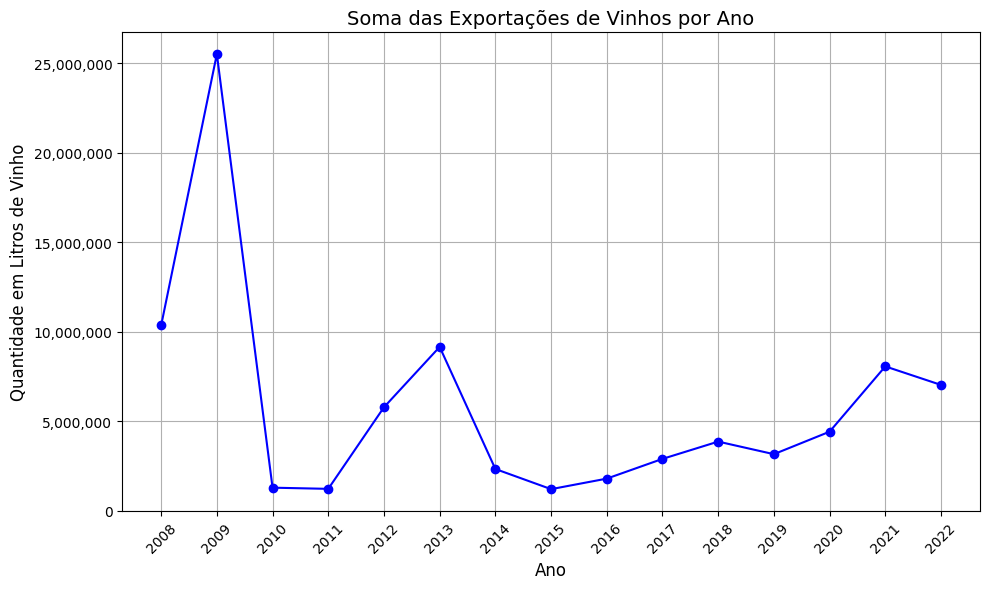

In [160]:
# Extrair os anos e a soma
anos = export_soma['Anos'].str.replace('Exportacao_', '')  # Remover o prefixo "Exportacao_"
soma = export_soma['Soma']

# Criar o gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(anos, soma, marker='o', color='blue', linestyle='-')

# Adicionar título e rótulos dos eixos
plt.title('Soma das Exportações de Vinhos por Ano', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Quantidade em Litros de Vinho', fontsize=12)

# Rotacionar os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)

# Remover a notação científica do eixo y
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Adicionar grade
plt.grid(True)

# Ajustar layout
plt.tight_layout()

# Exibir o gráfico
plt.show()


In [161]:
exporT_Russia = exporT[['Rússia']]
exporT_Russia

País               Rússia
Exportacao_2008   6207658
Exportacao_2009  21912914
Exportacao_2010         0
Exportacao_2011         0
Exportacao_2012   4528176
Exportacao_2013   5893291
Exportacao_2014    190656
Exportacao_2015     47664
Exportacao_2016         0
Exportacao_2017         0
Exportacao_2018         0
Exportacao_2019         0
Exportacao_2020      1463
Exportacao_2021    181931
Exportacao_2022     66046

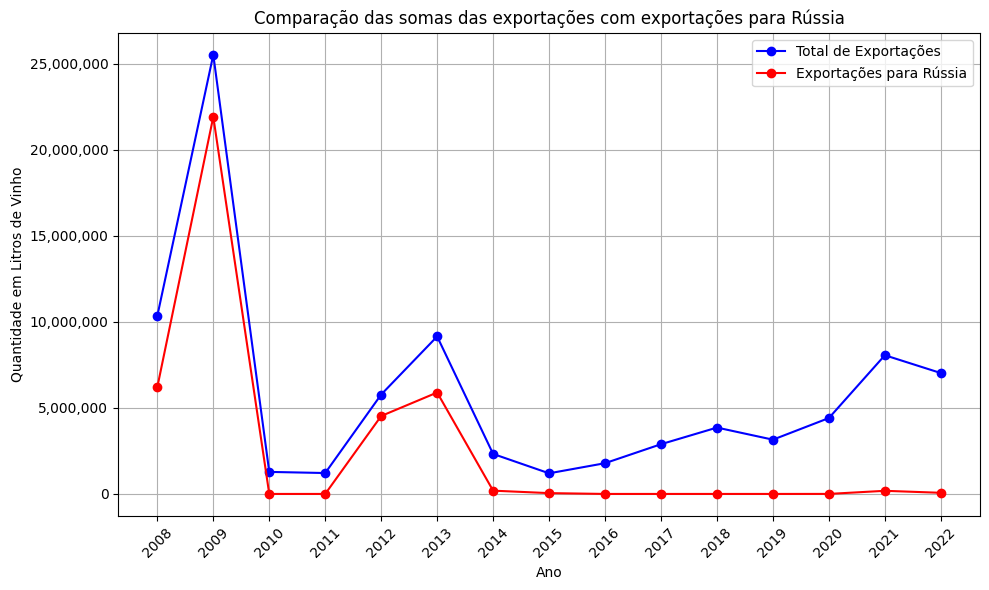

In [162]:
# Extrair os anos e a soma
anos = export_soma['Anos'].str.replace('Exportacao_', '')  # Remover o prefixo "Exportacao_"
soma = export_soma['Soma']
soma2 = exporT_Russia['Rússia']

# Criar o gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(anos, soma, marker='o', color='blue', linestyle='-', label='Total de Exportações')
plt.plot(anos, soma2, marker='o', color='red', linestyle='-', label='Exportações para Rússia')

# Adicionar título e rótulos dos eixos
plt.title('Comparação das somas das exportações com exportações para Rússia')
plt.xlabel('Ano')
plt.ylabel('Quantidade em Litros de Vinho')

# Rotacionar os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)

# Remover a notação científica do eixo y
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Adicionar legenda
plt.legend()

# Exibir o grid
plt.grid(True)

# Ajustar o layout
plt.tight_layout()

# Exibir o gráfico
plt.show()


In [163]:
exporT_sem_Russia = exporT.drop(columns='Rússia')
exporT_sem_Russia.head()

País            Afeganistão África do Sul Alemanha, República Democrática  \
Exportacao_2008           0             0                          265742   
Exportacao_2009           0             0                          225086   
Exportacao_2010           0             0                           27715   
Exportacao_2011           0             0                           36070   
Exportacao_2012           0             0                            8189   

País            Angola Antígua e Barbuda Antilhas Holandesas Argentina Aruba  \
Exportacao_2008  25721                 0               17938         0     0   
Exportacao_2009  54786                 0                8235       162     0   
Exportacao_2010  33557                 0                9810         0     0   
Exportacao_2011  13889                 0                7335     13253   900   
Exportacao_2012   2833                 0                9247         0     0   

País            Austrália Áustria  ... Taiwan (FORMOSA) Tcheca, República  \
Exportacao_2008    218726       0  ...            10030             17135   
Exportacao_2009      1014       0  ...                0              9269   
Exportacao_2010      1823       0  ...                0              1091   
Exportacao_2011      3632       0  ...             4500              6846   
Exportacao_2012      9345       0  ...                0              7960   

País             Togo Trinidade Tobago Turquia Tuvalu Uruguai Vanuatu  \
Exportacao_2008  5160                0       0      0       0       0   
Exportacao_2009     0                0       0      0       0       0   
Exportacao_2010     0                0       0      0     914       0   
Exportacao_2011     0                0       0      0    1238       0   
Exportacao_2012     0              531       0      0    1135       0   

País            Venezuela Vietnã  
Exportacao_2008         0      0  
Exportacao_2009         0    743  
Exportacao_2010         0   8820  
Exportacao_2011         0      0  
Exportacao_2012      1029      0  

[5 rows x 115 columns]

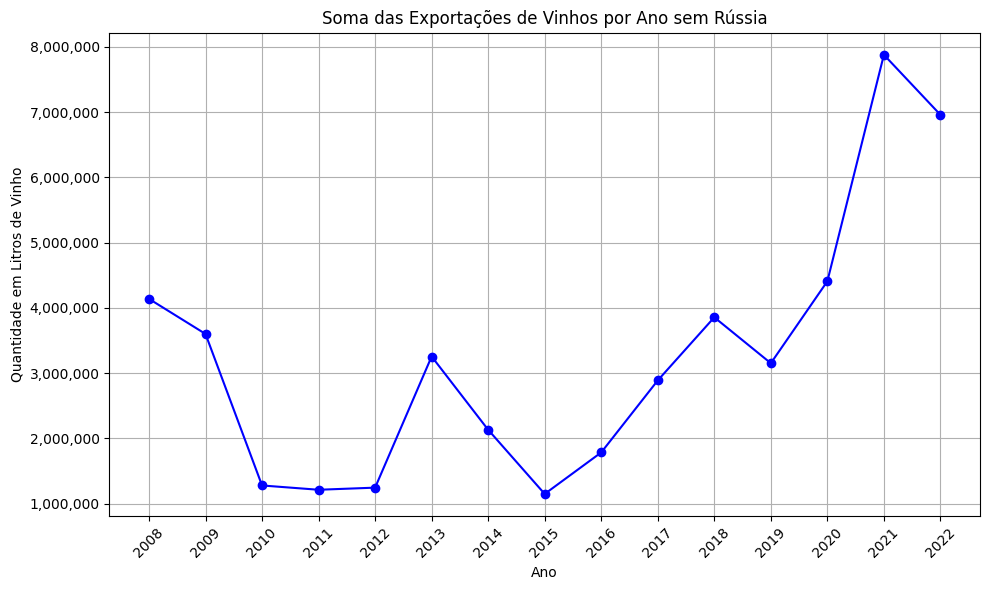

In [164]:
# Calcular a soma de cada linha
soma_por_linha = exporT_sem_Russia.sum(axis=1)

# Criar um novo DataFrame com os resultados da soma
export_soma_sem_Russia = pd.DataFrame(soma_por_linha, columns=['Soma'])

# Exibir as cinco primeiras linhas do novo DataFrame
export_soma_sem_Russia.reset_index(inplace=True)
export_soma_sem_Russia.rename(columns={'index': 'Anos'}, inplace=True)

# Extrair os anos e a soma
anos = export_soma_sem_Russia['Anos'].str.replace('Exportacao_', '')  # Remover o prefixo "Exportacao_"
soma = export_soma_sem_Russia['Soma']

# Criar o gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(anos, soma, marker='o', color='blue', linestyle='-', label='Exportações (sem Rússia)')

# Adicionar título e rótulos dos eixos
plt.title('Soma das Exportações de Vinhos por Ano sem Rússia')
plt.xlabel('Ano')
plt.ylabel('Quantidade em Litros de Vinho')

# Rotacionar os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)

# Remover a notação científica do eixo y
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Exibir o grid
plt.grid(True)

# Ajustar o layout
plt.tight_layout()

# Exibir o gráfico
plt.show()


In [165]:
export_soma_sem_Russia

Anos       Soma
0   Exportacao_2008  4138665.0
1   Exportacao_2009  3601284.0
2   Exportacao_2010  1280574.0
3   Exportacao_2011  1214834.0
4   Exportacao_2012  1247200.0
5   Exportacao_2013  3255768.0
6   Exportacao_2014  2133373.0
7   Exportacao_2015  1150815.0
8   Exportacao_2016  1786549.0
9   Exportacao_2017  2889572.0
10  Exportacao_2018  3856162.0
11  Exportacao_2019  3152873.0
12  Exportacao_2020  4408254.0
13  Exportacao_2021  7876742.0
14  Exportacao_2022  6957433.0

In [166]:
desvio_padrao = export_soma_sem_Russia['Soma'].std()
desvio_padrao

2030789.5580638745

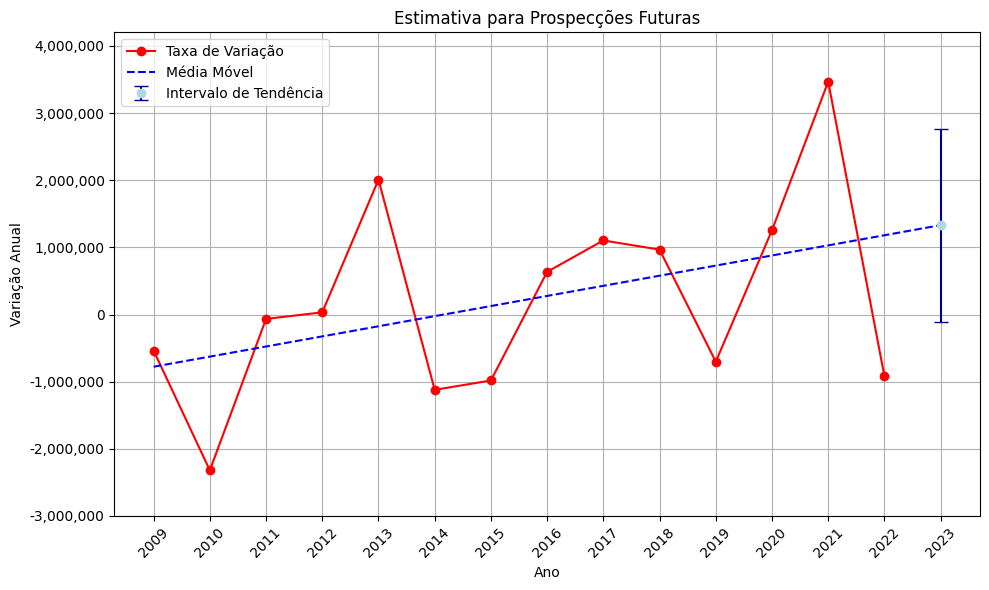

In [167]:
# Calcular a derivada
derivada = np.diff(soma)

# Calcular os anos sem o primeiro elemento
anos_sem_primeiro = anos[1:]

# Calcular os coeficientes da regressão linear
coeficientes = np.polyfit(range(len(derivada)), derivada, 1)

# Calcular a regressão linear até 2023
anos_extensao = np.arange(len(derivada) + 1)  # Adicionando um ponto para 2023
regressao_extensao = np.polyval(coeficientes, anos_extensao)

# Calcular o desvio padrão fornecido
desvio_padrao_fornecido = 1436093.2858845463

# Último ponto da regressão linear
ultimo_ponto_regressao = regressao_extensao[-1]

# Calcular intervalo de confiança do desvio padrão
intervalo_superior = ultimo_ponto_regressao + desvio_padrao_fornecido
intervalo_inferior = ultimo_ponto_regressao - desvio_padrao_fornecido

# Plotar o gráfico da derivada e da regressão linear
plt.figure(figsize=(10, 6))
plt.plot(anos_sem_primeiro, derivada, marker='o', color='red', linestyle='-', label='Taxa de Variação')
plt.plot(anos_extensao, regressao_extensao, color='blue', linestyle='--', label='Média Móvel')

# Plotar intervalo de confiança
plt.errorbar(anos_extensao[-1], ultimo_ponto_regressao, yerr=desvio_padrao_fornecido, fmt='o', color='lightblue', 
             ecolor='darkblue', capsize=5, label='Intervalo de Tendência')

# Adicionar título e rótulos dos eixos
plt.title('Estimativa para Prospecções Futuras')
plt.xlabel('Ano')
plt.ylabel('Variação Anual')
plt.xticks(np.append(anos_sem_primeiro, '2023'), rotation=45)  # Adicionando '2023' como uma string ao eixo x
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Definir limites do eixo y
plt.ylim(-3000000, ultimo_ponto_regressao + 2*desvio_padrao_fornecido)

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

In [168]:
coeficientes

array([ 150640.16263736, -777820.48571429])

In [169]:
exporT_espanha = exporT[['Espanha']]
exporT_espanha.reset_index(inplace=True)
exporT_espanha.rename(columns={'index': 'Anos'}, inplace=True)
exporT_espanha

C:\Users\Guilherme\AppData\Local\Temp\ipykernel_7228\3124968040.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exporT_espanha.rename(columns={'index': 'Anos'}, inplace=True)


País             Anos  Espanha
0     Exportacao_2008     2942
1     Exportacao_2009     2181
2     Exportacao_2010        0
3     Exportacao_2011     5206
4     Exportacao_2012        0
5     Exportacao_2013  1972980
6     Exportacao_2014        0
7     Exportacao_2015        0
8     Exportacao_2016        0
9     Exportacao_2017        0
10    Exportacao_2018     6123
11    Exportacao_2019     3540
12    Exportacao_2020       28
13    Exportacao_2021        0
14    Exportacao_2022        0

In [170]:
exporT_sem_Russia_Espanha = exporT.drop(columns=['Rússia','Espanha'])

# Calcular a soma de cada linha
soma_por_linha = exporT_sem_Russia_Espanha.sum(axis=1)

# Criar um novo DataFrame com os resultados da soma
exporT_sem_Russia_Espanha = pd.DataFrame(soma_por_linha, columns=['Soma'])

# Exibir as cinco primeiras linhas do novo DataFrame
exporT_sem_Russia_Espanha.reset_index(inplace=True)
exporT_sem_Russia_Espanha.rename(columns={'index': 'Anos'}, inplace=True)
exporT_sem_Russia_Espanha

Anos       Soma
0   Exportacao_2008  4135723.0
1   Exportacao_2009  3599103.0
2   Exportacao_2010  1280574.0
3   Exportacao_2011  1209628.0
4   Exportacao_2012  1247200.0
5   Exportacao_2013  1282788.0
6   Exportacao_2014  2133373.0
7   Exportacao_2015  1150815.0
8   Exportacao_2016  1786549.0
9   Exportacao_2017  2889572.0
10  Exportacao_2018  3850039.0
11  Exportacao_2019  3149333.0
12  Exportacao_2020  4408226.0
13  Exportacao_2021  7876742.0
14  Exportacao_2022  6957433.0

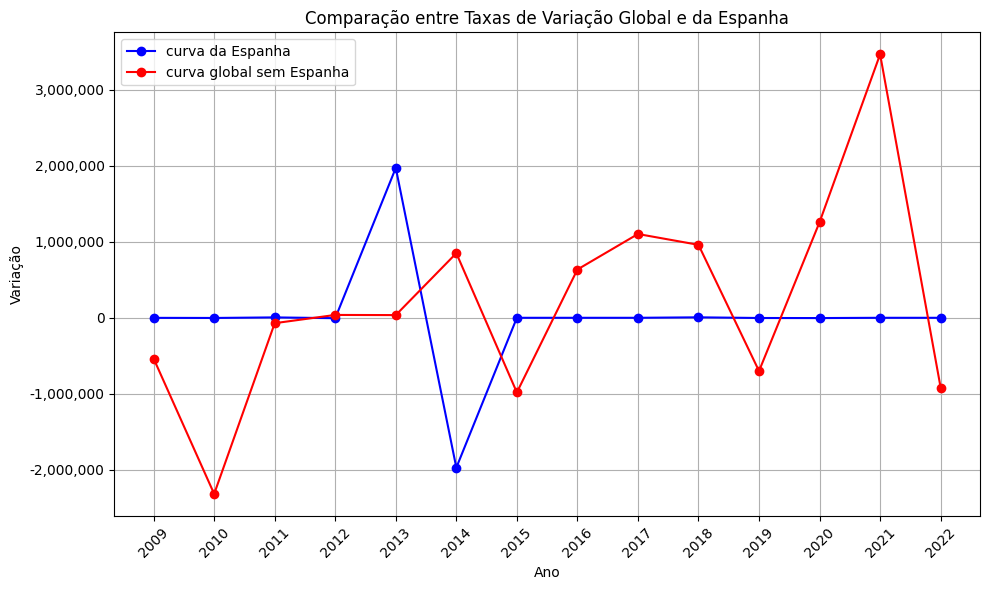

In [171]:
# Extrair os anos e a soma
anos = exporT_espanha['Anos'].str.replace('Exportacao_', '')  # Remover o prefixo "Exportacao_"
soma = exporT_espanha['Espanha']
soma2 = exporT_sem_Russia_Espanha['Soma']
derivada = np.diff(soma)
derivada2 = np.diff(soma2)
anos_sem_primeiro = anos[1:]

# Criar o gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(anos_sem_primeiro, derivada, marker='o', color='blue', linestyle='-', label='curva da Espanha')
plt.plot(anos_sem_primeiro, derivada2,marker='o', color='red', linestyle='-', label='curva global sem Espanha')

# Adicionar título e rótulos dos eixos
plt.title('Comparação entre Taxas de Variação Global e da Espanha')
plt.xlabel('Ano')
plt.ylabel('Variação')

# Rotacionar os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)

# Remover a notação científica do eixo y
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Exibir o gráfico
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [172]:
derivada

array([-761, -2181, 5206, -5206, 1972980, -1972980, 0, 0, 0, 6123, -2583,
       -3512, -28, 0], dtype=object)

In [173]:
derivada2

array([ -536620., -2318529.,   -70946.,    37572.,    35588.,   850585.,
        -982558.,   635734.,  1103023.,   960467.,  -700706.,  1258893.,
        3468516.,  -919309.])

In [174]:
((1972980 - -5206)/5206)*100

37998.19439108721

In [175]:
(abs(35588 - 37572)/35588)*100

5.574912891986063

In [176]:
exporT_sem_Russia_Franca = exporT.drop(columns=['Rússia','França'])

# Calcular a soma de cada linha
soma_por_linha = exporT_sem_Russia_Franca.sum(axis=1)

# Criar um novo DataFrame com os resultados da soma
exporT_sem_Russia_Franca = pd.DataFrame(soma_por_linha, columns=['Soma'])

# Exibir as cinco primeiras linhas do novo DataFrame
exporT_sem_Russia_Franca.reset_index(inplace=True)
exporT_sem_Russia_Franca.rename(columns={'index': 'Anos'}, inplace=True)
exporT_sem_Russia_Franca

Anos       Soma
0   Exportacao_2008  4127587.0
1   Exportacao_2009  3601284.0
2   Exportacao_2010  1276960.0
3   Exportacao_2011  1214834.0
4   Exportacao_2012  1051596.0
5   Exportacao_2013  3248883.0
6   Exportacao_2014  2099618.0
7   Exportacao_2015  1149219.0
8   Exportacao_2016  1780512.0
9   Exportacao_2017  2885319.0
10  Exportacao_2018  3845085.0
11  Exportacao_2019  3134587.0
12  Exportacao_2020  4395632.0
13  Exportacao_2021  7869690.0
14  Exportacao_2022  6951739.0

In [177]:
exporT_franca = exporT[['França']]
exporT_franca.reset_index(inplace=True)
exporT_franca.rename(columns={'index': 'Anos'}, inplace=True)
exporT_franca

C:\Users\Guilherme\AppData\Local\Temp\ipykernel_7228\187019802.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exporT_franca.rename(columns={'index': 'Anos'}, inplace=True)


País             Anos  França
0     Exportacao_2008   11078
1     Exportacao_2009       0
2     Exportacao_2010    3614
3     Exportacao_2011       0
4     Exportacao_2012  195604
5     Exportacao_2013    6885
6     Exportacao_2014   33755
7     Exportacao_2015    1596
8     Exportacao_2016    6037
9     Exportacao_2017    4253
10    Exportacao_2018   11077
11    Exportacao_2019   18286
12    Exportacao_2020   12622
13    Exportacao_2021    7052
14    Exportacao_2022    5694

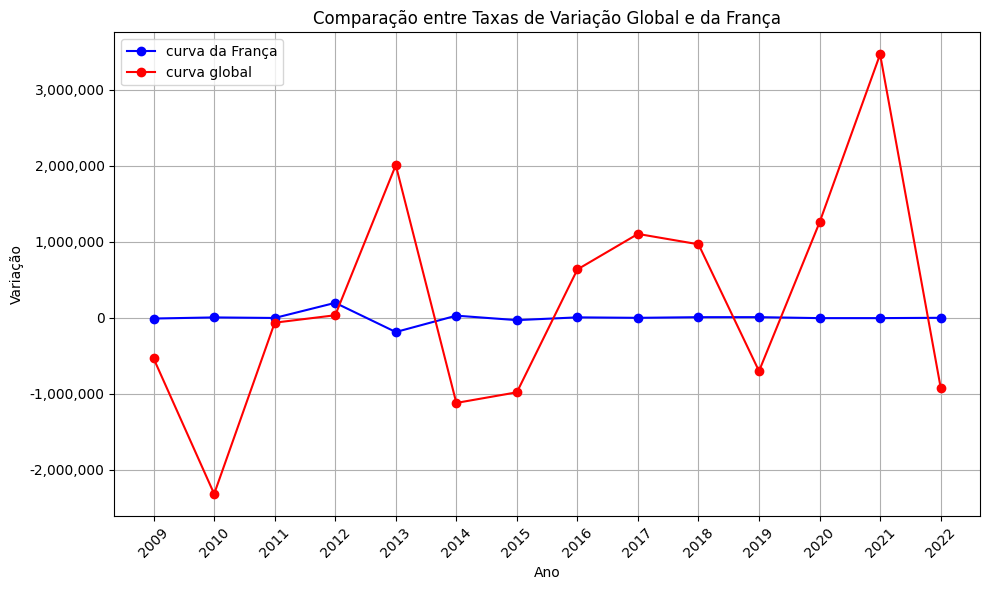

In [178]:
# Extrair os anos e a soma
anos = exporT_franca['Anos'].str.replace('Exportacao_', '')  # Remover o prefixo "Exportacao_"
soma = exporT_franca['França']
soma2 = export_soma_sem_Russia['Soma']
derivada = np.diff(soma)
derivada2 = np.diff(soma2)
anos_sem_primeiro = anos[1:]

# Criar o gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(anos_sem_primeiro, derivada, marker='o', color='blue', linestyle='-', label='curva da França')
plt.plot(anos_sem_primeiro, derivada2,marker='o', color='red', linestyle='-', label='curva global')

# Adicionar título e rótulos dos eixos
plt.title('Comparação entre Taxas de Variação Global e da França')
plt.xlabel('Ano')
plt.ylabel('Variação')

# Rotacionar os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)

# Remover a notação científica do eixo y
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Exibir o gráfico
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [179]:
derivada

array([-11078, 3614, -3614, 195604, -188719, 26870, -32159, 4441, -1784,
       6824, 7209, -5664, -5570, -1358], dtype=object)

In [180]:
derivada2

array([ -537381., -2320710.,   -65740.,    32366.,  2008568., -1122395.,
        -982558.,   635734.,  1103023.,   966590.,  -703289.,  1255381.,
        3468488.,  -919309.])

In [181]:
((195604 - -3614)/3614)*100

5512.396236856669

In [182]:
((32366 - -65740)/65740)*100

149.23334347429267

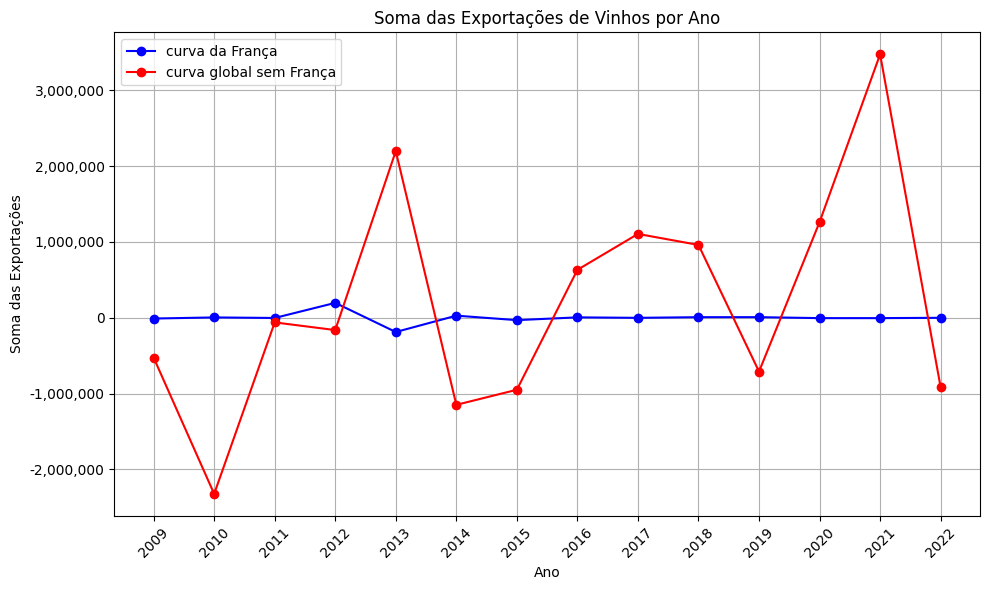

In [183]:
# Extrair os anos e a soma
anos = exporT_franca['Anos'].str.replace('Exportacao_', '')  # Remover o prefixo "Exportacao_"
soma = exporT_franca['França']
soma2 = exporT_sem_Russia_Franca['Soma']
derivada = np.diff(soma)
derivada2 = np.diff(soma2)
anos_sem_primeiro = anos[1:]

# Criar o gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(anos_sem_primeiro, derivada, marker='o', color='blue', linestyle='-', label='curva da França')
plt.plot(anos_sem_primeiro, derivada2,marker='o', color='red', linestyle='-', label='curva global sem França')

# Adicionar título e rótulos dos eixos
plt.title('Soma das Exportações de Vinhos por Ano')
plt.xlabel('Ano')
plt.ylabel('Soma das Exportações')

# Rotacionar os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)

# Remover a notação científica do eixo y
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Exibir o gráfico
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

crescimento: (2016) Curaçao, (2017) Haiti, Gana, Libéria, Marshall, (2018) Ilha de Man, (2019) Paraguai, Venezuela, (2020) Uruguai, Togo

domesticada: 'Reino Unido', 'países baixos', 'Alemanha, República Democrática', 'Portugal', 'Bélgica'

In [184]:
exporT.head()

País            Afeganistão África do Sul Alemanha, República Democrática  \
Exportacao_2008           0             0                          265742   
Exportacao_2009           0             0                          225086   
Exportacao_2010           0             0                           27715   
Exportacao_2011           0             0                           36070   
Exportacao_2012           0             0                            8189   

País            Angola Antígua e Barbuda Antilhas Holandesas Argentina Aruba  \
Exportacao_2008  25721                 0               17938         0     0   
Exportacao_2009  54786                 0                8235       162     0   
Exportacao_2010  33557                 0                9810         0     0   
Exportacao_2011  13889                 0                7335     13253   900   
Exportacao_2012   2833                 0                9247         0     0   

País            Austrália Áustria  ... Taiwan (FORMOSA) Tcheca, República  \
Exportacao_2008    218726       0  ...            10030             17135   
Exportacao_2009      1014       0  ...                0              9269   
Exportacao_2010      1823       0  ...                0              1091   
Exportacao_2011      3632       0  ...             4500              6846   
Exportacao_2012      9345       0  ...                0              7960   

País             Togo Trinidade Tobago Turquia Tuvalu Uruguai Vanuatu  \
Exportacao_2008  5160                0       0      0       0       0   
Exportacao_2009     0                0       0      0       0       0   
Exportacao_2010     0                0       0      0     914       0   
Exportacao_2011     0                0       0      0    1238       0   
Exportacao_2012     0              531       0      0    1135       0   

País            Venezuela Vietnã  
Exportacao_2008         0      0  
Exportacao_2009         0    743  
Exportacao_2010         0   8820  
Exportacao_2011         0      0  
Exportacao_2012      1029      0  

[5 rows x 116 columns]

In [185]:
# Lista dos países desejados
paises_desejados = ['Reino Unido', 'Países Baixos', 'Alemanha, República Democrática', 'Portugal', 'Bélgica']

# Criar o novo DataFrame contendo apenas os países desejados
exporT_grupo1 = exporT.loc[:, paises_desejados]

exporT_grupo1

País            Reino Unido Países Baixos Alemanha, República Democrática  \
Exportacao_2008      100097        340412                          265742   
Exportacao_2009       30092        171654                          225086   
Exportacao_2010      123624         87368                           27715   
Exportacao_2011      122629        125414                           36070   
Exportacao_2012       82937        134879                            8189   
Exportacao_2013       59161         57792                           61699   
Exportacao_2014      305807        165289                          213348   
Exportacao_2015       68382         44987                           10680   
Exportacao_2016      117044         42953                           14012   
Exportacao_2017       60711             0                           15467   
Exportacao_2018       67708          9451                           10794   
Exportacao_2019       34295         44882                            3660   
Exportacao_2020       22913           248                            6261   
Exportacao_2021       25316          3791                            2698   
Exportacao_2022       18835          7034                            7630   

País            Portugal Bélgica  
Exportacao_2008    49090    3523  
Exportacao_2009   141000  125962  
Exportacao_2010     4577   42532  
Exportacao_2011       95   11802  
Exportacao_2012    47172   16132  
Exportacao_2013    23810   22461  
Exportacao_2014    71544  151320  
Exportacao_2015    47736    4473  
Exportacao_2016        0    7200  
Exportacao_2017        0    2790  
Exportacao_2018        0    7497  
Exportacao_2019    18328    2498  
Exportacao_2020     7958    3166  
Exportacao_2021     6358     483  
Exportacao_2022     1918     828

In [186]:
exporT_grupo1['Média'] = exporT_grupo1.mean(axis=1)
exporT_grupo1 = exporT_grupo1[['Média']]
exporT_grupo1


País                Média
Exportacao_2008  151772.8
Exportacao_2009  138758.8
Exportacao_2010   57163.2
Exportacao_2011   59202.0
Exportacao_2012   57861.8
Exportacao_2013   44984.6
Exportacao_2014  181461.6
Exportacao_2015   35251.6
Exportacao_2016   36241.8
Exportacao_2017   15793.6
Exportacao_2018   19090.0
Exportacao_2019   20732.6
Exportacao_2020    8109.2
Exportacao_2021    7729.2
Exportacao_2022    7249.0

In [187]:
# Acrescentar um índice numérico à esquerda
exporT_grupo1.reset_index(drop=False, inplace=True)
exporT_grupo1

# Renomear a coluna do índice
exporT_grupo1.rename(columns={'index': 'Anos','País':'Índice'}, inplace=True)
exporT_grupo1


C:\Users\Guilherme\AppData\Local\Temp\ipykernel_7228\700784114.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exporT_grupo1.rename(columns={'index': 'Anos','País':'Índice'}, inplace=True)


País             Anos     Média
0     Exportacao_2008  151772.8
1     Exportacao_2009  138758.8
2     Exportacao_2010   57163.2
3     Exportacao_2011   59202.0
4     Exportacao_2012   57861.8
5     Exportacao_2013   44984.6
6     Exportacao_2014  181461.6
7     Exportacao_2015   35251.6
8     Exportacao_2016   36241.8
9     Exportacao_2017   15793.6
10    Exportacao_2018   19090.0
11    Exportacao_2019   20732.6
12    Exportacao_2020    8109.2
13    Exportacao_2021    7729.2
14    Exportacao_2022    7249.0

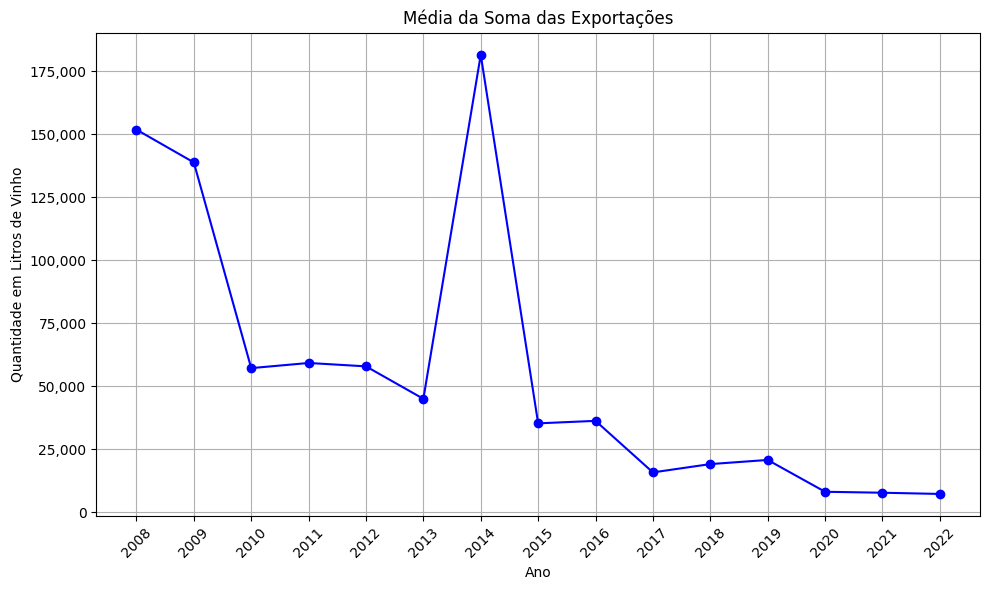

In [188]:
# Extrair os anos e a soma
anos = exporT_grupo1['Anos'].str.replace('Exportacao_', '')  # Remover o prefixo "Exportacao_"
soma = exporT_grupo1['Média']

# Criar o gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(anos, soma, marker='o', color='blue', linestyle='-')

# Adicionar título e rótulos dos eixos
plt.title('Média da Soma das Exportações')
plt.xlabel('Ano')
plt.ylabel('Quantidade em Litros de Vinho')

# Rotacionar os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)

# Remover a notação científica do eixo y
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Exibir o gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

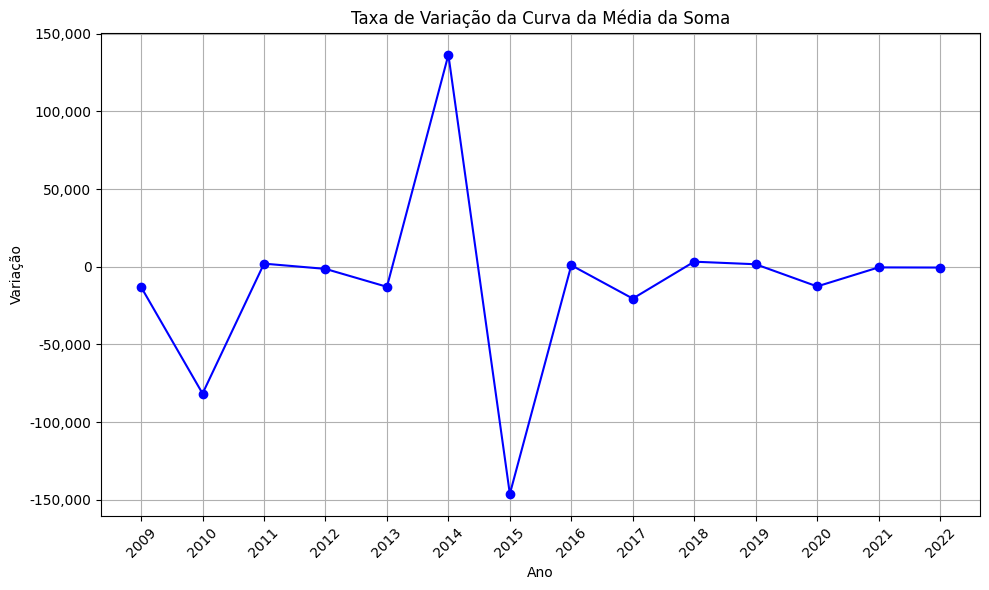

In [189]:
# Extrair os anos e a soma
anos = exporT_grupo1['Anos'].str.replace('Exportacao_', '')  # Remover o prefixo "Exportacao_"
soma = exporT_grupo1['Média']
derivada = np.diff(soma)
anos_sem_primeiro = anos[1:]

# Criar o gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(anos_sem_primeiro, derivada, marker='o', color='blue', linestyle='-')

# Adicionar título e rótulos dos eixos
plt.title('Taxa de Variação da Curva da Média da Soma')
plt.xlabel('Ano')
plt.ylabel('Variação')

# Rotacionar os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)

# Remover a notação científica do eixo y
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Exibir o gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

In [190]:
exporT_eua = exporT[['Estados Unidos']]
exporT_eua.reset_index(inplace=True)
exporT_eua.rename(columns={'index': 'Anos'}, inplace=True)
exporT_eua

C:\Users\Guilherme\AppData\Local\Temp\ipykernel_7228\3118839483.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exporT_eua.rename(columns={'index': 'Anos'}, inplace=True)


País             Anos Estados Unidos
0     Exportacao_2008         443895
1     Exportacao_2009         372319
2     Exportacao_2010         228968
3     Exportacao_2011         306787
4     Exportacao_2012         146585
5     Exportacao_2013         245368
6     Exportacao_2014         222267
7     Exportacao_2015         195896
8     Exportacao_2016         258072
9     Exportacao_2017         132688
10    Exportacao_2018         169109
11    Exportacao_2019         209765
12    Exportacao_2020         300178
13    Exportacao_2021         111085
14    Exportacao_2022         220373

crescimento: (2016) Curaçao, (2017) Haiti, Gana, Libéria, Marshall, (2018) Ilha de Man, (2019) Paraguai, Venezuela, (2020) Uruguai, Togo

In [191]:
# Lista dos países desejados
paises_desejados = ['Curaçao', 'Haiti', 'Gana', 'Libéria', 'Marshall, Ilhas','Ilha de Man',
                    'Paraguai', 'Venezuela', 'Uruguai', 'Togo']

# Criar o novo DataFrame contendo apenas os países desejados
exporT_crescimento = exporT.loc[:, paises_desejados]

exporT_crescimento

País            Curaçao   Haiti   Gana Libéria Marshall, Ilhas Ilha de Man  \
Exportacao_2008       0      20  18168       0               0           0   
Exportacao_2009       0    4500      0       0               0           0   
Exportacao_2010       0    2700      0       0               0           0   
Exportacao_2011       0       0      0       0               0           0   
Exportacao_2012       0       0      0       0               0           0   
Exportacao_2013       0       0      0       0               0           0   
Exportacao_2014       0       0      0       0               0           0   
Exportacao_2015       0       0      0       0               0           0   
Exportacao_2016       0       0      0       0               0           0   
Exportacao_2017   12340       0      0       0               0           0   
Exportacao_2018   23930   79500   9000     658             923           0   
Exportacao_2019   33951   81873   7673    4441            7276          28   
Exportacao_2020   47962  399128  18810    5155            6270          11   
Exportacao_2021   32263  670379  12578    7554            8644          97   
Exportacao_2022   40673  553503  35949    9145            7240         165   

País            Paraguai Venezuela Uruguai   Togo  
Exportacao_2008  2191901         0       0   5160  
Exportacao_2009   486927         0       0      0  
Exportacao_2010   510989         0     914      0  
Exportacao_2011   240168         0    1238      0  
Exportacao_2012   354824      1029    1135      0  
Exportacao_2013   481564         0    1526      0  
Exportacao_2014   521847        14       0      0  
Exportacao_2015   495428         0       0      0  
Exportacao_2016   985739         0       0      0  
Exportacao_2017  2393468       680       0      0  
Exportacao_2018  3234168        71    7711      0  
Exportacao_2019  2419537         0    6180      0  
Exportacao_2020  3299013      4086       0      0  
Exportacao_2021  6522527     26415  136774   1890  
Exportacao_2022  5076670     23220  637117  17317

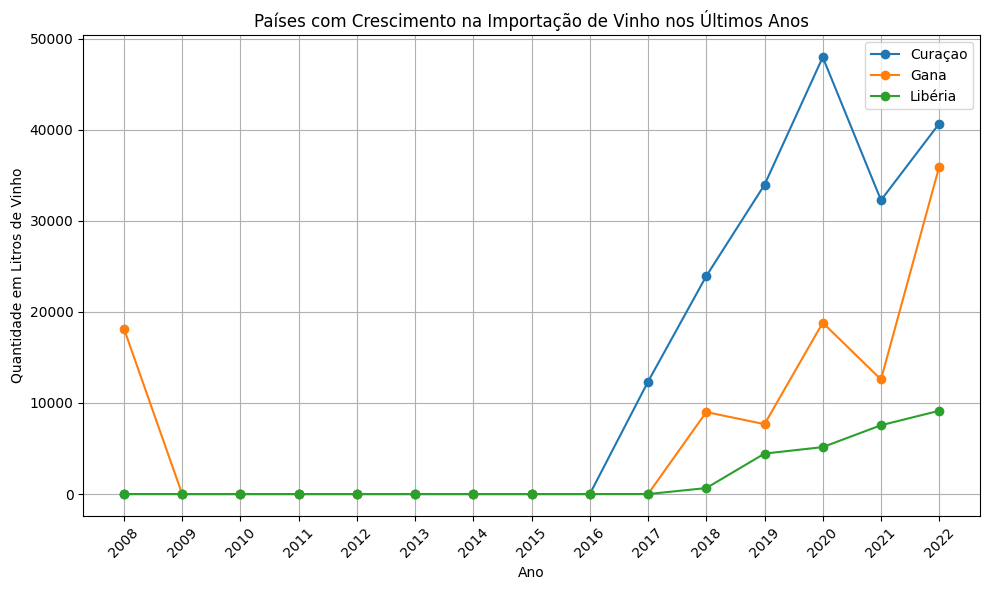

In [192]:
# Selecionar apenas as colunas desejadas
paises = ['Curaçao', 'Gana', 'Libéria']
dados_paises = exporT_crescimento[paises]

# Criar o gráfico de linhas
plt.figure(figsize=(10, 6))

for pais in paises:
    plt.plot(anos, dados_paises[pais], marker='o', linestyle='-', label=pais)

# Adicionar título e rótulos dos eixos
plt.title('Países com Crescimento na Importação de Vinho nos Últimos Anos')
plt.xlabel('Ano')
plt.ylabel('Quantidade em Litros de Vinho')

# Rotacionar os rótulos do eixo x
plt.xticks(rotation=45)

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

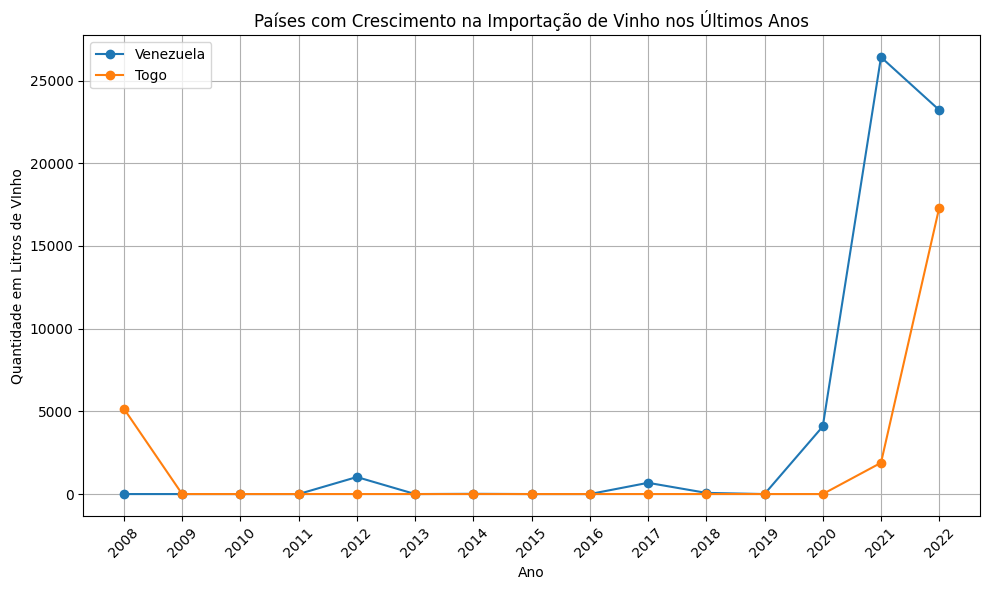

In [193]:
# Selecionar apenas as colunas desejadas
paises = ['Venezuela', 'Togo']
dados_paises = exporT_crescimento[paises]

# Criar o gráfico de linhas
plt.figure(figsize=(10, 6))

for pais in paises:
    plt.plot(anos, dados_paises[pais], marker='o', linestyle='-', label=pais)

# Adicionar título e rótulos dos eixos
plt.title('Países com Crescimento na Importação de Vinho nos Últimos Anos')
plt.xlabel('Ano')
plt.ylabel('Quantidade em Litros de VInho')

# Rotacionar os rótulos do eixo x
plt.xticks(rotation=45)

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

In [194]:
# Selecionar apenas as colunas desejadas
paises = ['Haiti', 'Paraguai', 'Uruguai']
dados_paises = exporT_crescimento[paises]

# Criar o gráfico de linhas
plt.figure(figsize=(10, 6))

for pais in paises:
    plt.plot(anos, dados_paises[pais], marker='o', linestyle='-', label=pais)

# Adicionar título e rótulos dos eixos
plt.title('Países com Crescimento na Importação de Vinho nos Últimos Anos')
plt.xlabel('Ano')
plt.ylabel('Quantidade em Litros de Vinho')

# Rotacionar os rótulos do eixo x
plt.xticks(rotation=45)

# Adicionar legenda
plt.legend()
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
# Exibir o gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

In [195]:
exportacao_vinhos_resumido

Pais_destino  Quantidade    Valor        Continente
0                        Afeganistão          11       46              Ásia
1                      África do Sul          30      116            África
2    Alemanha, República Democrática      909051  2546394            Europa
3                             Angola      168868   576189            África
5                  Antígua e Barbuda        2104     7738  América do Norte
..                               ...         ...      ...               ...
123                           Tuvalu           2        4           Oceania
124                          Uruguai      792595  1219878    América do Sul
125                          Vanuatu          18       31           Oceania
126                        Venezuela       55515    88828    América do Sul
127                           Vietnã        9799    13013              Ásia

[116 rows x 4 columns]

In [196]:
df_apresentacao = exportacao_vinhos_resumido.rename(columns={'Pais_destino': 'País de Destino', 'Quantidade': 'Quantidade em litros de vinho exportado (1Kg=1L)', 'Valor': 'Valor em US$'})
df_apresentacao.head(10)

País de Destino  \
0                       Afeganistão   
1                     África do Sul   
2   Alemanha, República Democrática   
3                            Angola   
5                 Antígua e Barbuda   
6               Antilhas Holandesas   
7                         Argentina   
8                             Aruba   
9                         Austrália   
10                          Áustria   

    Quantidade em litros de vinho exportado (1Kg=1L)  Valor em US$  \
0                                                 11            46   
1                                                 30           116   
2                                             909051       2546394   
3                                             168868        576189   
5                                               2104          7738   
6                                              97002        142915   
7                                              51012        221684   
8                                               1350          2435   
9                                             274654        469248   
10                                               681          5432   

          Continente  
0               Ásia  
1             África  
2             Europa  
3             África  
5   América do Norte  
6   América do Norte  
7     América do Sul  
8   América do Norte  
9            Oceania  
10            Europa

In [197]:
exportacao_vinhos_resumido

Pais_destino  Quantidade    Valor        Continente
0                        Afeganistão          11       46              Ásia
1                      África do Sul          30      116            África
2    Alemanha, República Democrática      909051  2546394            Europa
3                             Angola      168868   576189            África
5                  Antígua e Barbuda        2104     7738  América do Norte
..                               ...         ...      ...               ...
123                           Tuvalu           2        4           Oceania
124                          Uruguai      792595  1219878    América do Sul
125                          Vanuatu          18       31           Oceania
126                        Venezuela       55515    88828    América do Sul
127                           Vietnã        9799    13013              Ásia

[116 rows x 4 columns]